# Introduction

This notebook backtests xxx stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import ticker_stats, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [30]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_2000.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.to_list()

In [4]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester()

Simulating 2026 stocks
Failed to smooth prices for AVA!
Failed to smooth prices for HSY!
Failed to smooth prices for NTR!
Failed to smooth prices for OR!
Failed to smooth prices for PIPR!
Failed to smooth prices for PROV!
Failed to smooth prices for RHI!
Failed to smooth prices for STRA!
Unable to determine minima and maxima for the following tickers:
['AVA', 'HSY', 'NTR', 'OR', 'PIPR', 'PROV', 'RHI', 'STRA']
Simulating now with 2018 stocks
tickers= ['PIH', 'FCCY', 'SRCE', 'MMM', 'ATEN', 'AIR', 'ABBV', 'ABMD', 'ABM', 'AXAS', 'ACIA', 'ACAD', 'ACCO', 'ARAY', 'ACRS', 'ACU', 'ACNB', 'ACOR', 'ATNM', 'AYI', 'GOLF', 'ADMS', 'ADUS', 'AGRO', 'IOTS', 'ADBE', 'ATGE', 'ADTN', 'ADRO', 'AAP', 'ADSW', 'WMS', 'AEIS', 'AMD', 'ASIX', 'ADVM', 'ACM', 'AEGN', 'AGLE', 'AERI', 'ACY', 'AJRD', 'AVAV', 'ARPO', 'AES', 'AEZS', 'AMG', 'AGCO', 'A', 'AGRX', 'AGYS', 'AGIO', 'AEM', 'AGFS', 'ALRN', 'AYR', 'AIRG', 'AIRT', 'ATSG', 'AKAM', 'AKBA', 'AKRX', 'AKS', 'ALK', 'ALSK', 'AA', 'ALX', 'AXU', 'ALXN', 'AQN', 'ALCO', 'A

Failed to get possible trades for CRRT
Failed to get possible trades for DESTQ
Failed to get possible trades for HOSS
Failed to get possible trades for NVTRQ
Possible trades to simulate: 21671
before day_close: 2016-09-09 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-09 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-12 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-12 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-13 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-13 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-14 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-14 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-15 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-15 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-16 00:00:00 0 10000 0 10000 0 True
after day_close: 2016-09-16 00:00:00 0 10000 0 10000 0 True
before day_close: 2016-09-19 00:00:00 0 10000 0 10000 0 True
after day_close: 201

before day_close: 2017-01-19 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-19 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-20 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-20 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-23 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-23 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-24 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-24 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-25 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-25 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-26 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-26 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-27 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-27 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-30 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-01-30 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-01-31 00:

after buy: invested in ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in CBPO on 2017-03-20 00:00:00 with target sell date of 2017-04-13 00:00:00
maxed out: CBPO is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in ROLL on 2017-03-20 00:00:00 with target sell date of 2017-05-02 00:00:00
maxed out: ROLL is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CHNR', 'MOH'] (5
capital=10000.0 in_use=10000.0 free=0.0
*** buying 2000.0 in USM on 2017-03-20 00:00:00 with target sell date of 2017-05-31 00:00:00
maxed out: USM is not expected to perform better than

after buy: invested in ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5
capital=10000.0 in_use=10000.0 free=2.2737367544323206e-13
*** buying 2000.0 in TBBK on 2017-03-20 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: TBBK is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5
capital=10000.0 in_use=10000.0 free=2.2737367544323206e-13
*** buying 2000.0 in KINS on 2017-03-20 00:00:00 with target sell date of 2017-03-22 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'MLAB', 'CASH'] (5
capital=10000.0 in_use=10000.0 free=2.2737367544323206e-13
*** buying 2000.0 in AUY on 2017-03-20 00:00:00 with target sell date of 2017-04-04 

after buy: invested in ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5
capital=10000.0 in_use=10000.0 free=2.2737367544323206e-13
*** buying 2000.0 in IESC on 2017-03-20 00:00:00 with target sell date of 2017-04-20 00:00:00
maxed out: IESC is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5
capital=10000.0 in_use=10000.0 free=2.2737367544323206e-13
*** buying 2000.0 in TMP on 2017-03-20 00:00:00 with target sell date of 2017-05-12 00:00:00
maxed out: TMP is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'OFLX', 'CASH', 'PTSI'] (5
capital=10000.0 in_use=10000.0 free=2.2737367544323206e-13
*** buying 2000.0 in NUE on 2017-03-20 00:00:00 with target sell date of 2017-03-21 00

after buy: invested in ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5
capital=9792.021249306506 in_use=9748.82962965361 free=43.19161965289709
*** buying 1958.4042498613012 in ANIP on 2017-03-22 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: ANIP is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5
capital=9792.021249306506 in_use=9748.82962965361 free=43.19161965289709
*** buying 1958.4042498613012 in CORE on 2017-03-22 00:00:00 with target sell date of 2017-04-18 00:00:00
maxed out: CORE is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TGI', 'NBIX', 'ELOX', 'BHC'] (5
capital=9792.021249306506 in_use=9748.82962965361 free=43.19161965289709
*** buying 1958.4042498

after buy: invested in ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5
capital=9918.56392489174 in_use=9918.563924891741 free=0.0
*** buying 1983.7127849783478 in WTT on 2017-03-23 00:00:00 with target sell date of 2017-06-07 00:00:00
maxed out: WTT is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5
capital=9918.56392489174 in_use=9918.563924891741 free=0.0
*** buying 1983.7127849783478 in NM on 2017-03-23 00:00:00 with target sell date of 2017-04-04 00:00:00
maxed out: NM is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'GEOS', 'DXCM'] (5
capital=9918.56392489174 in_use=9918.563924891741 free=0.0
*** buying 1983.7127849783478 in HROW on 2017-03-23 00:00:00 with 

after buy: invested in ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5
capital=9985.450580260378 in_use=9985.45058026038 free=0.0
*** buying 1997.0901160520757 in GNRC on 2017-03-23 00:00:00 with target sell date of 2017-07-14 00:00:00
maxed out: GNRC is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5
capital=9985.450580260378 in_use=9985.45058026038 free=0.0
*** buying 1997.0901160520757 in ARWR on 2017-03-23 00:00:00 with target sell date of 2017-05-05 00:00:00
maxed out: ARWR is not expected to perform better than stocks already invested in
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TGI', 'ELOX', 'BHC', 'TCCO', 'CTRC'] (5
capital=9985.450580260378 in_use=9985.45058026038 free=0.0
*** buying 1997.0901160520757 in DIN on 2017-03-23 00:00:00 

after buy: invested in ['ELOX', 'BHC', 'TCCO', 'CTRC', 'SGMO'] (5
capital=10264.216604161466 in_use=10264.216604161467 free=0.0
*** buying 2052.843320832293 in ZN on 2017-03-28 00:00:00 with target sell date of 2017-05-02 00:00:00
*** selling SGMO on 2017-03-28 00:00:00 to free up money for ZN
profit of selling SGMO on 2017-03-28 00:00:00:  0.0 0.0%
enough money (1937.5500400320257) to buy ZN (capital=10264.216604161466
invested in: ['ELOX', 'BHC', 'TCCO', 'CTRC'] (4
you do not have 1937.5500400320257 and setting amount to 1937.5500400320257
after buy: invested in ['ELOX', 'BHC', 'TCCO', 'CTRC', 'ZN'] (5
capital=10264.216604161466 in_use=10264.216604161467 free=0.0
*** buying 2052.843320832293 in ATHX on 2017-03-28 00:00:00 with target sell date of 2017-04-19 00:00:00
maxed out: ATHX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TCCO', 'CTRC', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TCCO

after buy: invested in ['BHC', 'TCCO', 'ZN', 'CBZ'] (4
capital=9640.157974091677 in_use=8086.975336806924 free=1553.1826372847552
*** buying 1928.0315948183354 in CRL on 2017-04-03 00:00:00 with target sell date of 2017-07-11 00:00:00
enough money (1553.1826372847552) to buy CRL (capital=9640.157974091677
invested in: ['BHC', 'TCCO', 'ZN', 'CBZ'] (4
you do not have 1553.1826372847552 and setting amount to 1553.1826372847552
after buy: invested in ['BHC', 'TCCO', 'ZN', 'CBZ', 'CRL'] (5
capital=9640.157974091677 in_use=9640.157974091679 free=0.0
*** buying 1928.0315948183354 in EBS on 2017-04-03 00:00:00 with target sell date of 2017-05-10 00:00:00
*** selling CBZ on 2017-04-03 00:00:00 to free up money for EBS
profit of selling CBZ on 2017-04-03 00:00:00:  2.2737367544323206e-13 0.0%
enough money (1928.0315948183356) to buy EBS (capital=9640.157974091677
invested in: ['BHC', 'TCCO', 'ZN', 'CRL'] (4
after buy: invested in ['BHC', 'TCCO', 'ZN', 'CRL', 'EBS'] (5
capital=9640.157974091677 i

after buy: invested in ['BHC', 'ZN', 'SCL', 'GEOS', 'BASI'] (5
capital=9405.49522652198 in_use=9261.55413716098 free=143.9410893610011
*** buying 1881.099045304396 in DPZ on 2017-04-04 00:00:00 with target sell date of 2017-06-15 00:00:00
*** selling BASI on 2017-04-04 00:00:00 to free up money for DPZ
profit of selling BASI on 2017-04-04 00:00:00:  0.0 0.0%
enough money (2025.040134665397) to buy DPZ (capital=9405.49522652198
invested in: ['BHC', 'ZN', 'SCL', 'GEOS'] (4
after buy: invested in ['BHC', 'ZN', 'SCL', 'GEOS', 'DPZ'] (5
capital=9405.49522652198 in_use=9261.55413716098 free=143.9410893610011
*** buying 1881.099045304396 in WINA on 2017-04-04 00:00:00 with target sell date of 2017-05-08 00:00:00
maxed out: WINA is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'SCL', 'GEOS', 'DPZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'SCL', 'GEOS', 'DPZ'] (5
capital=9405.49522652198 in_use=9261.55413716098

after buy: invested in ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5
capital=9361.159749870718 in_use=9361.159749870718 free=0.0
*** buying 1872.2319499741436 in CAMP on 2017-04-05 00:00:00 with target sell date of 2017-04-25 00:00:00
maxed out: CAMP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5
capital=9361.159749870718 in_use=9361.159749870718 free=0.0
*** buying 1872.2319499741436 in HELE on 2017-04-05 00:00:00 with target sell date of 2017-04-26 00:00:00
maxed out: HELE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'GEOS', 'LULU', 'IMGN'] (5
capital=9361.159749870718 in_use=9361.159749870718 free=0.0
*** buying 1872.2319499741436 in BWA on 2017-04-05 00:00:00 wi

after buy: invested in ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5
capital=9072.416518766267 in_use=9072.416518766267 free=0.0
*** buying 1814.4833037532535 in FNCB on 2017-04-06 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: FNCB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'STRL'] (5
capital=9072.416518766267 in_use=9072.416518766267 free=0.0
*** buying 1814.4833037532535 in ISNS on 2017-04-06 00:00:00 with target sell date of 2017-05-08 00:00:00
*** selling STRL on 2017-04-06 00:00:00 to free up money for ISNS
profit of selling STRL on 2017-04-06 00:00:00:  0.0 0.0%
enough money (1734.482023509001) to buy ISNS (capital=9072.416518766267
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN'] (4
you do not have 1734.482023509001 and setting amount to 1734.482023509001
after buy: invested in ['ZN', 'GEOS', 'LULU'

after buy: invested in ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5
capital=9150.771983064933 in_use=9150.771983064933 free=0.0
*** buying 1830.1543966129866 in CVCY on 2017-04-10 00:00:00 with target sell date of 2017-05-10 00:00:00
maxed out: CVCY is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5
capital=9150.771983064933 in_use=9150.771983064933 free=0.0
*** buying 1830.1543966129866 in BSTC on 2017-04-10 00:00:00 with target sell date of 2017-05-11 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'IMGN', 'OPNT'] (5
capital=9150.771983064933 in_use=9150.771983064933 free=0.0
*** buying 1830.1543966129866 in MCS on 2017-04-10 00:00:

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'DAIO'] (5
capital=8976.530301910088 in_use=8976.530301910088 free=0.0
*** buying 1795.3060603820177 in SGC on 2017-04-12 00:00:00 with target sell date of 2017-04-26 00:00:00
*** selling DAIO on 2017-04-12 00:00:00 to free up money for SGC
profit of selling DAIO on 2017-04-12 00:00:00:  0.0 0.0%
enough money (1602.6000639344984) to buy SGC (capital=8976.530301910088
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT'] (4
you do not have 1602.6000639344984 and setting amount to 1602.6000639344984
after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'SGC'] (5
capital=8976.530301910088 in_use=8976.530301910088 free=0.0
*** buying 1795.3060603820177 in CSGS on 2017-04-12 00:00:00 with target sell date of 2017-05-30 00:00:00
*** selling SGC on 2017-04-12 00:00:00 to free up money for CSGS
profit of selling SGC on 2017-04-12 00:00:00:  0.0 0.0%
enough money (1602.6000639344984) to buy CSGS (capital=8976.530301910088
invested in: ['ZN', 'GEOS', '

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5
capital=8953.276238465576 in_use=8953.276238465576 free=0.0
*** buying 1790.6552476931151 in HWBK on 2017-04-13 00:00:00 with target sell date of 2017-06-20 00:00:00
maxed out: HWBK is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5
capital=8953.276238465576 in_use=8953.276238465576 free=0.0
*** buying 1790.6552476931151 in BHB on 2017-04-13 00:00:00 with target sell date of 2017-05-03 00:00:00
maxed out: BHB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'TRNS'] (5
capital=8953.276238465576 in_use=8953.276238465576 free=0.0
*** buying 1790.6552476931151 in CASS on 2017-04-13 00:00:0

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'AIRT'] (5
capital=8986.894696411606 in_use=8986.894696411606 free=0.0
*** buying 1797.3789392823212 in EXPR on 2017-04-17 00:00:00 with target sell date of 2017-08-23 00:00:00
maxed out: EXPR is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'AIRT'] (5
capital=8986.894696411606 in_use=8986.894696411606 free=0.0

before day_close: 2017-04-17 00:00:00 5 8986.894696411606 8986.894696411606 0.0 0.0 True
after day_close: 2017-04-17 00:00:00 5 9021.958924788953 9021.958924788953 0.0 0.0 True
*** buying 1804.3917849577906 in FORM on 2017-04-18 00:00:00 with target sell date of 2017-05-23 00:00:00
maxed out: FORM is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'AIRT'] (5)

not enough money to buy 25% of stock; not b

after buy: invested in ['ZN', 'GEOS', 'LULU', 'OPNT', 'SES'] (5
capital=9141.799292404594 in_use=9141.799292404594 free=0.0
*** buying 1828.3598584809188 in NM on 2017-04-19 00:00:00 with target sell date of 2017-08-18 00:00:00
maxed out: NM is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'OPNT', 'SES'] (5
capital=9141.799292404594 in_use=9141.799292404594 free=0.0

before day_close: 2017-04-19 00:00:00 5 9141.799292404594 9141.799292404594 0.0 0.0 True
after day_close: 2017-04-19 00:00:00 5 9145.698078078167 9145.698078078167 0.0 0.0 True
*** buying 1829.1396156156334 in NVDA on 2017-04-20 00:00:00 with target sell date of 2017-06-26 00:00:00
*** selling SES on 2017-04-20 00:00:00 to free up money for NVDA
profit of selling SES on 2017-04-20 00:00:00:  -59.92181395377838 -3.45%
enough money (1677.8107907057943) to buy NVDA (capi

after buy: invested in ['ZN', 'GEOS', 'LULU', 'NVDA', 'SRT'] (5
capital=9292.823471797323 in_use=9292.823471797323 free=0.0
*** buying 1858.5646943594645 in GLUU on 2017-04-28 00:00:00 with target sell date of 2017-05-10 00:00:00
*** selling SRT on 2017-04-28 00:00:00 to free up money for GLUU
profit of selling SRT on 2017-04-28 00:00:00:  0.0 0.0%
enough money (1591.0979636145594) to buy GLUU (capital=9292.823471797323
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA'] (4
you do not have 1591.0979636145594 and setting amount to 1591.0979636145594
after buy: invested in ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5
capital=9292.823471797323 in_use=9292.823471797323 free=0.0
*** buying 1858.5646943594645 in MRCY on 2017-04-28 00:00:00 with target sell date of 2017-05-08 00:00:00
maxed out: MRCY is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU'

after day_close: 2017-04-28 00:00:00 5 9321.469400919865 9321.469400919865 0.0 0.0 True
*** buying 1864.293880183973 in BIIB on 2017-05-01 00:00:00 with target sell date of 2017-06-22 00:00:00
maxed out: BIIB is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5
capital=9321.469400919865 in_use=9321.469400919865 free=0.0
*** buying 1864.293880183973 in AJG on 2017-05-01 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: AJG is not expected to perform better than stocks already invested in
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'GLUU'] (5
capital=9321.469400919865 in_use=9321.469400919865 free=0.0
*** buying 1864.293880183973 in NPO on 2017-05-01 00:00:00 with target sell date of 2017-05-04 00:

after day_close: 2017-05-01 00:00:00 5 9459.060958070884 9459.060958070884 0.0 0.0 True
invested in: ['ZN', 'GEOS', 'LULU', 'NVDA', 'CTRC'] (5
capital=9459.060958070884 in_use=9459.060958070884 free=0.0
*** selling ZN on 2017-05-02 00:00:00
profit of selling ZN on 2017-05-02 00:00:00:  584.6056155269043 30.17%
after selling invested in: ['GEOS', 'LULU', 'NVDA', 'CTRC'] (4
capital=9759.715274627577 in_use=7237.5596190686465 free=2522.15565555893
invested in: ['GEOS', 'LULU', 'NVDA', 'CTRC'] (4
capital=9759.715274627577 in_use=7237.5596190686465 free=2522.15565555893
*** selling GEOS on 2017-05-02 00:00:00
profit of selling GEOS on 2017-05-02 00:00:00:  25.236015638983645 1.31%
after selling invested in: ['LULU', 'NVDA', 'CTRC'] (3
capital=9644.891403470203 in_use=5169.468137453954 free=4475.423266016249
*** buying 1928.9782806940407 in IOVA on 2017-05-02 00:00:00 with target sell date of 2017-06-19 00:00:00
enough money (4475.423266016249) to buy IOVA (capital=9644.891403470203
invested

after day_close: 2017-05-02 00:00:00 5 9827.191743059526 9209.725038431357 617.4667046281675 9.094947017729282e-13 True
*** buying 1965.4383486119052 in CPSI on 2017-05-03 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: CPSI is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA', 'TCCO'] (5
capital=9827.191743059526 in_use=9209.725038431357 free=617.4667046281675
*** buying 1965.4383486119052 in LGL on 2017-05-03 00:00:00 with target sell date of 2017-08-22 00:00:00
maxed out: LGL is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'CTRC', 'IOVA', 'TCCO'] (5
capital=9827.191743059526 in_use=9209.725038431357 free=617.4667046281675
*** buying 1965.438348611905

after buy: invested in ['LULU', 'NVDA', 'IOVA', 'PZG'] (4
capital=9750.786099425575 in_use=7334.659344564665 free=2416.126754860909
*** buying 1950.157219885115 in TGA on 2017-05-04 00:00:00 with target sell date of 2017-05-17 00:00:00
enough money (2416.126754860909) to buy TGA (capital=9750.786099425575
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG'] (4
after buy: invested in ['LULU', 'NVDA', 'IOVA', 'PZG', 'TGA'] (5
capital=9750.786099425575 in_use=9284.81656444978 free=465.969534975794
*** buying 1950.157219885115 in CRK on 2017-05-04 00:00:00 with target sell date of 2017-05-11 00:00:00
*** selling TGA on 2017-05-04 00:00:00 to free up money for CRK
profit of selling TGA on 2017-05-04 00:00:00:  0.0 0.0%
enough money (2416.126754860909) to buy CRK (capital=9750.786099425575
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG'] (4
after buy: invested in ['LULU', 'NVDA', 'IOVA', 'PZG', 'CRK'] (5
capital=9750.786099425575 in_use=9284.81656444978 free=465.969534975794
*** buying 1950.157219885115

after buy: invested in ['LULU', 'NVDA', 'IOVA', 'PZG', 'TCCO'] (5
capital=9786.069131799059 in_use=9316.107153893514 free=469.9619779055456
*** buying 1957.2138263598117 in CRMT on 2017-05-05 00:00:00 with target sell date of 2017-06-20 00:00:00
maxed out: CRMT is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG', 'TCCO'] (5
capital=9786.069131799059 in_use=9316.107153893514 free=469.9619779055456
*** buying 1957.2138263598117 in KRNY on 2017-05-05 00:00:00 with target sell date of 2017-05-08 00:00:00
maxed out: KRNY is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'IOVA', 'PZG', 'TCCO'] (5
capital=9786.069131799059 in_use=9316.107153893514 free=469.9619779055456
*** buying

after buy: invested in ['LULU', 'NVDA', 'IOVA', 'TCCO', 'NSSC'] (5
capital=9842.82425937665 in_use=9348.43041930538 free=494.39384007127387

before day_close: 2017-05-09 00:00:00 5 9842.82425937665 9348.43041930538 494.39384007127387 3.410605131648481e-12 True
after day_close: 2017-05-09 00:00:00 5 9873.577855321093 9379.184015249823 494.39384007127387 3.410605131648481e-12 True
*** buying 1974.7155710642187 in ELMD on 2017-05-10 00:00:00 with target sell date of 2017-07-18 00:00:00
maxed out: ELMD is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'IOVA', 'TCCO', 'NSSC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'IOVA', 'TCCO', 'NSSC'] (5
capital=9873.577855321093 in_use=9379.184015249823 free=494.39384007127387
*** buying 1974.7155710642187 in IAG on 2017-05-10 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: IAG is not expected to perform better than stocks already invested in
inve

after buy: invested in ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5
capital=10175.374119527309 in_use=9830.775359770558 free=344.5987597567521
*** buying 2035.0748239054617 in CAC on 2017-05-11 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: CAC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5
capital=10175.374119527309 in_use=9830.775359770558 free=344.5987597567521
*** buying 2035.0748239054617 in KMB on 2017-05-11 00:00:00 with target sell date of 2017-09-13 00:00:00
maxed out: KMB is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'NSSC', 'INS'] (5
capital=10175.374119527309 in_use=9830.775359770558 free=344.5987597567521
*** buying 

after day_close: 2017-05-15 00:00:00 5 10363.015573164288 10331.844598887245 31.170974277045843 2.2737367544323206e-12 True
*** buying 2072.603114632858 in TITN on 2017-05-16 00:00:00 with target sell date of 2017-05-26 00:00:00
maxed out: TITN is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5
capital=10363.015573164288 in_use=10331.844598887245 free=31.170974277045843
*** buying 2072.603114632858 in EXC on 2017-05-16 00:00:00 with target sell date of 2017-06-05 00:00:00
maxed out: EXC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'TCCO', 'INS', 'SES'] (5
capital=10363.015573164288 in_use=10331.844598887245 free=31.170974277045843
*** buying 2072.603114632858

after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'SPPI'] (5
capital=9933.110797618026 in_use=9889.70530913542 free=43.40548848261005
*** buying 1986.6221595236052 in ODC on 2017-05-17 00:00:00 with target sell date of 2017-07-03 00:00:00
*** selling SPPI on 2017-05-17 00:00:00 to free up money for ODC
profit of selling SPPI on 2017-05-17 00:00:00:  0.0 0.0%
enough money (2030.0276480062153) to buy ODC (capital=9933.110797618026
invested in: ['LULU', 'NVDA', 'INS', 'SES'] (4
after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'ODC'] (5
capital=9933.110797618026 in_use=9889.70530913542 free=43.40548848261005
*** buying 1986.6221595236052 in VRTX on 2017-05-17 00:00:00 with target sell date of 2017-06-05 00:00:00
*** selling ODC on 2017-05-17 00:00:00 to free up money for VRTX
profit of selling ODC on 2017-05-17 00:00:00:  0.0 0.0%
enough money (2030.0276480062153) to buy VRTX (capital=9933.110797618026
invested in: ['LULU', 'NVDA', 'INS', 'SES'] (4
after buy: invested in ['LULU', 

after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'MU'] (5
capital=9791.990685832368 in_use=9701.833092675828 free=90.15759315654213
*** buying 1958.3981371664736 in ATRS on 2017-05-18 00:00:00 with target sell date of 2017-06-14 00:00:00
*** selling MU on 2017-05-18 00:00:00 to free up money for ATRS
profit of selling MU on 2017-05-18 00:00:00:  0.0 0.0%
enough money (2045.467716603549) to buy ATRS (capital=9791.990685832368
invested in: ['LULU', 'NVDA', 'INS', 'SES'] (4
after buy: invested in ['LULU', 'NVDA', 'INS', 'SES', 'ATRS'] (5
capital=9791.990685832368 in_use=9704.921106395295 free=87.06957943707539
*** buying 1958.3981371664736 in PFBI on 2017-05-18 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: PFBI is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'SES', 'ATRS'] (5
capital=9791.990685832368 in_us

after buy: invested in ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5
capital=9724.931003205977 in_use=9724.931003205978 free=0.0
*** buying 1944.9862006411954 in CVCO on 2017-05-19 00:00:00 with target sell date of 2017-06-16 00:00:00
maxed out: CVCO is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5
capital=9724.931003205977 in_use=9724.931003205978 free=0.0
*** buying 1944.9862006411954 in FBNC on 2017-05-19 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: FBNC is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'CPHI'] (5
capital=9724.931003205977 in_use=9724.931003205978 free=0.0
*** buying 1944.9862006411954 in NPO on 2017-05-19 0

after buy: invested in ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5
capital=9895.265411825718 in_use=9875.579959529365 free=19.685452296356516
*** buying 1979.0530823651436 in MKTX on 2017-05-22 00:00:00 with target sell date of 2017-05-30 00:00:00
maxed out: MKTX is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5
capital=9895.265411825718 in_use=9875.579959529365 free=19.685452296356516
*** buying 1979.0530823651436 in UTL on 2017-05-22 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: UTL is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ATRS', 'ARA'] (5
capital=9895.265411825718 in_use=9875.579959529365 free=19.685452296356516
*** buying 197

after buy: invested in ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5
capital=9865.814788055064 in_use=9865.814788055068 free=0.0
*** buying 1973.1629576110129 in MSBF on 2017-05-23 00:00:00 with target sell date of 2017-06-01 00:00:00
maxed out: MSBF is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5
capital=9865.814788055064 in_use=9865.814788055068 free=0.0
*** buying 1973.1629576110129 in FHB on 2017-05-23 00:00:00 with target sell date of 2017-07-12 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'ARA', 'IRDM'] (5
capital=9865.814788055064 in_use=9865.814788055068 free=0.0
*** buying 1973.1629576110129 in BFIN on 2017-05-23 00:00:0

after buy: invested in ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5
capital=9823.634014021234 in_use=9823.634014021238 free=0.0
*** buying 1964.7268028042467 in PKE on 2017-05-25 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: PKE is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5
capital=9823.634014021234 in_use=9823.634014021238 free=0.0
*** buying 1964.7268028042467 in WBS on 2017-05-25 00:00:00 with target sell date of 2017-06-12 00:00:00
maxed out: WBS is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'AMD'] (5
capital=9823.634014021234 in_use=9823.634014021238 free=0.0
*** buying 1964.7268028042467 in HFWA on 2017-05-25 00:00:00 

after buy: invested in ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5
capital=9883.285233387478 in_use=9883.285233387482 free=0.0
*** buying 1976.6570466774956 in SFST on 2017-05-30 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: SFST is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5
capital=9883.285233387478 in_use=9883.285233387482 free=0.0
*** buying 1976.6570466774956 in FRPH on 2017-05-30 00:00:00 with target sell date of 2017-07-06 00:00:00
maxed out: FRPH is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'EXAS'] (5
capital=9883.285233387478 in_use=9883.285233387482 free=0.0
*** buying 1976.6570466774956 in CNC on 2017-05-30 0

after buy: invested in ['LULU', 'NVDA', 'INS', 'IRDM', 'LMNR'] (5
capital=10119.22287906683 in_use=9990.591524279436 free=128.6313547873974
*** buying 2023.8445758133662 in TIPT on 2017-05-31 00:00:00 with target sell date of 2017-06-08 00:00:00
*** selling LMNR on 2017-05-31 00:00:00 to free up money for TIPT
profit of selling LMNR on 2017-05-31 00:00:00:  0.0 0.0%
enough money (2152.4759306007636) to buy TIPT (capital=10119.22287906683
invested in: ['LULU', 'NVDA', 'INS', 'IRDM'] (4
after buy: invested in ['LULU', 'NVDA', 'INS', 'IRDM', 'TIPT'] (5
capital=10119.22287906683 in_use=9990.591524279436 free=128.6313547873974
*** buying 2023.8445758133662 in MNTA on 2017-05-31 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: MNTA is not expected to perform better than stocks already invested in
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'TIPT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LULU', 'NVDA', 'INS', 'IRDM', 'TIPT'] (5
capital=10119.22287

after buy: invested in ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5
capital=10361.520590473792 in_use=10361.520590473796 free=0.0
*** buying 2072.3041180947585 in VNDA on 2017-06-02 00:00:00 with target sell date of 2017-06-26 00:00:00
maxed out: VNDA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5
capital=10361.520590473792 in_use=10361.520590473796 free=0.0
*** buying 2072.3041180947585 in SIGA on 2017-06-02 00:00:00 with target sell date of 2017-06-09 00:00:00
maxed out: SIGA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'IRDM', 'RMD', 'BHC'] (5
capital=10361.520590473792 in_use=10361.520590473796 free=0.0
*** buying 2072.3041180947585 in NEM on 2017-06-02 00:00

after buy: invested in ['NVDA', 'INS', 'BHC', 'SGMO', 'AVID'] (5
capital=10507.50437969434 in_use=10507.504379694343 free=0.0
*** buying 2101.500875938868 in PGC on 2017-06-07 00:00:00 with target sell date of 2017-06-29 00:00:00
*** selling AVID on 2017-06-07 00:00:00 to free up money for PGC
profit of selling AVID on 2017-06-07 00:00:00:  0.0 0.0%
enough money (2063.301853986636) to buy PGC (capital=10507.50437969434
invested in: ['NVDA', 'INS', 'BHC', 'SGMO'] (4
you do not have 2063.301853986636 and setting amount to 2063.301853986636
after buy: invested in ['NVDA', 'INS', 'BHC', 'SGMO', 'PGC'] (5
capital=10507.50437969434 in_use=10507.504379694343 free=0.0
*** buying 2101.500875938868 in PWOD on 2017-06-07 00:00:00 with target sell date of 2017-06-14 00:00:00
*** selling PGC on 2017-06-07 00:00:00 to free up money for PWOD
profit of selling PGC on 2017-06-07 00:00:00:  0.0 0.0%
enough money (2063.301853986636) to buy PWOD (capital=10507.50437969434
invested in: ['NVDA', 'INS', 'BHC

after buy: invested in ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5
capital=10480.984693440041 in_use=10480.984693440045 free=0.0
*** buying 2096.1969386880082 in BWA on 2017-06-08 00:00:00 with target sell date of 2017-07-14 00:00:00
maxed out: BWA is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5
capital=10480.984693440041 in_use=10480.984693440045 free=0.0
*** buying 2096.1969386880082 in AEO on 2017-06-08 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: AEO is not expected to perform better than stocks already invested in
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NVDA', 'INS', 'BHC', 'SGMO', 'GPS'] (5
capital=10480.984693440041 in_use=10480.984693440045 free=0.0
*** buying 2096.1969386880082 in SBBX on 2017-06-08 00:00:00

after buy: invested in ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5
capital=10574.288599056968 in_use=10200.293298452776 free=373.9953006041969
*** buying 2114.8577198113935 in GLUU on 2017-06-12 00:00:00 with target sell date of 2017-07-24 00:00:00
maxed out: GLUU is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5
capital=10574.288599056968 in_use=10200.293298452776 free=373.9953006041969
*** buying 2114.8577198113935 in HOFT on 2017-06-12 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: HOFT is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'IMGN'] (5
capital=10574.288599056968 in_use=10200.293298452776 free=373.9953006041969
*** buyin

after buy: invested in ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5
capital=10855.433268045534 in_use=10362.446328989137 free=492.9869390564004
*** buying 2171.0866536091066 in PAYS on 2017-06-14 00:00:00 with target sell date of 2017-06-19 00:00:00
maxed out: PAYS is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5
capital=10855.433268045534 in_use=10362.446328989137 free=492.9869390564004
*** buying 2171.0866536091066 in INT on 2017-06-14 00:00:00 with target sell date of 2017-06-30 00:00:00
maxed out: INT is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'SGMO', 'DXCM', 'TACT'] (5
capital=10855.433268045534 in_use=10362.446328989137 free=492.9869390564004
*** buying 

after buy: invested in ['INS', 'BHC', 'DXCM', 'TACT', 'LZB'] (5
capital=11339.179066462591 in_use=10781.136872715946 free=558.0421937466476
*** buying 2267.835813292518 in AEGN on 2017-06-20 00:00:00 with target sell date of 2017-07-26 00:00:00
maxed out: AEGN is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'LZB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'LZB'] (5
capital=11339.179066462591 in_use=10781.136872715946 free=558.0421937466476
*** buying 2267.835813292518 in CYH on 2017-06-20 00:00:00 with target sell date of 2017-07-05 00:00:00
*** selling LZB on 2017-06-20 00:00:00 to free up money for CYH
profit of selling LZB on 2017-06-20 00:00:00:  0.0 0.0%
enough money (2825.878007039166) to buy CYH (capital=11339.179066462591
invested in: ['INS', 'BHC', 'DXCM', 'TACT'] (4
after buy: invested in ['INS', 'BHC', 'DXCM', 'TACT', 'CYH'] (5
capital=11339.179066462591 in_u

after day_close: 2017-06-27 00:00:00 5 11498.42677035131 10940.384576604665 558.0421937466476 2.2737367544323206e-12 True
*** buying 2299.6853540702623 in KMPR on 2017-06-28 00:00:00 with target sell date of 2017-08-22 00:00:00
maxed out: KMPR is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5
capital=11498.42677035131 in_use=10940.384576604665 free=558.0421937466476
*** buying 2299.6853540702623 in ICFI on 2017-06-28 00:00:00 with target sell date of 2017-11-17 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['INS', 'BHC', 'DXCM', 'TACT', 'MELI'] (5
capital=11498.42677035131 in_use=10940.384576604665 free=558.0421937466476
*** buying 2299.6853540702623 

after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'BKH'] (5
capital=11457.93873541184 in_use=11362.333899530924 free=95.60483588091847
*** buying 2291.587747082368 in ARL on 2017-07-03 00:00:00 with target sell date of 2017-09-19 00:00:00
*** selling BKH on 2017-07-03 00:00:00 to free up money for ARL
profit of selling BKH on 2017-07-03 00:00:00:  0.0 0.0%
enough money (2387.1925829632864) to buy ARL (capital=11457.93873541184
invested in: ['BHC', 'DXCM', 'TACT', 'MELI'] (4
after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'ARL'] (5
capital=11457.93873541184 in_use=11362.333899530924 free=95.60483588091847
*** buying 2291.587747082368 in WTT on 2017-07-03 00:00:00 with target sell date of 2017-10-04 00:00:00
*** selling ARL on 2017-07-03 00:00:00 to free up money for WTT
profit of selling ARL on 2017-07-03 00:00:00:  0.0 0.0%
enough money (2387.1925829632864) to buy WTT (capital=11457.93873541184
invested in: ['BHC', 'DXCM', 'TACT', 'MELI'] (4
after buy: invested in ['BHC', '

after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5
capital=11432.047926255671 in_use=11304.305072695492 free=127.74285356018027
*** buying 2286.409585251134 in TSLA on 2017-07-05 00:00:00 with target sell date of 2017-08-17 00:00:00
maxed out: TSLA is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5
capital=11432.047926255671 in_use=11304.305072695492 free=127.74285356018027
*** buying 2286.409585251134 in WWD on 2017-07-05 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: WWD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'MED'] (5
capital=11432.047926255671 in_use=11304.305072695492 free=127.74285356018027
*** buying

after buy: invested in ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5
capital=11420.930649749125 in_use=11333.68623723833 free=87.2444125107977
*** buying 2284.186129949825 in LNT on 2017-07-06 00:00:00 with target sell date of 2017-07-20 00:00:00
maxed out: LNT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5
capital=11420.930649749125 in_use=11333.68623723833 free=87.2444125107977
*** buying 2284.186129949825 in CVS on 2017-07-06 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: CVS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'MELI', 'IRDM'] (5
capital=11420.930649749125 in_use=11333.68623723833 free=87.2444125107977
*** buying 2284.

after buy: invested in ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5
capital=11475.157134399353 in_use=11475.157134399356 free=0.0
*** buying 2295.0314268798707 in VERU on 2017-07-10 00:00:00 with target sell date of 2017-08-08 00:00:00
maxed out: VERU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5
capital=11475.157134399353 in_use=11475.157134399356 free=0.0
*** buying 2295.0314268798707 in FORM on 2017-07-10 00:00:00 with target sell date of 2017-07-19 00:00:00
maxed out: FORM is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'IRDM', 'GEOS'] (5
capital=11475.157134399353 in_use=11475.157134399356 free=0.0
*** buying 2295.0314268798707 in HMSY on 2017-

after buy: invested in ['BHC', 'DXCM', 'TACT', 'GEOS', 'AEZS'] (5
capital=11549.14052731041 in_use=11470.709564302386 free=78.43096300802881
*** buying 2309.828105462082 in PAYS on 2017-07-12 00:00:00 with target sell date of 2017-07-21 00:00:00
*** selling AEZS on 2017-07-12 00:00:00 to free up money for PAYS
profit of selling AEZS on 2017-07-12 00:00:00:  0.0 0.0%
enough money (2388.259068470111) to buy PAYS (capital=11549.14052731041
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS'] (4
after buy: invested in ['BHC', 'DXCM', 'TACT', 'GEOS', 'PAYS'] (5
capital=11549.14052731041 in_use=11470.709564302386 free=78.43096300802881
*** buying 2309.828105462082 in VSAT on 2017-07-12 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: VSAT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'PAYS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'PAYS'] (5
capital=11549.140527

after buy: invested in ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5
capital=11799.189058866774 in_use=11668.108775260596 free=131.0802836061821
*** buying 2359.8378117733546 in TG on 2017-07-17 00:00:00 with target sell date of 2017-08-14 00:00:00
maxed out: TG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5
capital=11799.189058866774 in_use=11668.108775260596 free=131.0802836061821
*** buying 2359.8378117733546 in INDB on 2017-07-17 00:00:00 with target sell date of 2017-08-04 00:00:00
maxed out: INDB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'DXCM', 'TACT', 'GEOS', 'DPZ'] (5
capital=11799.189058866774 in_use=11668.108775260596 free=131.0802836061821
*** buying 23

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'DPZ', 'TRST'] (5
capital=11706.095650256364 in_use=11194.622759822103 free=511.4728904342651
*** buying 2341.2191300512727 in LHCG on 2017-07-18 00:00:00 with target sell date of 2017-10-25 00:00:00
*** selling TRST on 2017-07-18 00:00:00 to free up money for LHCG
profit of selling TRST on 2017-07-18 00:00:00:  0.0 0.0%
enough money (2852.692020485538) to buy LHCG (capital=11706.095650256364
invested in: ['DXCM', 'TACT', 'GEOS', 'DPZ'] (4
after buy: invested in ['DXCM', 'TACT', 'GEOS', 'DPZ', 'LHCG'] (5
capital=11706.095650256364 in_use=11194.622759822103 free=511.4728904342651
*** buying 2341.2191300512727 in SLCT on 2017-07-18 00:00:00 with target sell date of 2017-07-25 00:00:00
maxed out: SLCT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'DPZ', 'LHCG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'DPZ', 'LHCG'] (5
capital=11706.0

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5
capital=11794.673297001948 in_use=11231.513878555987 free=563.1594184459632
*** buying 2358.9346594003896 in AUB on 2017-07-19 00:00:00 with target sell date of 2017-10-16 00:00:00
maxed out: AUB is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5
capital=11794.673297001948 in_use=11231.513878555987 free=563.1594184459632
*** buying 2358.9346594003896 in NSC on 2017-07-19 00:00:00 with target sell date of 2017-09-14 00:00:00
maxed out: NSC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'PTSI'] (5
capital=11794.673297001948 in_use=11231.513878555987 free=563.1594184459632
***

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5
capital=11891.573417883394 in_use=11347.090693889595 free=544.4827239938018
*** buying 2378.314683576679 in HLIO on 2017-07-20 00:00:00 with target sell date of 2017-08-10 00:00:00
maxed out: HLIO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5
capital=11891.573417883394 in_use=11347.090693889595 free=544.4827239938018
*** buying 2378.314683576679 in QUMU on 2017-07-20 00:00:00 with target sell date of 2017-08-07 00:00:00
maxed out: QUMU is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'IRDM', 'SYX'] (5
capital=11891.573417883394 in_use=11347.090693889595 free=544.4827239938018
*** bu

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'HCCI'] (5
capital=11836.476374554846 in_use=11263.87490815104 free=572.6014664038107
*** buying 2367.295274910969 in IOVA on 2017-07-21 00:00:00 with target sell date of 2017-09-07 00:00:00
*** selling HCCI on 2017-07-21 00:00:00 to free up money for IOVA
profit of selling HCCI on 2017-07-21 00:00:00:  0.0 0.0%
enough money (2939.89674131478) to buy IOVA (capital=11836.476374554846
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX'] (4
after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5
capital=11836.476374554846 in_use=11263.87490815104 free=572.6014664038107
*** buying 2367.295274910969 in FHN on 2017-07-21 00:00:00 with target sell date of 2017-10-13 00:00:00
maxed out: FHN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5
capital=11836.47637455

after day_close: 2017-07-21 00:00:00 5 11806.979450288982 11234.377983885175 572.6014664038107 4.092726157978177e-12 True
*** buying 2361.3958900577964 in GPI on 2017-07-24 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: GPI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5
capital=11806.979450288982 in_use=11234.377983885175 free=572.6014664038107
*** buying 2361.3958900577964 in ORRF on 2017-07-24 00:00:00 with target sell date of 2017-08-04 00:00:00
maxed out: ORRF is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'IOVA'] (5
capital=11806.979450288982 in_use=11234.377983885175 free=572.6014664038107
*** buying 2361.3958900577

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=11672.969125431675 in_use=11186.962978962525 free=486.00614646915164
*** buying 2334.593825086335 in LNDC on 2017-07-26 00:00:00 with target sell date of 2017-10-12 00:00:00
maxed out: LNDC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=11672.969125431675 in_use=11186.962978962525 free=486.00614646915164
*** buying 2334.593825086335 in VTR on 2017-07-26 00:00:00 with target sell date of 2017-08-21 00:00:00
maxed out: VTR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'SYX', 'NOA'] (5
capital=11672.969125431675 in_use=11186.962978962525 free=486.00614646915164
*** buying

after buy: invested in ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5
capital=11724.313593226932 in_use=11335.844190620624 free=388.4694026063089
*** buying 2344.8627186453864 in CNC on 2017-07-31 00:00:00 with target sell date of 2017-09-08 00:00:00
maxed out: CNC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5
capital=11724.313593226932 in_use=11335.844190620624 free=388.4694026063089
*** buying 2344.8627186453864 in NOV on 2017-07-31 00:00:00 with target sell date of 2017-10-03 00:00:00
maxed out: NOV is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'GEOS', 'NOA', 'IRDM'] (5
capital=11724.313593226932 in_use=11335.844190620624 free=388.4694026063089
*** buyi

after day_close: 2017-08-07 00:00:00 5 12069.724680653508 11505.029183922736 564.6954967307743 2.2737367544323206e-12 True
*** buying 2413.9449361307015 in HRI on 2017-08-08 00:00:00 with target sell date of 2017-10-16 00:00:00
maxed out: HRI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'NOA', 'IRDM', 'UNT'] (5
capital=12069.724680653508 in_use=11505.029183922736 free=564.6954967307743
*** buying 2413.9449361307015 in FMAO on 2017-08-08 00:00:00 with target sell date of 2017-08-30 00:00:00
maxed out: FMAO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'NOA', 'IRDM', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'NOA', 'IRDM', 'UNT'] (5
capital=12069.724680653508 in_use=11505.029183922736 free=564.6954967307743
*** buying 2413.9449361307015

after buy: invested in ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5
capital=11917.92152344484 in_use=11385.879415881896 free=532.0421075629461
*** buying 2383.584304688968 in PFIE on 2017-08-09 00:00:00 with target sell date of 2017-08-16 00:00:00
maxed out: PFIE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5
capital=11917.92152344484 in_use=11385.879415881896 free=532.0421075629461
*** buying 2383.584304688968 in CATY on 2017-08-09 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: CATY is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'NOA', 'UNT', 'SGMO'] (5
capital=11917.92152344484 in_use=11385.879415881896 free=532.0421075629461
*** buying 238

after buy: invested in ['DXCM', 'TACT', 'UNT', 'SGMO', 'AMWD'] (5
capital=11903.971571176455 in_use=11665.11882914791 free=238.85274202854634
*** buying 2380.794314235291 in IMAX on 2017-08-11 00:00:00 with target sell date of 2017-12-05 00:00:00
*** selling AMWD on 2017-08-11 00:00:00 to free up money for IMAX
profit of selling AMWD on 2017-08-11 00:00:00:  0.0 0.0%
enough money (2619.6470562638374) to buy IMAX (capital=11903.971571176455
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO'] (4
after buy: invested in ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMAX'] (5
capital=11903.971571176455 in_use=11665.11882914791 free=238.85274202854634
*** buying 2380.794314235291 in ITT on 2017-08-11 00:00:00 with target sell date of 2017-11-15 00:00:00
maxed out: ITT is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMAX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMAX'] (5
capital=11903.9715

*** buying 2380.794314235291 in KAMN on 2017-08-11 00:00:00 with target sell date of 2017-09-11 00:00:00
maxed out: KAMN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'NVDA'] (5
capital=11903.971571176455 in_use=11665.11882914791 free=238.85274202854634
*** buying 2380.794314235291 in CLAR on 2017-08-11 00:00:00 with target sell date of 2017-08-15 00:00:00
maxed out: CLAR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'NVDA'] (5
capital=11903.971571176455 in_use=11665.11882914791 free=238.85274202854634
*** buying 2380.794314235291 in HSIC on 2017-08-11 00:00:00 with target sell date of 2017-08-23 00:00:00
maxed out: HSIC is not expected to perform 

after day_close: 2017-08-14 00:00:00 5 12859.543702134702 12488.373539648754 371.170162485952 3.183231456205249e-12 True
*** buying 2571.9087404269403 in EFSC on 2017-08-15 00:00:00 with target sell date of 2017-10-25 00:00:00
maxed out: EFSC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMGN'] (5
capital=12859.543702134702 in_use=12488.373539648754 free=371.170162485952
*** buying 2571.9087404269403 in TRNS on 2017-08-15 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: TRNS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'IMGN'] (5
capital=12859.543702134702 in_use=12488.373539648754 free=371.170162485952
*** buying 2571.90874042694

after day_close: 2017-08-15 00:00:00 5 12883.656534864647 12407.427587141046 476.2289477236036 2.7284841053187847e-12 True
*** buying 2576.7313069729294 in HBMD on 2017-08-16 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: HBMD is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'BHC'] (5
capital=12883.656534864647 in_use=12407.427587141046 free=476.2289477236036
*** buying 2576.7313069729294 in PEBK on 2017-08-16 00:00:00 with target sell date of 2017-10-09 00:00:00
maxed out: PEBK is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'UNT', 'SGMO', 'BHC'] (5
capital=12883.656534864647 in_use=12407.427587141046 free=476.2289477236036
*** buying 2576.73130697292

after buy: invested in ['DXCM', 'TACT', 'SGMO', 'BHC', 'RGS'] (5
capital=12699.395037441058 in_use=12693.358148100982 free=6.036889340079142
*** buying 2539.8790074882118 in HOFT on 2017-08-17 00:00:00 with target sell date of 2017-09-29 00:00:00
*** selling RGS on 2017-08-17 00:00:00 to free up money for HOFT
profit of selling RGS on 2017-08-17 00:00:00:  0.0 0.0%
enough money (2545.915896828291) to buy HOFT (capital=12699.395037441058
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC'] (4
after buy: invested in ['DXCM', 'TACT', 'SGMO', 'BHC', 'HOFT'] (5
capital=12699.395037441058 in_use=12693.358148100982 free=6.036889340079142
*** buying 2539.8790074882118 in ATSG on 2017-08-17 00:00:00 with target sell date of 2017-09-27 00:00:00
*** selling HOFT on 2017-08-17 00:00:00 to free up money for ATSG
profit of selling HOFT on 2017-08-17 00:00:00:  0.0 0.0%
enough money (2545.915896828291) to buy ATSG (capital=12699.395037441058
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC'] (4
after buy: invested

after buy: invested in ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5
capital=12629.733935912758 in_use=12629.733935912764 free=0.0
*** buying 2525.946787182552 in MCO on 2017-08-18 00:00:00 with target sell date of 2017-09-22 00:00:00
maxed out: MCO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5
capital=12629.733935912758 in_use=12629.733935912764 free=0.0
*** buying 2525.946787182552 in RAVN on 2017-08-18 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: RAVN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'SGMO', 'BHC', 'LULU'] (5
capital=12629.733935912758 in_use=12629.733935912764 free=0.0
*** buying 2525.946787182552 in FAST on 2017-08-18

after buy: invested in ['DXCM', 'TACT', 'BHC', 'LULU', 'THR'] (5
capital=13108.953654765206 in_use=12714.62225144061 free=394.33140332460334
*** buying 2621.790730953041 in PLUS on 2017-08-24 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: PLUS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'THR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'THR'] (5
capital=13108.953654765206 in_use=12714.62225144061 free=394.33140332460334
*** buying 2621.790730953041 in AGX on 2017-08-24 00:00:00 with target sell date of 2017-10-09 00:00:00
*** selling THR on 2017-08-24 00:00:00 to free up money for AGX
profit of selling THR on 2017-08-24 00:00:00:  0.0 0.0%
enough money (3016.1221342776444) to buy AGX (capital=13108.953654765206
invested in: ['DXCM', 'TACT', 'BHC', 'LULU'] (4
after buy: invested in ['DXCM', 'TACT', 'BHC', 'LULU', 'AGX'] (5
capital=13108.95365476520

after buy: invested in ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5
capital=13091.432607361257 in_use=12682.5578756887 free=408.8747316725635
*** buying 2618.2865214722515 in MGEE on 2017-08-25 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: MGEE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5
capital=13091.432607361257 in_use=12682.5578756887 free=408.8747316725635
*** buying 2618.2865214722515 in HUBB on 2017-08-25 00:00:00 with target sell date of 2017-09-06 00:00:00
maxed out: HUBB is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TACT', 'BHC', 'LULU', 'AIRT'] (5
capital=13091.432607361257 in_use=12682.5578756887 free=408.8747316725635
*** buying

after buy: invested in ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5
capital=13188.97839621914 in_use=12811.917688373473 free=377.0607078456733
*** buying 2637.795679243828 in AUTO on 2017-09-01 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: AUTO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5
capital=13188.97839621914 in_use=12811.917688373473 free=377.0607078456733
*** buying 2637.795679243828 in VLY on 2017-09-01 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: VLY is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'LULU', 'ELOX', 'IIN'] (5
capital=13188.97839621914 in_use=12811.917688373473 free=377.0607078456733
*** buying 2637.

after buy: invested in ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5
capital=13296.390690188617 in_use=12888.149126740262 free=408.2415634483614
*** buying 2659.2781380377232 in PACW on 2017-09-11 00:00:00 with target sell date of 2017-10-09 00:00:00
maxed out: PACW is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5
capital=13296.390690188617 in_use=12888.149126740262 free=408.2415634483614
*** buying 2659.2781380377232 in CVGI on 2017-09-11 00:00:00 with target sell date of 2017-10-17 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'ATLC'] (5
capital=13296.390690188617 in_use=12888.149126740262 free=408.2415634483614
*** 

after buy: invested in ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5
capital=13780.489728316781 in_use=13339.444867273125 free=441.0448610436629
*** buying 2756.0979456633563 in TG on 2017-09-13 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: TG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5
capital=13780.489728316781 in_use=13339.444867273125 free=441.0448610436629
*** buying 2756.0979456633563 in LOPE on 2017-09-13 00:00:00 with target sell date of 2017-10-05 00:00:00
maxed out: LOPE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'GWW'] (5
capital=13780.489728316781 in_use=13339.444867273125 free=441.0448610436629
*** buying 27

after buy: invested in ['DXCM', 'BHC', 'ELOX', 'CTRC', 'CCMP'] (5
capital=13726.069619222344 in_use=13229.036578390715 free=497.0330408316381
*** buying 2745.213923844469 in LULU on 2017-09-18 00:00:00 with target sell date of 2017-10-20 00:00:00
*** selling CCMP on 2017-09-18 00:00:00 to free up money for LULU
profit of selling CCMP on 2017-09-18 00:00:00:  0.0 0.0%
enough money (3235.456005405366) to buy LULU (capital=13726.069619222344
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC'] (4
after buy: invested in ['DXCM', 'BHC', 'ELOX', 'CTRC', 'LULU'] (5
capital=13726.069619222344 in_use=13235.827537661455 free=490.2420815608971
*** buying 2745.213923844469 in CMS on 2017-09-18 00:00:00 with target sell date of 2017-11-21 00:00:00
maxed out: CMS is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'LULU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'BHC', 'ELOX', 'CTRC', 'LULU'] (5
capital=13726.06961

after buy: invested in ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5
capital=13494.578283207564 in_use=13155.396940613442 free=339.18134259413
*** buying 2698.9156566415127 in TBNK on 2017-09-19 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: TBNK is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5
capital=13494.578283207564 in_use=13155.396940613442 free=339.18134259413
*** buying 2698.9156566415127 in BBI on 2017-09-19 00:00:00 with target sell date of 2017-09-20 00:00:00
maxed out: BBI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'ELOX', 'CTRC', 'TCCO', 'IPHI'] (5
capital=13494.578283207564 in_use=13155.396940613442 free=339.18134259413
*** buy

after buy: invested in ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5
capital=14018.981865635162 in_use=14018.98186563517 free=0.0
*** buying 2803.7963731270324 in ADBE on 2017-09-25 00:00:00 with target sell date of 2017-11-17 00:00:00
maxed out: ADBE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5
capital=14018.981865635162 in_use=14018.98186563517 free=0.0
*** buying 2803.7963731270324 in CRUS on 2017-09-25 00:00:00 with target sell date of 2017-10-27 00:00:00
maxed out: CRUS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'CTRC', 'TCCO', 'ZN', 'TACT'] (5
capital=14018.981865635162 in_use=14018.98186563517 free=0.0
*** buying 2803.7963731270324 in PAYS on 2017-09-25 00

after buy: invested in ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5
capital=13824.687670493813 in_use=13824.687670493822 free=0.0
*** buying 2764.9375340987626 in GORO on 2017-09-26 00:00:00 with target sell date of 2017-12-14 00:00:00
maxed out: GORO is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5
capital=13824.687670493813 in_use=13824.687670493822 free=0.0
*** buying 2764.9375340987626 in CLGX on 2017-09-26 00:00:00 with target sell date of 2017-10-10 00:00:00
maxed out: CLGX is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'PODD'] (5
capital=13824.687670493813 in_use=13824.687670493822 free=0.0
*** buying 2764.9375340987626 in FLXS on 2017-09-26

after buy: invested in ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5
capital=14287.844360402281 in_use=14287.84436040229 free=0.0
*** buying 2857.5688720804565 in BYD on 2017-09-27 00:00:00 with target sell date of 2017-10-06 00:00:00
maxed out: BYD is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5
capital=14287.844360402281 in_use=14287.84436040229 free=0.0
*** buying 2857.5688720804565 in EVRG on 2017-09-27 00:00:00 with target sell date of 2017-10-26 00:00:00
maxed out: EVRG is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'CTHR'] (5
capital=14287.844360402281 in_use=14287.84436040229 free=0.0
*** buying 2857.5688720804565 in NEM on 2017-09-27 00:00

after buy: invested in ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5
capital=13965.541114980164 in_use=13965.541114980173 free=0.0
*** buying 2793.108222996033 in OKE on 2017-09-28 00:00:00 with target sell date of 2017-12-20 00:00:00
maxed out: OKE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5
capital=13965.541114980164 in_use=13965.541114980173 free=0.0
*** buying 2793.108222996033 in SMED on 2017-09-28 00:00:00 with target sell date of 2018-01-23 00:00:00
maxed out: SMED is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'ZN', 'TACT', 'AMPE'] (5
capital=13965.541114980164 in_use=13965.541114980173 free=0.0

before day_close: 2017-09-28 00:00:00 5 13965.54111498

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'MOH'] (4
capital=13731.852017533642 in_use=11317.181293030419 free=2414.670724503231
*** buying 2746.3704035067285 in BHR on 2017-10-03 00:00:00 with target sell date of 2017-10-18 00:00:00
enough money (2414.670724503231) to buy BHR (capital=13731.852017533642
invested in: ['ELOX', 'TCCO', 'TACT', 'MOH'] (4
you do not have 2414.670724503231 and setting amount to 2414.670724503231
after buy: invested in ['ELOX', 'TCCO', 'TACT', 'MOH', 'BHR'] (5
capital=13731.852017533642 in_use=13731.852017533649 free=0.0
*** buying 2746.3704035067285 in SCCO on 2017-10-03 00:00:00 with target sell date of 2017-10-20 00:00:00
*** selling BHR on 2017-10-03 00:00:00 to free up money for SCCO
profit of selling BHR on 2017-10-03 00:00:00:  0.0 0.0%
enough money (2414.670724503231) to buy SCCO (capital=13731.852017533642
invested in: ['ELOX', 'TCCO', 'TACT', 'MOH'] (4
you do not have 2414.670724503231 and setting amount to 2414.670724503231
after buy: investe

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'PCTI', 'BFS'] (5
capital=14110.802732134154 in_use=14110.802732134161 free=0.0
*** buying 2822.160546426831 in FMBI on 2017-10-05 00:00:00 with target sell date of 2017-10-11 00:00:00
*** selling BFS on 2017-10-05 00:00:00 to free up money for FMBI
profit of selling BFS on 2017-10-05 00:00:00:  0.0 0.0%
enough money (2453.1515328618484) to buy FMBI (capital=14110.802732134154
invested in: ['ELOX', 'TCCO', 'TACT', 'PCTI'] (4
you do not have 2453.1515328618484 and setting amount to 2453.1515328618484
after buy: invested in ['ELOX', 'TCCO', 'TACT', 'PCTI', 'FMBI'] (5
capital=14110.802732134154 in_use=14110.802732134161 free=0.0
*** buying 2822.160546426831 in MNTX on 2017-10-05 00:00:00 with target sell date of 2017-10-10 00:00:00
*** selling FMBI on 2017-10-05 00:00:00 to free up money for MNTX
profit of selling FMBI on 2017-10-05 00:00:00:  0.0 0.0%
enough money (2453.1515328618484) to buy MNTX (capital=14110.802732134154
invested in: ['E

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5
capital=14200.993493151553 in_use=14197.891068151375 free=3.102425000184212
*** buying 2840.1986986303104 in SRE on 2017-10-09 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: SRE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5
capital=14200.993493151553 in_use=14197.891068151375 free=3.102425000184212
*** buying 2840.1986986303104 in ERII on 2017-10-09 00:00:00 with target sell date of 2017-10-11 00:00:00
maxed out: ERII is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'PCRX'] (5
capital=14200.993493151553 in_use=14197.891068151375 free=3.102425000184212
*** buying 

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5
capital=13691.459063724169 in_use=13654.542528948032 free=36.916534776145454
*** buying 2738.291812744834 in UNAM on 2017-10-11 00:00:00 with target sell date of 2018-04-12 00:00:00
maxed out: UNAM is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'UI', 'ZN'] (5
capital=13691.459063724169 in_use=13654.542528948032 free=36.916534776145454

before day_close: 2017-10-11 00:00:00 5 13691.459063724169 13654.542528948032 36.916534776145454 8.185452315956354e-12 True
after day_close: 2017-10-11 00:00:00 5 13865.40998189295 13828.493447116813 36.916534776145454 8.185452315956354e-12 True
*** buying 2773.08199637859 in MEOH on 2017-10-12 00:00:00 with target sell date of 2018-01-08 00:00:00
maxed out: MEOH is not expected to perform better than stocks already invested in
invest

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5
capital=13893.093282215093 in_use=13893.0932822151 free=0.0
*** buying 2778.6186564430186 in NHTC on 2017-10-13 00:00:00 with target sell date of 2018-02-15 00:00:00
maxed out: NHTC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5
capital=13893.093282215093 in_use=13893.0932822151 free=0.0

before day_close: 2017-10-13 00:00:00 5 13893.093282215093 13893.0932822151 0.0 7.275957614183426e-12 True
after day_close: 2017-10-13 00:00:00 5 14110.654485944198 14110.654485944206 0.0 7.275957614183426e-12 True
*** buying 2822.1308971888398 in SAFM on 2017-10-16 00:00:00 with target sell date of 2017-11-16 00:00:00
maxed out: SAFM is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'SES'] (5)

not enoug

after buy: invested in ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=13982.981446067213 in_use=13982.98144606722 free=0.0
*** buying 2796.5962892134426 in ENT on 2017-10-17 00:00:00 with target sell date of 2018-12-13 00:00:00
maxed out: ENT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=13982.981446067213 in_use=13982.98144606722 free=0.0
*** buying 2796.5962892134426 in GNMK on 2017-10-17 00:00:00 with target sell date of 2017-12-27 00:00:00
maxed out: GNMK is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TCCO', 'TACT', 'ZN', 'MLAB'] (5
capital=13982.981446067213 in_use=13982.98144606722 free=0.0

before day_close: 2017-10-17 00:00:00 5 13982.981446067

after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'NATR'] (5
capital=13028.0968226545 in_use=13028.096822654505 free=0.0
*** buying 2605.6193645309 in ERII on 2017-10-23 00:00:00 with target sell date of 2017-11-21 00:00:00
*** selling NATR on 2017-10-23 00:00:00 to free up money for ERII
profit of selling NATR on 2017-10-23 00:00:00:  0.0 0.0%
enough money (2287.678269870391) to buy ERII (capital=13028.0968226545
invested in: ['ELOX', 'TACT', 'ZN', 'MLAB'] (4
you do not have 2287.678269870391 and setting amount to 2287.678269870391
after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'ERII'] (5
capital=13028.0968226545 in_use=13028.096822654505 free=0.0
*** buying 2605.6193645309 in IVC on 2017-10-23 00:00:00 with target sell date of 2017-12-18 00:00:00
*** selling ERII on 2017-10-23 00:00:00 to free up money for IVC
profit of selling ERII on 2017-10-23 00:00:00:  0.0 0.0%
enough money (2287.678269870391) to buy IVC (capital=13028.0968226545
invested in: ['ELOX', 'TACT', 'ZN', 'M

after buy: invested in ['ELOX', 'TACT', 'ZN', 'MLAB', 'MELI'] (5
capital=12797.634510707754 in_use=12797.634510707761 free=0.0
*** buying 2559.5269021415506 in CCXI on 2017-10-24 00:00:00 with target sell date of 2017-11-08 00:00:00
*** selling MLAB on 2017-10-24 00:00:00 to free up money for CCXI
profit of selling MLAB on 2017-10-24 00:00:00:  44.84001185477655 1.89%
enough money (2418.45733003783) to buy CCXI (capital=12798.763575754458
invested in: ['ELOX', 'TACT', 'ZN', 'MELI'] (4
you do not have 2418.45733003783 and setting amount to 2418.45733003783
after buy: invested in ['ELOX', 'TACT', 'ZN', 'MELI', 'CCXI'] (5
capital=12798.763575754458 in_use=12798.763575754465 free=0.0
*** buying 2559.7527151508916 in BASI on 2017-10-24 00:00:00 with target sell date of 2017-10-27 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'ZN', 'MELI', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['EL

after buy: invested in ['ELOX', 'TACT', 'MELI', 'CCXI', 'AXU'] (5
capital=12606.335435144909 in_use=12606.335435144916 free=0.0
*** buying 2521.2670870289817 in BTE on 2017-10-26 00:00:00 with target sell date of 2017-11-03 00:00:00
maxed out: BTE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'MELI', 'CCXI', 'AXU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'MELI', 'CCXI', 'AXU'] (5
capital=12606.335435144909 in_use=12606.335435144916 free=0.0
*** buying 2521.2670870289817 in UNT on 2017-10-26 00:00:00 with target sell date of 2017-11-07 00:00:00
*** selling AXU on 2017-10-26 00:00:00 to free up money for UNT
profit of selling AXU on 2017-10-26 00:00:00:  0.0 0.0%
enough money (2452.843340168355) to buy UNT (capital=12606.335435144909
invested in: ['ELOX', 'TACT', 'MELI', 'CCXI'] (4
you do not have 2452.843340168355 and setting amount to 2452.843340168355
after buy: invested in ['ELOX', 'TACT', '

after buy: invested in ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5
capital=12883.227119405332 in_use=12883.22711940534 free=0.0
*** buying 2576.6454238810666 in PRCP on 2017-10-31 00:00:00 with target sell date of 2017-11-08 00:00:00
maxed out: PRCP is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5
capital=12883.227119405332 in_use=12883.22711940534 free=0.0
*** buying 2576.6454238810666 in TRC on 2017-10-31 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: TRC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'TACT', 'UNT', 'VNRX', 'BHC'] (5
capital=12883.227119405332 in_use=12883.22711940534 free=0.0
*** buying 2576.6454238810666 in AWI on 2017-10-31 00:00

after buy: invested in ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5
capital=15105.938115911931 in_use=15001.062165853822 free=104.87595005811681
*** buying 3021.1876231823862 in LPLA on 2017-11-06 00:00:00 with target sell date of 2017-12-29 00:00:00
maxed out: LPLA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5
capital=15105.938115911931 in_use=15001.062165853822 free=104.87595005811681
*** buying 3021.1876231823862 in SAVA on 2017-11-06 00:00:00 with target sell date of 2017-12-04 00:00:00
maxed out: SAVA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'UNT', 'VNRX', 'BHC', 'SGMO'] (5
capital=15105.938115911931 in_use=15001.062165853822 free=104.87595005811681
*** bu

after buy: invested in ['ELOX', 'VNRX', 'BHC', 'SGMO', 'INVA'] (5
capital=15461.820710388962 in_use=15411.982360303122 free=49.838350085847196
*** buying 3092.364142077792 in KINS on 2017-11-07 00:00:00 with target sell date of 2017-11-10 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'INVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'INVA'] (5
capital=15461.820710388962 in_use=15411.982360303122 free=49.838350085847196
*** buying 3092.364142077792 in HOFT on 2017-11-07 00:00:00 with target sell date of 2017-12-01 00:00:00
*** selling INVA on 2017-11-07 00:00:00 to free up money for HOFT
profit of selling INVA on 2017-11-07 00:00:00:  0.0 0.0%
enough money (3142.2024921636394) to buy HOFT (capital=15461.820710388962
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO'] (4
after buy: invested in ['ELOX', 'VNRX', 'BHC', 'SGMO', 'HOFT'] (5
capital=15461.

after buy: invested in ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5
capital=15461.820710388962 in_use=15411.982360303122 free=49.838350085847196
*** buying 3092.364142077792 in POST on 2017-11-07 00:00:00 with target sell date of 2018-01-05 00:00:00
maxed out: POST is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5
capital=15461.820710388962 in_use=15411.982360303122 free=49.838350085847196
*** buying 3092.364142077792 in FULT on 2017-11-07 00:00:00 with target sell date of 2017-11-14 00:00:00
maxed out: FULT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'VNRX', 'BHC', 'SGMO', 'UVSP'] (5
capital=15461.820710388962 in_use=15411.982360303122 free=49.838350085847196
***

after buy: invested in ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5
capital=15945.298221458392 in_use=15945.298221458399 free=0.0
*** buying 3189.0596442916785 in TMQ on 2017-11-09 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: TMQ is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5
capital=15945.298221458392 in_use=15945.298221458399 free=0.0
*** buying 3189.0596442916785 in NUE on 2017-11-09 00:00:00 with target sell date of 2018-01-25 00:00:00
maxed out: NUE is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'APEN'] (5
capital=15945.298221458392 in_use=15945.298221458399 free=0.0
*** buying 3189.0596442916785 in PKG on 2017-11-09 00:0

after buy: invested in ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5
capital=15941.481680060073 in_use=15941.48168006008 free=0.0
*** buying 3188.2963360120148 in WIFI on 2017-11-10 00:00:00 with target sell date of 2017-11-24 00:00:00
maxed out: WIFI is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5
capital=15941.481680060073 in_use=15941.48168006008 free=0.0
*** buying 3188.2963360120148 in BRKL on 2017-11-10 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: BRKL is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'STRM'] (5
capital=15941.481680060073 in_use=15941.48168006008 free=0.0
*** buying 3188.2963360120148 in UMBF on 2017-11-10 00

after day_close: 2017-11-10 00:00:00 5 16443.522295182545 16443.522295182553 0.0 7.275957614183426e-12 True
*** buying 3288.704459036509 in CTRN on 2017-11-13 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: CTRN is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'ATSG'] (5
capital=16443.522295182545 in_use=16443.522295182553 free=0.0
*** buying 3288.704459036509 in ABIO on 2017-11-13 00:00:00 with target sell date of 2017-11-20 00:00:00
maxed out: ABIO is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'SGMO', 'TGT', 'ATSG'] (5
capital=16443.522295182545 in_use=16443.522295182553 free=0.0
*** buying 3288.704459036509 in RUTH on 2017-11-13 00:00:00 with target 

after buy: invested in ['ELOX', 'BHC', 'TGT', 'ATSG', 'KIRK'] (5
capital=15844.215513316873 in_use=15375.858853112506 free=468.356660204372
*** buying 3168.8431026633743 in AG on 2017-11-15 00:00:00 with target sell date of 2017-12-13 00:00:00
*** selling KIRK on 2017-11-15 00:00:00 to free up money for AG
profit of selling KIRK on 2017-11-15 00:00:00:  0.0 0.0%
enough money (3637.1997628677464) to buy AG (capital=15844.215513316873
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG'] (4
after buy: invested in ['ELOX', 'BHC', 'TGT', 'ATSG', 'AG'] (5
capital=15844.215513316873 in_use=15375.858853112506 free=468.356660204372
*** buying 3168.8431026633743 in VICR on 2017-11-15 00:00:00 with target sell date of 2017-11-29 00:00:00
maxed out: VICR is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'AG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'AG'] (5
capital=15844.215513316873 in_use

after buy: invested in ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=15967.106016798545 in_use=15343.911963142336 free=623.1940536562124
*** buying 3193.421203359709 in FNCB on 2017-11-16 00:00:00 with target sell date of 2017-12-19 00:00:00
maxed out: FNCB is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=15967.106016798545 in_use=15343.911963142336 free=623.1940536562124
*** buying 3193.421203359709 in CPSS on 2017-11-16 00:00:00 with target sell date of 2017-12-15 00:00:00
maxed out: CPSS is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=15967.106016798545 in_use=15343.911963142336 free=623.1940536562124
*** buying 

after day_close: 2017-11-27 00:00:00 5 18414.64272007907 17791.448666422868 623.1940536562124 9.094947017729282e-12 True
*** buying 3682.928544015814 in WFC on 2017-11-28 00:00:00 with target sell date of 2017-12-13 00:00:00
maxed out: WFC is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=18414.64272007907 in_use=17791.448666422868 free=623.1940536562124
*** buying 3682.928544015814 in EDSA on 2017-11-28 00:00:00 with target sell date of 2017-12-01 00:00:00
maxed out: EDSA is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=18414.64272007907 in_use=17791.448666422868 free=623.1940536562124
*** buying 3682.928544015814 in MTB

after day_close: 2017-12-04 00:00:00 5 18688.06823761779 18064.874183961587 623.1940536562124 9.094947017729282e-12 True
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG', 'EEFT'] (5
capital=18688.06823761779 in_use=18064.874183961587 free=623.1940536562124
*** selling EEFT on 2017-12-05 00:00:00
profit of selling EEFT on 2017-12-05 00:00:00:  128.36127033624916 4.06%
after selling invested in: ['ELOX', 'BHC', 'TGT', 'ATSG'] (4
capital=18745.315230759443 in_use=14830.24128576531 free=3915.0739449941416
*** buying 3749.0630461518886 in NOVT on 2017-12-05 00:00:00 with target sell date of 2017-12-14 00:00:00
enough money (3915.0739449941416) to buy NOVT (capital=18745.315230759443
invested in: ['ELOX', 'BHC', 'TGT', 'ATSG'] (4
after buy: invested in ['ELOX', 'BHC', 'TGT', 'ATSG', 'NOVT'] (5
capital=18745.315230759443 in_use=18579.3043319172 free=166.01089884225303
*** buying 3749.0630461518886 in MPWR on 2017-12-05 00:00:00 with target sell date of 2018-01-08 00:00:00
maxed out: MPWR is not exp

after buy: invested in ['ELOX', 'BHC', 'ATSG', 'NOVT', 'TGI'] (5
capital=18727.25411177732 in_use=18727.254111777333 free=0.0

before day_close: 2017-12-05 00:00:00 5 18727.25411177732 18727.254111777333 0.0 1.0913936421275139e-11 True
after day_close: 2017-12-05 00:00:00 5 18869.139828159034 18869.139828159045 0.0 1.0913936421275139e-11 True
*** buying 3773.827965631807 in PANW on 2017-12-06 00:00:00 with target sell date of 2018-03-05 00:00:00
*** selling ATSG on 2017-12-06 00:00:00 to free up money for PANW
profit of selling ATSG on 2017-12-06 00:00:00:  22.025185035005507 0.72%
enough money (3086.1171031401555) to buy PANW (capital=18814.724665131373
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI'] (4
you do not have 3086.1171031401555 and setting amount to 3086.1171031401555
after buy: invested in ['ELOX', 'BHC', 'NOVT', 'TGI', 'PANW'] (5
capital=18814.724665131373 in_use=18814.724665131384 free=0.0
*** buying 3762.9449330262746 in APEN on 2017-12-06 00:00:00 with target sell date of 2

after buy: invested in ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5
capital=18774.81254713344 in_use=18774.81254713345 free=0.0
*** buying 3754.9625094266876 in CORT on 2017-12-07 00:00:00 with target sell date of 2018-01-03 00:00:00
maxed out: CORT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5
capital=18774.81254713344 in_use=18774.81254713345 free=0.0
*** buying 3754.9625094266876 in ASRV on 2017-12-07 00:00:00 with target sell date of 2017-12-08 00:00:00
maxed out: ASRV is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'NOVT', 'TGI', 'GWRE'] (5
capital=18774.81254713344 in_use=18774.81254713345 free=0.0
*** buying 3754.9625094266876 in KRA on 2017-12-07 00:00:

after buy: invested in ['ELOX', 'BHC', 'TGI', 'GWRE', 'ABMD'] (5
capital=19961.111182129513 in_use=19770.39004234326 free=190.72113978626112
*** buying 3992.2222364259023 in CROX on 2017-12-14 00:00:00 with target sell date of 2018-01-19 00:00:00
*** selling ABMD on 2017-12-14 00:00:00 to free up money for CROX
profit of selling ABMD on 2017-12-14 00:00:00:  0.0 0.0%
enough money (4182.9433762121635) to buy CROX (capital=19961.111182129513
invested in: ['ELOX', 'BHC', 'TGI', 'GWRE'] (4
after buy: invested in ['ELOX', 'BHC', 'TGI', 'GWRE', 'CROX'] (5
capital=19961.111182129513 in_use=19770.39004234326 free=190.72113978626112
*** buying 3992.2222364259023 in HCKT on 2017-12-14 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: HCKT is not expected to perform better than stocks already invested in
invested in: ['ELOX', 'BHC', 'TGI', 'GWRE', 'CROX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ELOX', 'BHC', 'TGI', 'GWRE', 'CROX'] (5
capital=19961.11118

after buy: invested in ['ELOX', 'BHC', 'TGI', 'GWRE', 'CCXI'] (5
capital=20177.232466571208 in_use=19288.94845936392 free=888.284007207299
*** buying 4035.4464933142417 in VNRX on 2017-12-18 00:00:00 with target sell date of 2018-01-25 00:00:00
*** selling CCXI on 2017-12-18 00:00:00 to free up money for VNRX
profit of selling CCXI on 2017-12-18 00:00:00:  0.0 0.0%
enough money (4898.186116924666) to buy VNRX (capital=20177.232466571208
invested in: ['ELOX', 'BHC', 'TGI', 'GWRE'] (4
after buy: invested in ['ELOX', 'BHC', 'TGI', 'GWRE', 'VNRX'] (5
capital=20177.232466571208 in_use=19314.492842960797 free=862.7396236104241
*** buying 4035.4464933142417 in UNT on 2017-12-18 00:00:00 with target sell date of 2018-01-10 00:00:00
*** selling GWRE on 2017-12-18 00:00:00 to free up money for UNT
profit of selling GWRE on 2017-12-18 00:00:00:  69.02189330923648 2.21%
enough money (4049.7505233673396) to buy UNT (capital=20181.948248101653
invested in: ['ELOX', 'BHC', 'TGI', 'VNRX'] (4
after buy

after buy: invested in ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5
capital=21643.573628135226 in_use=20489.601550424784 free=1153.9720777104521
*** buying 4328.7147256270455 in CNK on 2017-12-26 00:00:00 with target sell date of 2018-01-29 00:00:00
maxed out: CNK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5
capital=21643.573628135226 in_use=20489.601550424784 free=1153.9720777104521
*** buying 4328.7147256270455 in RVSB on 2017-12-26 00:00:00 with target sell date of 2018-01-24 00:00:00
maxed out: RVSB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'IOVA'] (5
capital=21643.573628135226 in_use=20489.601550424784 free=1153.9720777104521
*** buying 43

after buy: invested in ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5
capital=21882.7586825328 in_use=20776.623615701872 free=1106.1350668309378
*** buying 4376.55173650656 in CSGS on 2017-12-27 00:00:00 with target sell date of 2017-12-28 00:00:00
maxed out: CSGS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5
capital=21882.7586825328 in_use=20776.623615701872 free=1106.1350668309378
*** buying 4376.55173650656 in FNB on 2017-12-27 00:00:00 with target sell date of 2018-01-04 00:00:00
maxed out: FNB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'PTSI'] (5
capital=21882.7586825328 in_use=20776.623615701872 free=1106.1350668309378
*** buying 4376.5517365

after buy: invested in ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=21872.580473365255 in_use=21084.645257615928 free=787.9352157493331
*** buying 4374.516094673051 in UEIC on 2017-12-29 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: UEIC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=21872.580473365255 in_use=21084.645257615928 free=787.9352157493331
*** buying 4374.516094673051 in AXTI on 2017-12-29 00:00:00 with target sell date of 2018-01-23 00:00:00
maxed out: AXTI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=21872.580473365255 in_use=21084.645257615928 free=787.9352157493331
*** buying 4374.5160946730

*** buying 4551.494579740303 in EAT on 2018-01-08 00:00:00 with target sell date of 2018-03-14 00:00:00
maxed out: EAT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=22757.472898701515 in_use=21969.53768295219 free=787.9352157493331
*** buying 4551.494579740303 in ITRI on 2018-01-08 00:00:00 with target sell date of 2018-01-09 00:00:00
maxed out: ITRI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'UNT', 'ZN'] (5
capital=22757.472898701515 in_use=21969.53768295219 free=787.9352157493331
*** buying 4551.494579740303 in ACNB on 2018-01-08 00:00:00 with target sell date of 2018-01-10 00:00:00
maxed out: ACNB is not expected to perform better than stocks a

after buy: invested in ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5
capital=22830.17209538467 in_use=21783.54489948402 free=1046.62719590066
*** buying 4566.034419076934 in CVGI on 2018-01-10 00:00:00 with target sell date of 2018-02-05 00:00:00
maxed out: CVGI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5
capital=22830.17209538467 in_use=21783.54489948402 free=1046.62719590066
*** buying 4566.034419076934 in WABC on 2018-01-10 00:00:00 with target sell date of 2018-01-19 00:00:00
maxed out: WABC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'CHEF'] (5
capital=22830.17209538467 in_use=21783.54489948402 free=1046.62719590066
*** buying 4566.034419076934 i

after buy: invested in ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5
capital=22568.847164725914 in_use=21374.068259892898 free=1194.778904833026
*** buying 4513.769432945182 in BSRR on 2018-01-17 00:00:00 with target sell date of 2018-03-19 00:00:00
maxed out: BSRR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5
capital=22568.847164725914 in_use=21374.068259892898 free=1194.778904833026
*** buying 4513.769432945182 in CNP on 2018-01-17 00:00:00 with target sell date of 2018-01-25 00:00:00
maxed out: CNP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'VNRX', 'ZN', 'EXAS'] (5
capital=22568.847164725914 in_use=21374.068259892898 free=1194.778904833026
*** buying 4513.7694329

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'JBLU'] (5
capital=23390.497818591753 in_use=21159.092223088635 free=2231.4055955031326
*** buying 4678.0995637183505 in VERU on 2018-01-25 00:00:00 with target sell date of 2018-02-06 00:00:00
*** selling JBLU on 2018-01-25 00:00:00 to free up money for VERU
profit of selling JBLU on 2018-01-25 00:00:00:  0.0 0.0%
enough money (6909.505159221483) to buy VERU (capital=23390.497818591753
invested in: ['BHC', 'TGI', 'ZN', 'ENPH'] (4
after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'VERU'] (5
capital=23390.497818591753 in_use=21159.092223088635 free=2231.4055955031326
*** buying 4678.0995637183505 in CBU on 2018-01-25 00:00:00 with target sell date of 2018-03-09 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'VERU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'VERU'] (5
capital=23390.497818591753 in_

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5
capital=23509.24574182459 in_use=21247.38830154013 free=2261.857440284475
*** buying 4701.849148364918 in ALK on 2018-01-26 00:00:00 with target sell date of 2018-06-14 00:00:00
maxed out: ALK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5
capital=23509.24574182459 in_use=21247.38830154013 free=2261.857440284475
*** buying 4701.849148364918 in CNS on 2018-01-26 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: CNS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'FORM'] (5
capital=23509.24574182459 in_use=21247.38830154013 free=2261.857440284475
*** buying 4701.849148364918 in

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'SEE'] (5
capital=23746.733727203125 in_use=21649.22055705686 free=2097.5131701462797
*** buying 4749.346745440625 in BASI on 2018-01-29 00:00:00 with target sell date of 2018-04-25 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'SEE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'SEE'] (5
capital=23746.733727203125 in_use=21649.22055705686 free=2097.5131701462797

before day_close: 2018-01-29 00:00:00 5 23746.733727203125 21649.22055705686 2097.5131701462797 1.2732925824820995e-11 True
after day_close: 2018-01-29 00:00:00 5 23473.517461768046 21376.00429162178 2097.5131701462797 1.2732925824820995e-11 True
*** buying 4694.703492353609 in IMAX on 2018-01-30 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: IMAX is not expected to perform better than stocks already invested in
invested 

after day_close: 2018-02-02 00:00:00 4 22813.58154952511 16569.063361650435 6244.518187874692 1.4551915228366852e-11 True
*** buying 4562.716309905022 in OIS on 2018-02-05 00:00:00 with target sell date of 2018-05-17 00:00:00
enough money (6244.518187874692) to buy OIS (capital=22813.58154952511
invested in: ['BHC', 'TGI', 'ZN', 'ENPH'] (4
after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'OIS'] (5
capital=22813.58154952511 in_use=21131.779671555458 free=1681.8018779696695
*** buying 4562.716309905022 in PGTI on 2018-02-05 00:00:00 with target sell date of 2018-03-16 00:00:00
*** selling OIS on 2018-02-05 00:00:00 to free up money for PGTI
profit of selling OIS on 2018-02-05 00:00:00:  0.0 0.0%
enough money (6244.518187874692) to buy PGTI (capital=22813.58154952511
invested in: ['BHC', 'TGI', 'ZN', 'ENPH'] (4
after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'PGTI'] (5
capital=22813.58154952511 in_use=21131.779671555458 free=1681.8018779696695
*** buying 4562.716309905022 in ACCO o

after day_close: 2018-02-05 00:00:00 5 22849.43431802713 21167.63244005748 1681.8018779696695 1.9099388737231493e-11 True
*** buying 4569.886863605427 in MU on 2018-02-06 00:00:00 with target sell date of 2018-04-04 00:00:00
maxed out: MU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'ATSG'] (5
capital=22849.43431802713 in_use=21167.63244005748 free=1681.8018779696695
*** buying 4569.886863605427 in AMKR on 2018-02-06 00:00:00 with target sell date of 2018-03-08 00:00:00
maxed out: AMKR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'ATSG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'ATSG'] (5
capital=22849.43431802713 in_use=21167.63244005748 free=1681.8018779696695
*** buying 4569.886863605427 in HSTM on 2018

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5
capital=22955.515436707276 in_use=21281.466892110493 free=1674.0485445968006
*** buying 4591.103087341455 in ATNI on 2018-02-07 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: ATNI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5
capital=22955.515436707276 in_use=21281.466892110493 free=1674.0485445968006
*** buying 4591.103087341455 in DIOD on 2018-02-07 00:00:00 with target sell date of 2018-02-27 00:00:00
maxed out: DIOD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'MICT'] (5
capital=22955.515436707276 in_use=21281.466892110493 free=1674.0485445968006
*** buying 4591.10

after buy: invested in ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5
capital=23154.92554700856 in_use=21706.75562127732 free=1448.1699257312603
*** buying 4630.985109401712 in FNHC on 2018-02-08 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: FNHC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5
capital=23154.92554700856 in_use=21706.75562127732 free=1448.1699257312603
*** buying 4630.985109401712 in PRMW on 2018-02-08 00:00:00 with target sell date of 2018-05-11 00:00:00
maxed out: PRMW is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TGI', 'ZN', 'ENPH', 'NOVT'] (5
capital=23154.92554700856 in_use=21706.75562127732 free=1448.1699257312603
*** buying 4630.98510940

after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'BKNG'] (5
capital=22311.38017530585 in_use=22311.380175305872 free=0.0
*** buying 4462.27603506117 in ADBE on 2018-02-09 00:00:00 with target sell date of 2018-05-07 00:00:00
*** selling BKNG on 2018-02-09 00:00:00 to free up money for ADBE
profit of selling BKNG on 2018-02-09 00:00:00:  0.0 0.0%
enough money (4331.325313874704) to buy ADBE (capital=22311.38017530585
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT'] (4
you do not have 4331.325313874704 and setting amount to 4331.325313874704
after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'ADBE'] (5
capital=22311.38017530585 in_use=22311.380175305872 free=0.0
*** buying 4462.27603506117 in SGMS on 2018-02-09 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: SGMS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'ADBE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT

after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'VPG'] (5
capital=22765.84147379685 in_use=22765.84147379687 free=0.0
*** buying 4553.16829475937 in VECO on 2018-02-12 00:00:00 with target sell date of 2018-02-22 00:00:00
*** selling VPG on 2018-02-12 00:00:00 to free up money for VECO
profit of selling VPG on 2018-02-12 00:00:00:  0.0 0.0%
enough money (4427.172504181202) to buy VECO (capital=22765.84147379685
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT'] (4
you do not have 4427.172504181202 and setting amount to 4427.172504181202
after buy: invested in ['BHC', 'ZN', 'ENPH', 'NOVT', 'VECO'] (5
capital=22765.84147379685 in_use=22765.84147379687 free=0.0
*** buying 4553.16829475937 in FSS on 2018-02-12 00:00:00 with target sell date of 2018-03-29 00:00:00
maxed out: FSS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'VECO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ZN', 'ENPH', 'NOVT', 'VEC

after buy: invested in ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5
capital=27777.376273004596 in_use=24570.018063674266 free=3207.3582093303494
*** buying 5555.4752546009195 in CAR on 2018-02-13 00:00:00 with target sell date of 2018-03-05 00:00:00
maxed out: CAR is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5
capital=27777.376273004596 in_use=24570.018063674266 free=3207.3582093303494
*** buying 5555.4752546009195 in ZIOP on 2018-02-13 00:00:00 with target sell date of 2018-03-13 00:00:00
maxed out: ZIOP is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'WMC', 'MED'] (5
capital=27777.376273004596 in_use=24570.018063674266 free=3207.3582093303494
*** buying 55

after buy: invested in ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5
capital=28414.106752644973 in_use=26229.76558239775 free=2184.3411702472413
*** buying 5682.821350528995 in LAND on 2018-02-14 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: LAND is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5
capital=28414.106752644973 in_use=26229.76558239775 free=2184.3411702472413
*** buying 5682.821350528995 in ACC on 2018-02-14 00:00:00 with target sell date of 2018-03-15 00:00:00
maxed out: ACC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'SYX', 'UNT'] (5
capital=28414.106752644973 in_use=26229.76558239775 free=2184.3411702472413
*** buying 5682.82

after buy: invested in ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5
capital=28913.401129683953 in_use=26627.501591695014 free=2285.899537988961
*** buying 5782.6802259367905 in UVE on 2018-02-16 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5
capital=28913.401129683953 in_use=26627.501591695014 free=2285.899537988961
*** buying 5782.6802259367905 in VFC on 2018-02-16 00:00:00 with target sell date of 2018-04-26 00:00:00
maxed out: VFC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'NOVT', 'UNT', 'ELOX'] (5
capital=28913.401129683953 in_use=26627.501591695014 free=2285.899537988961
*** buying 57

after buy: invested in ['BHC', 'ENPH', 'UNT', 'ELOX', 'VNRX'] (5
capital=28738.40648699196 in_use=26941.442610385548 free=1796.9638766064336

before day_close: 2018-02-21 00:00:00 5 28738.40648699196 26941.442610385548 1796.9638766064336 2.091837814077735e-11 True
after day_close: 2018-02-21 00:00:00 5 29039.933783328197 27242.96990672178 1796.9638766064336 1.7280399333685637e-11 True
*** buying 5807.986756665639 in UI on 2018-02-22 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: UI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'UNT', 'ELOX', 'VNRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'UNT', 'ELOX', 'VNRX'] (5
capital=29039.933783328197 in_use=27242.96990672178 free=1796.9638766064336
*** buying 5807.986756665639 in PRPH on 2018-02-22 00:00:00 with target sell date of 2018-03-12 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
inves

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'VNRX', 'TCCO'] (5
capital=28698.13660778713 in_use=26611.289883334655 free=2086.8467244524936

before day_close: 2018-02-26 00:00:00 5 28698.13660778713 26611.289883334655 2086.8467244524936 1.7280399333685637e-11 True
after day_close: 2018-02-26 00:00:00 5 29480.824813307045 27393.978088854565 2086.8467244524936 1.3642420526593924e-11 True
*** buying 5896.164962661409 in SUPN on 2018-02-27 00:00:00 with target sell date of 2018-03-07 00:00:00
maxed out: SUPN is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'VNRX', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'VNRX', 'TCCO'] (5
capital=29480.824813307045 in_use=27393.978088854565 free=2086.8467244524936
*** buying 5896.164962661409 in MGRC on 2018-02-27 00:00:00 with target sell date of 2018-04-09 00:00:00
maxed out: MGRC is not expected to perform better than stocks already investe

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'BMRN'] (5
capital=29906.71446428144 in_use=28679.303874935882 free=1227.4105893455726
*** buying 5981.342892856288 in CVCO on 2018-03-02 00:00:00 with target sell date of 2018-03-07 00:00:00
*** selling BMRN on 2018-03-02 00:00:00 to free up money for CVCO
profit of selling BMRN on 2018-03-02 00:00:00:  0.0 0.0%
enough money (7208.753482201861) to buy CVCO (capital=29906.71446428144
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO'] (4
after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'CVCO'] (5
capital=29906.71446428144 in_use=28679.303874935882 free=1227.4105893455726
*** buying 5981.342892856288 in HTBK on 2018-03-02 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: HTBK is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'CVCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'CVCO'] (5
capital=29906.7144

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5
capital=30141.40329196597 in_use=28883.350200051416 free=1258.0530919145694
*** buying 6028.280658393194 in EME on 2018-03-05 00:00:00 with target sell date of 2018-03-29 00:00:00
maxed out: EME is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5
capital=30141.40329196597 in_use=28883.350200051416 free=1258.0530919145694
*** buying 6028.280658393194 in TDC on 2018-03-05 00:00:00 with target sell date of 2018-03-12 00:00:00
maxed out: TDC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'SMP'] (5
capital=30141.40329196597 in_use=28883.350200051416 free=1258.0530919145694
*** buying 6028

after buy: invested in ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5
capital=31272.761439648744 in_use=29636.378832558687 free=1636.382607090074
*** buying 6254.552287929749 in XEL on 2018-03-06 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: XEL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5
capital=31272.761439648744 in_use=29636.378832558687 free=1636.382607090074
*** buying 6254.552287929749 in OKE on 2018-03-06 00:00:00 with target sell date of 2018-04-24 00:00:00
maxed out: OKE is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ENPH', 'ELOX', 'TCCO', 'FGBI'] (5
capital=31272.761439648744 in_use=29636.378832558687 free=1636.382607090074
*** buying

after buy: invested in ['BHC', 'ELOX', 'TGT', 'SYNL'] (4
capital=31344.421888618825 in_use=22056.7313344469 free=9287.69055417194
*** buying 6268.884377723765 in VALU on 2018-03-09 00:00:00 with target sell date of 2018-06-07 00:00:00
enough money (9287.69055417194) to buy VALU (capital=31344.421888618825
invested in: ['BHC', 'ELOX', 'TGT', 'SYNL'] (4
after buy: invested in ['BHC', 'ELOX', 'TGT', 'SYNL', 'VALU'] (5
capital=31344.421888618825 in_use=28325.615712170664 free=3018.8061764481754
*** buying 6268.884377723765 in SOHO on 2018-03-09 00:00:00 with target sell date of 2018-03-13 00:00:00
maxed out: SOHO is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TGT', 'SYNL', 'VALU'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TGT', 'SYNL', 'VALU'] (5
capital=31344.421888618825 in_use=28325.615712170664 free=3018.8061764481754
*** buying 6268.884377723765 in VSH on 2018-03-09 00:00:00 with target sell dat

after buy: invested in ['BHC', 'ELOX', 'TGT', 'MTEM', 'PLBC'] (5
capital=31651.972071072752 in_use=28587.62046912196 free=3064.3516019508043
*** buying 6330.39441421455 in DTE on 2018-03-13 00:00:00 with target sell date of 2018-04-02 00:00:00
*** selling PLBC on 2018-03-13 00:00:00 to free up money for DTE
profit of selling PLBC on 2018-03-13 00:00:00:  0.0 0.0%
enough money (9394.746016165354) to buy DTE (capital=31651.972071072752
invested in: ['BHC', 'ELOX', 'TGT', 'MTEM'] (4
after buy: invested in ['BHC', 'ELOX', 'TGT', 'MTEM', 'DTE'] (5
capital=31651.972071072752 in_use=28587.62046912196 free=3064.3516019508043
*** buying 6330.39441421455 in MSON on 2018-03-13 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: MSON is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TGT', 'MTEM', 'DTE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TGT', 'MTEM', 'DTE'] (5
capital=31651.972071072752 in_

after buy: invested in ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5
capital=31330.23076383559 in_use=28775.154355265986 free=2555.0764085696082
*** buying 6266.046152767118 in VOLT on 2018-03-16 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: VOLT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5
capital=31330.23076383559 in_use=28775.154355265986 free=2555.0764085696082
*** buying 6266.046152767118 in GLUU on 2018-03-16 00:00:00 with target sell date of 2018-04-18 00:00:00
maxed out: GLUU is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TGT', 'TACT', 'AMPE'] (5
capital=31330.23076383559 in_use=28775.154355265986 free=2555.0764085696082
*** buying 

after buy: invested in ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5
capital=31527.819427326653 in_use=29022.828015953673 free=2504.991411372979
*** buying 6305.563885465331 in ARL on 2018-03-20 00:00:00 with target sell date of 2018-03-21 00:00:00
maxed out: ARL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5
capital=31527.819427326653 in_use=29022.828015953673 free=2504.991411372979
*** buying 6305.563885465331 in NSTG on 2018-03-20 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: NSTG is not expected to perform better than stocks already invested in
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'ELOX', 'TACT', 'AMPE', 'TLRA'] (5
capital=31527.819427326653 in_use=29022.828015953673 free=2504.991411372979
*** buyi

after buy: invested in ['BHC', 'TACT', 'AMPE', 'TLRA', 'TROW'] (5
capital=32679.23110479248 in_use=29026.536700578734 free=3652.694404213753
*** buying 6535.846220958496 in RTRX on 2018-03-26 00:00:00 with target sell date of 2018-04-18 00:00:00
*** selling TROW on 2018-03-26 00:00:00 to free up money for RTRX
profit of selling TROW on 2018-03-26 00:00:00:  0.0 0.0%
enough money (10188.540625172249) to buy RTRX (capital=32679.23110479248
invested in: ['BHC', 'TACT', 'AMPE', 'TLRA'] (4
after buy: invested in ['BHC', 'TACT', 'AMPE', 'TLRA', 'RTRX'] (5
capital=32679.23110479248 in_use=29026.536700578734 free=3652.694404213753
*** buying 6535.846220958496 in LPLA on 2018-03-26 00:00:00 with target sell date of 2018-05-29 00:00:00
*** selling RTRX on 2018-03-26 00:00:00 to free up money for LPLA
profit of selling RTRX on 2018-03-26 00:00:00:  0.0 0.0%
enough money (10188.540625172249) to buy LPLA (capital=32679.23110479248
invested in: ['BHC', 'TACT', 'AMPE', 'TLRA'] (4
after buy: invested 

after buy: invested in ['BHC', 'TACT', 'AMPE', 'LPLA', 'EXPD'] (5
capital=32989.31702606448 in_use=30293.124187518948 free=2696.1928385455294
*** buying 6597.8634052128955 in CHD on 2018-03-27 00:00:00 with target sell date of 2018-08-01 00:00:00
*** selling EXPD on 2018-03-27 00:00:00 to free up money for CHD
profit of selling EXPD on 2018-03-27 00:00:00:  0.0 0.0%
enough money (9294.056243758425) to buy CHD (capital=32989.31702606448
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA'] (4
after buy: invested in ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5
capital=32989.31702606448 in_use=30293.124187518948 free=2696.1928385455294
*** buying 6597.8634052128955 in HROW on 2018-03-27 00:00:00 with target sell date of 2018-04-05 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'LPLA', 'CHD'] (5
capital=32989.31702606

after buy: invested in ['BHC', 'TACT', 'AMPE', 'LPLA', 'GWRE'] (5
capital=32689.23401040541 in_use=30032.967870096727 free=2656.266140308686
*** buying 6537.8468020810815 in NBIX on 2018-03-28 00:00:00 with target sell date of 2018-05-25 00:00:00
*** selling LPLA on 2018-03-28 00:00:00 to free up money for NBIX
profit of selling LPLA on 2018-03-28 00:00:00:  -120.11587221117497 -1.84%
enough money (9071.996489056008) to buy NBIX (capital=32705.76371759043
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE'] (4
after buy: invested in ['BHC', 'TACT', 'AMPE', 'GWRE', 'NBIX'] (5
capital=32705.76371759043 in_use=30171.614030615507 free=2534.149686974926
*** buying 6541.152743518086 in PLAB on 2018-03-28 00:00:00 with target sell date of 2018-05-24 00:00:00
maxed out: PLAB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'NBIX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'NBIX'] (5
c

after buy: invested in ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5
capital=32952.113139674366 in_use=30928.96997065135 free=2023.143169023021
*** buying 6590.422627934873 in KINS on 2018-04-03 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: KINS is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5
capital=32952.113139674366 in_use=30928.96997065135 free=2023.143169023021
*** buying 6590.422627934873 in MTX on 2018-04-03 00:00:00 with target sell date of 2018-05-11 00:00:00
maxed out: MTX is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'AMPE', 'GWRE', 'EEFT'] (5
capital=32952.113139674366 in_use=30928.96997065135 free=2023.143169023021
*** buying 

after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'SGMO'] (5
capital=33512.01607055747 in_use=29427.90367166651 free=4084.112398890963

before day_close: 2018-04-04 00:00:00 5 33512.01607055747 29427.90367166651 4084.112398890963 6.366462912410498e-12 True
after day_close: 2018-04-04 00:00:00 5 33917.49723871564 29833.384839824677 4084.112398890963 2.7284841053187847e-12 True
*** buying 6783.499447743127 in INTT on 2018-04-05 00:00:00 with target sell date of 2018-05-02 00:00:00
maxed out: INTT is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'SGMO'] (5
capital=33917.49723871564 in_use=29833.384839824677 free=4084.112398890963
*** buying 6783.499447743127 in AIRT on 2018-04-05 00:00:00 with target sell date of 2018-04-25 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
inve

after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'DWSN'] (5
capital=33182.1854076745 in_use=29778.911353531297 free=3403.274054143206
*** buying 6636.4370815349 in BOOM on 2018-04-09 00:00:00 with target sell date of 2018-04-18 00:00:00
*** selling DWSN on 2018-04-09 00:00:00 to free up money for BOOM
profit of selling DWSN on 2018-04-09 00:00:00:  0.0 0.0%
enough money (10039.711135678106) to buy BOOM (capital=33182.1854076745
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT'] (4
after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'BOOM'] (5
capital=33182.1854076745 in_use=29778.911353531297 free=3403.274054143206
*** buying 6636.4370815349 in CRVL on 2018-04-09 00:00:00 with target sell date of 2018-07-09 00:00:00
maxed out: CRVL is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'BOOM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'BOOM'] (5
capital=33182.1854076745 i

after buy: invested in ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5
capital=33405.897680448616 in_use=29711.99776136584 free=3693.8999190827744
*** buying 6681.179536089723 in BB on 2018-04-10 00:00:00 with target sell date of 2018-05-17 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5
capital=33405.897680448616 in_use=29711.99776136584 free=3693.8999190827744
*** buying 6681.179536089723 in MCRI on 2018-04-10 00:00:00 with target sell date of 2018-05-08 00:00:00
maxed out: MCRI is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'EEFT', 'INS'] (5
capital=33405.897680448616 in_use=29711.99776136584 free=3693.8999190827744
*** buying 6681

after buy: invested in ['BHC', 'TACT', 'GWRE', 'INS', 'MELI'] (5
capital=33453.44206092376 in_use=29675.704925323404 free=3777.737135600353
*** buying 6690.6884121847515 in NGD on 2018-04-10 00:00:00 with target sell date of 2018-11-05 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'INS', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['BHC', 'TACT', 'GWRE', 'INS', 'MELI'] (5
capital=33453.44206092376 in_use=29675.704925323404 free=3777.737135600353

before day_close: 2018-04-10 00:00:00 5 33453.44206092376 29675.704925323404 3777.737135600353 0.0 True
after day_close: 2018-04-10 00:00:00 5 33754.29701687307 29976.559881272715 3777.737135600353 0.0 True
*** buying 6750.859403374614 in NHTC on 2018-04-11 00:00:00 with target sell date of 2018-07-12 00:00:00
maxed out: NHTC is not expected to perform better than stocks already invested in
invested in: ['BHC', 'TACT', 'GWRE', 'INS',

after buy: invested in ['TACT', 'GWRE', 'INS', 'MELI', 'MHH'] (5
capital=34132.05174240607 in_use=33762.74873064349 free=369.3030117625749
*** buying 6826.410348481213 in CFFI on 2018-04-13 00:00:00 with target sell date of 2018-05-01 00:00:00
*** selling MHH on 2018-04-13 00:00:00 to free up money for CFFI
profit of selling MHH on 2018-04-13 00:00:00:  0.0 0.0%
enough money (7195.713360243788) to buy CFFI (capital=34132.05174240607
invested in: ['TACT', 'GWRE', 'INS', 'MELI'] (4
after buy: invested in ['TACT', 'GWRE', 'INS', 'MELI', 'CFFI'] (5
capital=34132.05174240607 in_use=33762.74873064349 free=369.3030117625749
*** buying 6826.410348481213 in ASB on 2018-04-13 00:00:00 with target sell date of 2018-04-20 00:00:00
maxed out: ASB is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CFFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CFFI'] (5
capital=34132.05174240607 i

after buy: invested in ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5
capital=34012.62517032363 in_use=33573.97888601266 free=438.64628431096935
*** buying 6802.525034064725 in FMAO on 2018-04-16 00:00:00 with target sell date of 2018-04-23 00:00:00
maxed out: FMAO is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5
capital=34012.62517032363 in_use=33573.97888601266 free=438.64628431096935
*** buying 6802.525034064725 in NWFL on 2018-04-16 00:00:00 with target sell date of 2018-04-19 00:00:00
maxed out: NWFL is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'GWRE', 'INS', 'MELI', 'CCXI'] (5
capital=34012.62517032363 in_use=33573.97888601266 free=438.64628431096935
*** buyin

after day_close: 2018-04-23 00:00:00 5 34096.95948216342 33658.313197852454 438.64628431096935 7.275957614183426e-12 True
*** buying 6819.391896432683 in CTRC on 2018-04-24 00:00:00 with target sell date of 2018-06-27 00:00:00
*** selling MELI on 2018-04-24 00:00:00 to free up money for CTRC
profit of selling MELI on 2018-04-24 00:00:00:  -366.1078169159364 -5.48%
enough money (6753.718003484756) to buy CTRC (capital=34064.49766628787
invested in: ['TACT', 'GWRE', 'INS', 'CCXI'] (4
you do not have 6753.718003484756 and setting amount to 6753.718003484756
after buy: invested in ['TACT', 'GWRE', 'INS', 'CCXI', 'CTRC'] (5
capital=34064.49766628787 in_use=34064.497666287876 free=0.0
*** buying 6812.899533257574 in CECE on 2018-04-24 00:00:00 with target sell date of 2018-05-23 00:00:00
maxed out: CECE is not expected to perform better than stocks already invested in
invested in: ['TACT', 'GWRE', 'INS', 'CCXI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TAC

after buy: invested in ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5
capital=33741.63356681942 in_use=33493.91057953526 free=247.7229872841781
*** buying 6748.326713363885 in TSRI on 2018-04-30 00:00:00 with target sell date of 2018-07-05 00:00:00
maxed out: TSRI is not expected to perform better than stocks already invested in
invested in: ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5
capital=33741.63356681942 in_use=33493.91057953526 free=247.7229872841781
*** buying 6748.326713363885 in MOSY on 2018-04-30 00:00:00 with target sell date of 2018-05-04 00:00:00
maxed out: MOSY is not expected to perform better than stocks already invested in
invested in: ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'INS', 'CTRC', 'MUSA', 'ESNT'] (5
capital=33741.63356681942 in_use=33493.91057953526 free=247.7229872841781
*** buying 6

after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'MU'] (5
capital=34247.28855490043 in_use=33532.75783742263 free=714.5307174778254
*** buying 6849.457710980086 in ABIO on 2018-05-04 00:00:00 with target sell date of 2018-05-14 00:00:00
*** selling MU on 2018-05-04 00:00:00 to free up money for ABIO
profit of selling MU on 2018-05-04 00:00:00:  0.0 0.0%
enough money (7563.988428457911) to buy ABIO (capital=34247.28855490043
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT'] (4
after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ABIO'] (5
capital=34247.28855490043 in_use=33532.75783742263 free=714.5307174778254
*** buying 6849.457710980086 in JJSF on 2018-05-04 00:00:00 with target sell date of 2018-06-27 00:00:00
maxed out: JJSF is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ABIO'] (5
capital=34247.288554900

after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'AMPE'] (5
capital=34678.27619606406 in_use=33809.34065242438 free=868.9355436397027
*** buying 6935.6552392128115 in CAR on 2018-05-11 00:00:00 with target sell date of 2018-07-19 00:00:00
maxed out: CAR is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'AMPE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'AMPE'] (5
capital=34678.27619606406 in_use=33809.34065242438 free=868.9355436397027

before day_close: 2018-05-11 00:00:00 5 34678.27619606406 33809.34065242438 868.9355436397027 2.2737367544323206e-11 True
after day_close: 2018-05-11 00:00:00 5 34762.43023034299 33893.49468670331 868.9355436397027 2.2737367544323206e-11 True
*** buying 6952.486046068598 in MLAB on 2018-05-14 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: MLAB is not expected to perform better than stocks already invested in
inv

after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5
capital=33970.41266130534 in_use=33860.132387008016 free=110.28027429733902
*** buying 6794.082532261067 in AZZ on 2018-05-15 00:00:00 with target sell date of 2018-07-06 00:00:00
maxed out: AZZ is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5
capital=33970.41266130534 in_use=33860.132387008016 free=110.28027429733902
*** buying 6794.082532261067 in ESS on 2018-05-15 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: ESS is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'IRDM'] (5
capital=33970.41266130534 in_use=33860.132387008016 free=110.28027429733902
*** b

after buy: invested in ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5
capital=33740.962487585944 in_use=33450.59036570654 free=290.37212187942623
*** buying 6748.192497517189 in RBA on 2018-05-18 00:00:00 with target sell date of 2018-05-25 00:00:00
maxed out: RBA is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5
capital=33740.962487585944 in_use=33450.59036570654 free=290.37212187942623
*** buying 6748.192497517189 in MRLN on 2018-05-18 00:00:00 with target sell date of 2018-05-24 00:00:00
maxed out: MRLN is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'MUSA', 'ESNT', 'ZN'] (5
capital=33740.962487585944 in_use=33450.59036570654 free=290.37212187942623
*** buying 67

after buy: invested in ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5
capital=33530.854223865346 in_use=32782.055889829724 free=748.7983340356395
*** buying 6706.170844773069 in EGOV on 2018-05-21 00:00:00 with target sell date of 2018-05-29 00:00:00
maxed out: EGOV is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5
capital=33530.854223865346 in_use=32782.055889829724 free=748.7983340356395
*** buying 6706.170844773069 in PEG on 2018-05-21 00:00:00 with target sell date of 2018-05-23 00:00:00
maxed out: PEG is not expected to perform better than stocks already invested in
invested in: ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TACT', 'CTRC', 'ESNT', 'ZN', 'GOGO'] (5
capital=33530.854223865346 in_use=32782.055889829724 free=748.7983340356395
*** buying 67

after buy: invested in ['CTRC', 'ESNT', 'ZN', 'GOGO', 'NSYS'] (5
capital=32640.35129758268 in_use=32640.351297582707 free=0.0
*** buying 6528.070259516537 in GSIT on 2018-05-23 00:00:00 with target sell date of 2018-06-06 00:00:00
*** selling NSYS on 2018-05-23 00:00:00 to free up money for GSIT
profit of selling NSYS on 2018-05-23 00:00:00:  0.0 0.0%
enough money (6342.585174242722) to buy GSIT (capital=32640.35129758268
invested in: ['CTRC', 'ESNT', 'ZN', 'GOGO'] (4
you do not have 6342.585174242722 and setting amount to 6342.585174242722
after buy: invested in ['CTRC', 'ESNT', 'ZN', 'GOGO', 'GSIT'] (5
capital=32640.35129758268 in_use=32640.351297582707 free=0.0
*** buying 6528.070259516537 in VECO on 2018-05-23 00:00:00 with target sell date of 2018-06-06 00:00:00
*** selling GSIT on 2018-05-23 00:00:00 to free up money for VECO
profit of selling GSIT on 2018-05-23 00:00:00:  0.0 0.0%
enough money (6342.585174242722) to buy VECO (capital=32640.35129758268
invested in: ['CTRC', 'ESNT

after buy: invested in ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5
capital=31827.790628593557 in_use=31827.790628593586 free=0.0
*** buying 6365.558125718711 in CBAN on 2018-05-25 00:00:00 with target sell date of 2018-05-29 00:00:00
maxed out: CBAN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5
capital=31827.790628593557 in_use=31827.790628593586 free=0.0
*** buying 6365.558125718711 in COP on 2018-05-25 00:00:00 with target sell date of 2018-06-01 00:00:00
maxed out: COP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'ZN', 'GOGO', 'VECO', 'ATRS'] (5
capital=31827.790628593557 in_use=31827.790628593586 free=0.0
*** buying 6365.558125718711 in KEQU on 2018-05-25 00:0

after buy: invested in ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5
capital=31994.108571509038 in_use=31994.108571509067 free=0.0
*** buying 6398.821714301807 in GL on 2018-05-29 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: GL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5
capital=31994.108571509038 in_use=31994.108571509067 free=0.0
*** buying 6398.821714301807 in AVY on 2018-05-29 00:00:00 with target sell date of 2018-06-07 00:00:00
maxed out: AVY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'ATRS', 'MTEM', 'RMD'] (5
capital=31994.108571509038 in_use=31994.108571509067 free=0.0
*** buying 6398.821714301807 in WEN on 2018-05-29 00:0

after buy: invested in ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5
capital=31974.055844918075 in_use=31974.055844918104 free=0.0
*** buying 6394.811168983615 in DG on 2018-05-31 00:00:00 with target sell date of 2018-06-19 00:00:00
maxed out: DG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5
capital=31974.055844918075 in_use=31974.055844918104 free=0.0
*** buying 6394.811168983615 in CR on 2018-05-31 00:00:00 with target sell date of 2018-08-09 00:00:00
maxed out: CR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'MTEM', 'ARC', 'FEYE'] (5
capital=31974.055844918075 in_use=31974.055844918104 free=0.0
*** buying 6394.811168983615 in DRRX on 2018-05-31 00:00

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5
capital=31634.567077337582 in_use=31634.56707733761 free=0.0
*** buying 6326.913415467517 in ICE on 2018-06-01 00:00:00 with target sell date of 2018-06-08 00:00:00
maxed out: ICE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5
capital=31634.567077337582 in_use=31634.56707733761 free=0.0
*** buying 6326.913415467517 in HBMD on 2018-06-01 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: HBMD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'DRRX', 'TGNA'] (5
capital=31634.567077337582 in_use=31634.56707733761 free=0.0
*** buying 6326.913415467517 in LB on 2018-06-01

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'HBIO', 'CVGI'] (5
capital=32512.031752654315 in_use=32120.032311624745 free=391.9994410295967
*** buying 6502.406350530863 in BBY on 2018-06-05 00:00:00 with target sell date of 2018-08-27 00:00:00
*** selling CVGI on 2018-06-05 00:00:00 to free up money for BBY
profit of selling CVGI on 2018-06-05 00:00:00:  0.0 0.0%
enough money (6894.40579156046) to buy BBY (capital=32512.031752654315
invested in: ['ESNT', 'GOGO', 'FEYE', 'HBIO'] (4
after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'HBIO', 'BBY'] (5
capital=32512.031752654315 in_use=32120.032311624745 free=391.9994410295967
*** buying 6502.406350530863 in SEM on 2018-06-05 00:00:00 with target sell date of 2018-07-23 00:00:00
maxed out: SEM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'HBIO', 'BBY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'HBIO', 'BBY'] (5
capital=32512.0317526

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5
capital=32536.169974247237 in_use=32536.169974247263 free=0.0
*** buying 6507.233994849447 in FLXS on 2018-06-06 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: FLXS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5
capital=32536.169974247237 in_use=32536.169974247263 free=0.0
*** buying 6507.233994849447 in CWT on 2018-06-06 00:00:00 with target sell date of 2018-06-18 00:00:00
maxed out: CWT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ALLY'] (5
capital=32536.169974247237 in_use=32536.169974247263 free=0.0
*** buying 6507.233994849447 in AEM on 2018-0

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5
capital=32459.566899163274 in_use=32459.566899163303 free=0.0
*** buying 6491.913379832655 in HLX on 2018-06-08 00:00:00 with target sell date of 2018-07-03 00:00:00
maxed out: HLX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5
capital=32459.566899163274 in_use=32459.566899163303 free=0.0
*** buying 6491.913379832655 in INSG on 2018-06-08 00:00:00 with target sell date of 2018-06-12 00:00:00
maxed out: INSG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'VTNR'] (5
capital=32459.566899163274 in_use=32459.566899163303 free=0.0
*** buying 6491.913379832655 in MET on 2018-0

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5
capital=32927.66391457756 in_use=32927.66391457759 free=0.0
*** buying 6585.532782915512 in COT on 2018-06-12 00:00:00 with target sell date of 2018-06-13 00:00:00
maxed out: COT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5
capital=32927.66391457756 in_use=32927.66391457759 free=0.0
*** buying 6585.532782915512 in BFIN on 2018-06-12 00:00:00 with target sell date of 2018-06-13 00:00:00
maxed out: BFIN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'ABIO'] (5
capital=32927.66391457756 in_use=32927.66391457759 free=0.0
*** buying 6585.532782915512 in DAKT on 2018-06-12 

after buy: invested in ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5
capital=32880.751795178774 in_use=32880.7517951788 free=0.0
*** buying 6576.150359035755 in LAWS on 2018-06-19 00:00:00 with target sell date of 2018-07-26 00:00:00
maxed out: LAWS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5
capital=32880.751795178774 in_use=32880.7517951788 free=0.0
*** buying 6576.150359035755 in HLIO on 2018-06-19 00:00:00 with target sell date of 2018-08-02 00:00:00
maxed out: HLIO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'FEYE', 'OFLX', 'IMUX'] (5
capital=32880.751795178774 in_use=32880.7517951788 free=0.0
*** buying 6576.150359035755 in VZ on 2018-06-19 

after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'GATX'] (5
capital=32957.41752841626 in_use=32621.36144299416 free=336.0560854221312
*** buying 6591.483505683253 in XLNX on 2018-06-20 00:00:00 with target sell date of 2018-09-06 00:00:00
maxed out: XLNX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'GATX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'GATX'] (5
capital=32957.41752841626 in_use=32621.36144299416 free=336.0560854221312
*** buying 6591.483505683253 in LHX on 2018-06-20 00:00:00 with target sell date of 2018-08-14 00:00:00
*** selling GATX on 2018-06-20 00:00:00 to free up money for LHX
profit of selling GATX on 2018-06-20 00:00:00:  0.0 0.0%
enough money (6927.539591105384) to buy LHX (capital=32957.41752841626
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX'] (4
after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'LHX'] (5
capital=32957.4175284

after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5
capital=33261.34984609107 in_use=33103.72252838842 free=157.62731770267237
*** buying 6652.269969218214 in LPX on 2018-06-21 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: LPX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5
capital=33261.34984609107 in_use=33103.72252838842 free=157.62731770267237
*** buying 6652.269969218214 in DSPG on 2018-06-21 00:00:00 with target sell date of 2018-07-23 00:00:00
maxed out: DSPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'IMUX', 'CCXI'] (5
capital=33261.34984609107 in_use=33103.72252838842 free=157.62731770267237
*** bu

after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5
capital=33687.891810579174 in_use=33309.02203553697 free=378.86977504222796
*** buying 6737.578362115835 in GNRC on 2018-06-22 00:00:00 with target sell date of 2018-07-03 00:00:00
maxed out: GNRC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5
capital=33687.891810579174 in_use=33309.02203553697 free=378.86977504222796
*** buying 6737.578362115835 in MKTX on 2018-06-22 00:00:00 with target sell date of 2018-11-21 00:00:00
maxed out: MKTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'CCXI', 'PEGA'] (5
capital=33687.891810579174 in_use=33309.02203553697 free=378.86977504222796
*

after buy: invested in ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5
capital=34185.49769750877 in_use=33219.31957812329 free=966.1781193854986
*** buying 6837.099539501754 in SCI on 2018-06-26 00:00:00 with target sell date of 2018-09-13 00:00:00
maxed out: SCI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5
capital=34185.49769750877 in_use=33219.31957812329 free=966.1781193854986
*** buying 6837.099539501754 in DNOW on 2018-06-26 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: DNOW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FEYE', 'OFLX', 'TRVN', 'UVE'] (5
capital=34185.49769750877 in_use=33219.31957812329 free=966.1781193854986
*** buying 683

after buy: invested in ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5
capital=34461.12103535352 in_use=34028.68550147594 free=432.4355338775995
*** buying 6892.224207070704 in SKYW on 2018-06-27 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: SKYW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5
capital=34461.12103535352 in_use=34028.68550147594 free=432.4355338775995
*** buying 6892.224207070704 in TG on 2018-06-27 00:00:00 with target sell date of 2018-07-31 00:00:00
maxed out: TG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TRVN', 'GOGO', 'CYH', 'REPH'] (5
capital=34461.12103535352 in_use=34028.68550147594 free=432.4355338775995
*** buying 6892.

after buy: invested in ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5
capital=33028.12734736505 in_use=33028.12734736507 free=0.0
*** buying 6605.6254694730105 in MASI on 2018-06-29 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: MASI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5
capital=33028.12734736505 in_use=33028.12734736507 free=0.0
*** buying 6605.6254694730105 in QCOM on 2018-06-29 00:00:00 with target sell date of 2018-08-16 00:00:00
maxed out: QCOM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'TRVN', 'GOGO', 'REPH', 'WIFI'] (5
capital=33028.12734736505 in_use=33028.12734736507 free=0.0
*** buying 6605.6254694730105 in VNRX on 2018-0

after buy: invested in ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5
capital=33143.18505566326 in_use=33143.185055663285 free=0.0
*** buying 6628.637011132652 in ALOT on 2018-07-02 00:00:00 with target sell date of 2018-09-12 00:00:00
maxed out: ALOT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5
capital=33143.18505566326 in_use=33143.185055663285 free=0.0
*** buying 6628.637011132652 in HCKT on 2018-07-02 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: HCKT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'REPH', 'VNRX', 'SGMO'] (5
capital=33143.18505566326 in_use=33143.185055663285 free=0.0
*** buying 6628.637011132652 in FCN on 2018-07

after buy: invested in ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=34057.25652817495 in_use=33709.98105898613 free=347.2754691888358
*** buying 6811.45130563499 in HCA on 2018-07-03 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: HCA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=34057.25652817495 in_use=33709.98105898613 free=347.2754691888358
*** buying 6811.45130563499 in IDXX on 2018-07-03 00:00:00 with target sell date of 2018-08-03 00:00:00
maxed out: IDXX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=34057.25652817495 in_use=33709.98105898613 free=347.2754691888358
*** buying 

after day_close: 2018-07-11 00:00:00 5 33807.11325788666 33459.837788697834 347.2754691888358 1.000444171950221e-11 True
*** buying 6761.422651577332 in ROCK on 2018-07-12 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: ROCK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=33807.11325788666 in_use=33459.837788697834 free=347.2754691888358
*** buying 6761.422651577332 in AEO on 2018-07-12 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: AEO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'GOGO', 'VNRX', 'SGMO', 'AGRX'] (5
capital=33807.11325788666 in_use=33459.837788697834 free=347.2754691888358
*** buying 6761.42265157733

after buy: invested in ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5
capital=32385.10563885778 in_use=32385.10563885779 free=0.0
*** buying 6477.021127771556 in ICFI on 2018-07-16 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5
capital=32385.10563885778 in_use=32385.10563885779 free=0.0
*** buying 6477.021127771556 in CTB on 2018-07-16 00:00:00 with target sell date of 2018-07-30 00:00:00
maxed out: CTB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'BURL'] (5
capital=32385.10563885778 in_use=32385.10563885779 free=0.0
*** buying 6477.021127771556 in AEZS on 2018-07-16 

after buy: invested in ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5
capital=32019.048533489695 in_use=32019.048533489702 free=0.0
*** buying 6403.809706697939 in WST on 2018-07-17 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: WST is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5
capital=32019.048533489695 in_use=32019.048533489702 free=0.0
*** buying 6403.809706697939 in JACK on 2018-07-17 00:00:00 with target sell date of 2018-08-30 00:00:00
maxed out: JACK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'DXCM'] (5
capital=32019.048533489695 in_use=32019.048533489702 free=0.0
*** buying 6403.809706697939 in RIVE on 2018-

after buy: invested in ['ESNT', 'VNRX', 'SGMO', 'AGRX', 'NERV'] (5
capital=31967.62398566629 in_use=31967.623985666298 free=0.0
*** buying 6393.524797133258 in SERV on 2018-07-18 00:00:00 with target sell date of 2018-10-18 00:00:00
*** selling SGMO on 2018-07-18 00:00:00 to free up money for SERV
profit of selling SGMO on 2018-07-18 00:00:00:  -19.644278769456832 -0.33%
enough money (5932.572188375821) to buy SERV (capital=31947.979706896833
invested in: ['ESNT', 'VNRX', 'AGRX', 'NERV'] (4
you do not have 5932.572188375821 and setting amount to 5932.572188375821
after buy: invested in ['ESNT', 'VNRX', 'AGRX', 'NERV', 'SERV'] (5
capital=31947.979706896833 in_use=31947.97970689684 free=0.0
*** buying 6389.595941379366 in LORL on 2018-07-18 00:00:00 with target sell date of 2018-08-14 00:00:00
maxed out: LORL is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'AGRX', 'NERV', 'SERV'] (5)

not enough money to buy 25% of stock; not buying
investe

after buy: invested in ['ESNT', 'VNRX', 'NERV', 'SERV', 'ODP'] (5
capital=32042.701780713072 in_use=32042.70178071308 free=0.0
*** buying 6408.540356142615 in SPSC on 2018-07-24 00:00:00 with target sell date of 2018-09-04 00:00:00
maxed out: SPSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'ODP'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'ODP'] (5
capital=32042.701780713072 in_use=32042.70178071308 free=0.0
*** buying 6408.540356142615 in ATRS on 2018-07-24 00:00:00 with target sell date of 2018-08-17 00:00:00
*** selling ODP on 2018-07-24 00:00:00 to free up money for ATRS
profit of selling ODP on 2018-07-24 00:00:00:  0.0 0.0%
enough money (6003.852835138023) to buy ATRS (capital=32042.701780713072
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV'] (4
you do not have 6003.852835138023 and setting amount to 6003.852835138023
after buy: invested in ['ESNT', 'VNRX', 

after buy: invested in ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5
capital=32284.037069499343 in_use=32284.03706949935 free=0.0
*** buying 6456.807413899869 in MRTN on 2018-07-26 00:00:00 with target sell date of 2018-08-29 00:00:00
maxed out: MRTN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5
capital=32284.037069499343 in_use=32284.03706949935 free=0.0
*** buying 6456.807413899869 in PRPH on 2018-07-26 00:00:00 with target sell date of 2018-08-08 00:00:00
maxed out: PRPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'VNRX', 'NERV', 'SERV', 'IMGN'] (5
capital=32284.037069499343 in_use=32284.03706949935 free=0.0
*** buying 6456.807413899869 in LOAN on 2018-0

after buy: invested in ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5
capital=31037.536179910054 in_use=31037.53617991006 free=0.0
*** buying 6207.507235982011 in BSTC on 2018-08-01 00:00:00 with target sell date of 2018-08-13 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5
capital=31037.536179910054 in_use=31037.53617991006 free=0.0
*** buying 6207.507235982011 in HWKN on 2018-08-01 00:00:00 with target sell date of 2018-08-06 00:00:00
maxed out: HWKN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'BCRX'] (5
capital=31037.536179910054 in_use=31037.53617991006 free=0.0
*** buying 6207.507235982011 in FSS on 2018-08

after buy: invested in ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5
capital=30951.689914982926 in_use=30951.689914982933 free=0.0
*** buying 6190.337982996585 in NEPT on 2018-08-02 00:00:00 with target sell date of 2018-08-20 00:00:00
maxed out: NEPT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5
capital=30951.689914982926 in_use=30951.689914982933 free=0.0
*** buying 6190.337982996585 in OBCI on 2018-08-02 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: OBCI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'EXAS'] (5
capital=30951.689914982926 in_use=30951.689914982933 free=0.0
*** buying 6190.337982996585 in CVGW on 201

after buy: invested in ['ESNT', 'NERV', 'SERV', 'PFNX', 'PANW'] (5
capital=30951.689914982926 in_use=30951.689914982933 free=0.0
*** buying 6190.337982996585 in WU on 2018-08-02 00:00:00 with target sell date of 2018-08-29 00:00:00
maxed out: WU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX', 'PANW'] (5
capital=30951.689914982926 in_use=30951.689914982933 free=0.0
*** buying 6190.337982996585 in MICT on 2018-08-02 00:00:00 with target sell date of 2019-02-14 00:00:00
*** selling PANW on 2018-08-02 00:00:00 to free up money for MICT
profit of selling PANW on 2018-08-02 00:00:00:  0.0 0.0%
enough money (5358.260883987318) to buy MICT (capital=30951.689914982926
invested in: ['ESNT', 'NERV', 'SERV', 'PFNX'] (4
you do not have 5358.260883987318 and setting amount to 5358.260883987318
after buy: invested in ['ESNT', 'NERV

after buy: invested in ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5
capital=31278.845183156485 in_use=31278.845183156493 free=0.0
*** buying 6255.769036631297 in VRA on 2018-08-06 00:00:00 with target sell date of 2018-08-22 00:00:00
maxed out: VRA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5
capital=31278.845183156485 in_use=31278.845183156493 free=0.0
*** buying 6255.769036631297 in SNBR on 2018-08-06 00:00:00 with target sell date of 2018-08-23 00:00:00
maxed out: SNBR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'ATLC'] (5
capital=31278.845183156485 in_use=31278.845183156493 free=0.0
*** buying 6255.769036631297 in COOP on 2018-

after buy: invested in ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5
capital=31278.845183156485 in_use=31278.845183156493 free=0.0
*** buying 6255.769036631297 in TTGT on 2018-08-06 00:00:00 with target sell date of 2019-01-07 00:00:00
maxed out: TTGT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5
capital=31278.845183156485 in_use=31278.845183156493 free=0.0
*** buying 6255.769036631297 in MOSY on 2018-08-06 00:00:00 with target sell date of 2018-11-26 00:00:00
maxed out: MOSY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'MICT', 'JCS'] (5
capital=31278.845183156485 in_use=31278.845183156493 free=0.0

before day_close: 2018-08-06 00:00:00 5 31278.8

after buy: invested in ['ESNT', 'NERV', 'SERV', 'MICT', 'ENPH'] (5
capital=31182.64514058866 in_use=31182.645140588662 free=0.0

before day_close: 2018-08-07 00:00:00 5 31182.64514058866 31182.645140588662 0.0 3.637978807091713e-12 True
after day_close: 2018-08-07 00:00:00 5 31694.160881332344 31694.160881332344 0.0 0.0 True
*** buying 6338.832176266469 in ELOX on 2018-08-08 00:00:00 with target sell date of 2018-09-27 00:00:00
*** selling MICT on 2018-08-08 00:00:00 to free up money for ELOX
profit of selling MICT on 2018-08-08 00:00:00:  152.0074009641794 2.84%
enough money (5510.268284951498) to buy ELOX (capital=31808.166432055477
invested in: ['ESNT', 'NERV', 'SERV', 'ENPH'] (4
you do not have 5510.268284951498 and setting amount to 5510.268284951498
after buy: invested in ['ESNT', 'NERV', 'SERV', 'ENPH', 'ELOX'] (5
capital=31808.166432055477 in_use=31808.166432055477 free=0.0
*** buying 6361.6332864110955 in IONS on 2018-08-08 00:00:00 with target sell date of 2018-08-15 00:00:00

after buy: invested in ['ESNT', 'NERV', 'SERV', 'ELOX', 'BBI'] (5
capital=31756.10694311496 in_use=31756.10694311496 free=0.0
*** buying 6351.221388622992 in HUBS on 2018-08-15 00:00:00 with target sell date of 2018-09-05 00:00:00
*** selling BBI on 2018-08-15 00:00:00 to free up money for HUBS
profit of selling BBI on 2018-08-15 00:00:00:  0.0 0.0%
enough money (4672.534087028709) to buy HUBS (capital=31756.10694311496
invested in: ['ESNT', 'NERV', 'SERV', 'ELOX'] (4
you do not have 4672.534087028709 and setting amount to 4672.534087028709
after buy: invested in ['ESNT', 'NERV', 'SERV', 'ELOX', 'HUBS'] (5
capital=31756.10694311496 in_use=31756.10694311496 free=0.0
*** buying 6351.221388622992 in ORA on 2018-08-15 00:00:00 with target sell date of 2018-09-17 00:00:00
*** selling HUBS on 2018-08-15 00:00:00 to free up money for ORA
profit of selling HUBS on 2018-08-15 00:00:00:  0.0 0.0%
enough money (4672.534087028709) to buy ORA (capital=31756.10694311496
invested in: ['ESNT', 'NERV',

after buy: invested in ['ESNT', 'NERV', 'SERV', 'SALT', 'ADUS'] (5
capital=31342.459258169765 in_use=31342.459258169765 free=0.0
*** buying 6268.491851633953 in OIS on 2018-08-20 00:00:00 with target sell date of 2018-08-28 00:00:00
*** selling ADUS on 2018-08-20 00:00:00 to free up money for OIS
profit of selling ADUS on 2018-08-20 00:00:00:  0.0 0.0%
enough money (4633.899085515157) to buy OIS (capital=31342.459258169765
invested in: ['ESNT', 'NERV', 'SERV', 'SALT'] (4
you do not have 4633.899085515157 and setting amount to 4633.899085515157
after buy: invested in ['ESNT', 'NERV', 'SERV', 'SALT', 'OIS'] (5
capital=31342.459258169765 in_use=31342.459258169765 free=0.0
*** buying 6268.491851633953 in OFIX on 2018-08-20 00:00:00 with target sell date of 2018-10-03 00:00:00
*** selling OIS on 2018-08-20 00:00:00 to free up money for OFIX
profit of selling OIS on 2018-08-20 00:00:00:  0.0 0.0%
enough money (4633.899085515157) to buy OFIX (capital=31342.459258169765
invested in: ['ESNT', '

after buy: invested in ['ESNT', 'NERV', 'SERV', 'SALT', 'RAVN'] (5
capital=31596.507197741343 in_use=31596.507197741343 free=0.0
*** buying 6319.301439548269 in EVFM on 2018-08-21 00:00:00 with target sell date of 2018-08-24 00:00:00
*** selling RAVN on 2018-08-21 00:00:00 to free up money for EVFM
profit of selling RAVN on 2018-08-21 00:00:00:  0.0 0.0%
enough money (4764.3347634778065) to buy EVFM (capital=31596.507197741343
invested in: ['ESNT', 'NERV', 'SERV', 'SALT'] (4
you do not have 4764.3347634778065 and setting amount to 4764.3347634778065
after buy: invested in ['ESNT', 'NERV', 'SERV', 'SALT', 'EVFM'] (5
capital=31596.507197741343 in_use=31596.507197741343 free=0.0
*** buying 6319.301439548269 in BHC on 2018-08-21 00:00:00 with target sell date of 2018-08-29 00:00:00
*** selling SALT on 2018-08-21 00:00:00 to free up money for BHC
profit of selling SALT on 2018-08-21 00:00:00:  356.6874021162166 7.63%
enough money (5029.221489144926) to buy BHC (capital=31667.860429429857
in

after buy: invested in ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5
capital=32838.95108082711 in_use=32838.95108082711 free=0.0
*** buying 6567.790216165422 in QLYS on 2018-08-24 00:00:00 with target sell date of 2019-02-08 00:00:00
maxed out: QLYS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5
capital=32838.95108082711 in_use=32838.95108082711 free=0.0
*** buying 6567.790216165422 in EQIX on 2018-08-24 00:00:00 with target sell date of 2018-09-18 00:00:00
maxed out: EQIX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'BHC', 'OPNT'] (5
capital=32838.95108082711 in_use=32838.95108082711 free=0.0
*** buying 6567.790216165422 in INCY on 2018-08-24 00:

after buy: invested in ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5
capital=33001.29109080254 in_use=33001.29109080254 free=0.0
*** buying 6600.258218160508 in JBHT on 2018-08-29 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: JBHT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5
capital=33001.29109080254 in_use=33001.29109080254 free=0.0
*** buying 6600.258218160508 in PRTS on 2018-08-29 00:00:00 with target sell date of 2018-09-10 00:00:00
maxed out: PRTS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NERV', 'SERV', 'OPNT', 'UVV'] (5
capital=33001.29109080254 in_use=33001.29109080254 free=0.0
*** buying 6600.258218160508 in INDB on 2018-08-29 00:

after buy: invested in ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5
capital=35438.198299752155 in_use=34356.72658501589 free=1081.4717147362653
*** buying 7087.639659950431 in VNDA on 2018-09-04 00:00:00 with target sell date of 2018-09-28 00:00:00
maxed out: VNDA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5
capital=35438.198299752155 in_use=34356.72658501589 free=1081.4717147362653
*** buying 7087.639659950431 in LNN on 2018-09-04 00:00:00 with target sell date of 2018-10-03 00:00:00
maxed out: LNN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ABIO', 'MLAB'] (5
capital=35438.198299752155 in_use=34356.72658501589 free=1081.4717147362653
***

after buy: invested in ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5
capital=35577.84780269753 in_use=35577.84780269753 free=0.0
*** buying 7115.569560539506 in HLIO on 2018-09-05 00:00:00 with target sell date of 2018-09-26 00:00:00
maxed out: HLIO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5
capital=35577.84780269753 in_use=35577.84780269753 free=0.0
*** buying 7115.569560539506 in PVG on 2018-09-05 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: PVG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'RST'] (5
capital=35577.84780269753 in_use=35577.84780269753 free=0.0
*** buying 7115.569560539506 in PAAS on 2018-09-05 00:00

after buy: invested in ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5
capital=35967.490518161016 in_use=35967.490518161016 free=0.0
*** buying 7193.498103632203 in CVLY on 2018-09-06 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: CVLY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5
capital=35967.490518161016 in_use=35967.490518161016 free=0.0
*** buying 7193.498103632203 in PMBC on 2018-09-06 00:00:00 with target sell date of 2018-09-11 00:00:00
maxed out: PMBC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'MELI'] (5
capital=35967.490518161016 in_use=35967.490518161016 free=0.0
*** buying 7193.498103632203 in HLIT on 201

after buy: invested in ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5
capital=36059.81041378679 in_use=36059.81041378679 free=0.0
*** buying 7211.962082757358 in COG on 2018-09-10 00:00:00 with target sell date of 2018-10-16 00:00:00
maxed out: COG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5
capital=36059.81041378679 in_use=36059.81041378679 free=0.0
*** buying 7211.962082757358 in CTIC on 2018-09-10 00:00:00 with target sell date of 2018-10-02 00:00:00
maxed out: CTIC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'ASPN', 'TGI'] (5
capital=36059.81041378679 in_use=36059.81041378679 free=0.0
*** buying 7211.962082757358 in FUL on 2018-09-10 00:00:

after buy: invested in ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5
capital=36594.61815625822 in_use=36594.61815625822 free=0.0
*** buying 7318.923631251644 in MNST on 2018-09-12 00:00:00 with target sell date of 2019-05-17 00:00:00
maxed out: MNST is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5
capital=36594.61815625822 in_use=36594.61815625822 free=0.0
*** buying 7318.923631251644 in GILD on 2018-09-12 00:00:00 with target sell date of 2018-10-01 00:00:00
maxed out: GILD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'OPNT', 'TGI', 'CTRC'] (5
capital=36594.61815625822 in_use=36594.61815625822 free=0.0
*** buying 7318.923631251644 in TREE on 2018-09-12 00:

after buy: invested in ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5
capital=36578.723188791155 in_use=36578.723188791155 free=0.0
*** buying 7315.744637758231 in EGO on 2018-09-14 00:00:00 with target sell date of 2018-10-16 00:00:00
maxed out: EGO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5
capital=36578.723188791155 in_use=36578.723188791155 free=0.0
*** buying 7315.744637758231 in KR on 2018-09-14 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: KR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CTRC', 'BCRX'] (5
capital=36578.723188791155 in_use=36578.723188791155 free=0.0
*** buying 7315.744637758231 in BRX on 2018-09-14 00:0

after buy: invested in ['ESNT', 'SERV', 'TGI', 'BURL', 'CCXI'] (5
capital=36283.83124526373 in_use=36283.83124526373 free=0.0
*** buying 7256.766249052746 in GCAP on 2018-09-17 00:00:00 with target sell date of 2018-10-18 00:00:00
maxed out: GCAP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'BURL', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'BURL', 'CCXI'] (5
capital=36283.83124526373 in_use=36283.83124526373 free=0.0
*** buying 7256.766249052746 in AIRT on 2018-09-17 00:00:00 with target sell date of 2018-10-01 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'BURL', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'BURL', 'CCXI'] (5
capital=36283.83124526373 in_use=36283.83124526373 free=0.0
*** buying 7256.766249052746 in GPK on 2018-09-17 00:0

after buy: invested in ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5
capital=36039.99990456657 in_use=36039.99990456657 free=0.0
*** buying 7207.999980913313 in ETR on 2018-09-18 00:00:00 with target sell date of 2018-09-21 00:00:00
maxed out: ETR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5
capital=36039.99990456657 in_use=36039.99990456657 free=0.0
*** buying 7207.999980913313 in SBNY on 2018-09-18 00:00:00 with target sell date of 2018-11-23 00:00:00
maxed out: SBNY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'TGI', 'CCXI', 'MUSA'] (5
capital=36039.99990456657 in_use=36039.99990456657 free=0.0
*** buying 7207.999980913313 in GTY on 2018-09-18 00:00:

after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'TRNO'] (5
capital=37677.968841076006 in_use=37373.75778698068 free=304.211054095329
*** buying 7535.593768215202 in CENT on 2018-09-25 00:00:00 with target sell date of 2019-01-28 00:00:00
*** selling TRNO on 2018-09-25 00:00:00 to free up money for CENT
profit of selling TRNO on 2018-09-25 00:00:00:  0.0 0.0%
enough money (7839.804822310531) to buy CENT (capital=37677.968841076006
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA'] (4
after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'CENT'] (5
capital=37677.968841076006 in_use=37373.75778698068 free=304.211054095329
*** buying 7535.593768215202 in LNT on 2018-09-25 00:00:00 with target sell date of 2018-10-08 00:00:00
maxed out: LNT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'CENT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'CENT'] (5
capital=37677.9688

after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5
capital=37677.968841076006 in_use=37373.75778698068 free=304.211054095329
*** buying 7535.593768215202 in MLHR on 2018-09-25 00:00:00 with target sell date of 2019-02-01 00:00:00
maxed out: MLHR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5
capital=37677.968841076006 in_use=37373.75778698068 free=304.211054095329
*** buying 7535.593768215202 in BMCH on 2018-09-25 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: BMCH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'JBL'] (5
capital=37677.968841076006 in_use=37373.75778698068 free=304.211054095329
*** buying 7

after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NVDA'] (5
capital=37556.98938146383 in_use=37386.64878688422 free=170.3405945796021

before day_close: 2018-09-26 00:00:00 5 37556.98938146383 37386.64878688422 170.3405945796021 1.8189894035458565e-12 True
after day_close: 2018-09-26 00:00:00 5 37515.9942446864 37345.6536501068 170.3405945796021 1.8189894035458565e-12 True
*** buying 7503.19884893728 in LANC on 2018-09-27 00:00:00 with target sell date of 2018-11-15 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NVDA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NVDA'] (5
capital=37515.9942446864 in_use=37345.6536501068 free=170.3405945796021
*** buying 7503.19884893728 in IBP on 2018-09-27 00:00:00 with target sell date of 2019-02-15 00:00:00
maxed out: IBP is not expected to perform better than stocks already invested in
invested i

after buy: invested in ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5
capital=36612.86316890016 in_use=35752.249856345305 free=860.6133125548631
*** buying 7322.572633780032 in BDSI on 2018-09-28 00:00:00 with target sell date of 2018-10-08 00:00:00
maxed out: BDSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5
capital=36612.86316890016 in_use=35752.249856345305 free=860.6133125548631
*** buying 7322.572633780032 in AAME on 2018-09-28 00:00:00 with target sell date of 2018-10-10 00:00:00
maxed out: AAME is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'CCXI', 'MUSA', 'NOVT'] (5
capital=36612.86316890016 in_use=35752.249856345305 free=860.6133125548631
*** 

after buy: invested in ['ESNT', 'SERV', 'MUSA', 'NOVT', 'KEYS'] (5
capital=36782.4535130509 in_use=36782.453513050896 free=0.0
*** buying 7356.490702610181 in INS on 2018-10-02 00:00:00 with target sell date of 2018-11-23 00:00:00
*** selling NOVT on 2018-10-02 00:00:00 to free up money for INS
profit of selling NOVT on 2018-10-02 00:00:00:  -157.8356939733203 -2.18%
enough money (7087.7760293656465) to buy INS (capital=36712.53971572044
invested in: ['ESNT', 'SERV', 'MUSA', 'KEYS'] (4
you do not have 7087.7760293656465 and setting amount to 7087.7760293656465
after buy: invested in ['ESNT', 'SERV', 'MUSA', 'KEYS', 'INS'] (5
capital=36712.53971572044 in_use=36712.539715720435 free=0.0
*** buying 7342.507943144088 in COKE on 2018-10-02 00:00:00 with target sell date of 2018-12-06 00:00:00
maxed out: COKE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'MUSA', 'KEYS', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in:

after buy: invested in ['ESNT', 'SERV', 'MUSA', 'INS', 'FIVN'] (5
capital=36656.39918300745 in_use=36656.39918300745 free=0.0
*** buying 7331.27983660149 in TSLA on 2018-10-04 00:00:00 with target sell date of 2018-11-27 00:00:00
maxed out: TSLA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SERV', 'MUSA', 'INS', 'FIVN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SERV', 'MUSA', 'INS', 'FIVN'] (5
capital=36656.39918300745 in_use=36656.39918300745 free=0.0
*** buying 7331.27983660149 in FRPT on 2018-10-04 00:00:00 with target sell date of 2019-02-28 00:00:00
*** selling MUSA on 2018-10-04 00:00:00 to free up money for FRPT
profit of selling MUSA on 2018-10-04 00:00:00:  -108.05471873996976 -1.57%
enough money (6774.199674851931) to buy FRPT (capital=36517.5904289338
invested in: ['ESNT', 'SERV', 'INS', 'FIVN'] (4
you do not have 6774.199674851931 and setting amount to 6774.199674851931
after buy: invested in ['ES

after buy: invested in ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5
capital=36920.76107126128 in_use=36920.76107126128 free=0.0
*** buying 7384.152214252256 in CW on 2018-10-05 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: CW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5
capital=36920.76107126128 in_use=36920.76107126128 free=0.0
*** buying 7384.152214252256 in WNC on 2018-10-05 00:00:00 with target sell date of 2019-04-25 00:00:00
maxed out: WNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FIVN', 'FRPT', 'EVFM'] (5
capital=36920.76107126128 in_use=36920.76107126128 free=0.0
*** buying 7384.152214252256 in TNAV on 2018-10-05 00:00:00 

after buy: invested in ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36313.82791258271 in_use=36313.82791258271 free=0.0
*** buying 7262.765582516542 in IPHI on 2018-10-10 00:00:00 with target sell date of 2019-03-07 00:00:00
maxed out: IPHI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36313.82791258271 in_use=36313.82791258271 free=0.0
*** buying 7262.765582516542 in IIVI on 2018-10-10 00:00:00 with target sell date of 2018-11-06 00:00:00
maxed out: IIVI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36313.82791258271 in_use=36313.82791258271 free=0.0
*** buying 7262.765582516542 in HON on 2018-10-10 00:0

invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36255.645101275324 in_use=36255.645101275324 free=0.0
*** buying 7251.1290202550645 in FNLC on 2018-10-15 00:00:00 with target sell date of 2018-12-12 00:00:00
maxed out: FNLC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36255.645101275324 in_use=36255.645101275324 free=0.0
*** buying 7251.1290202550645 in ALOT on 2018-10-15 00:00:00 with target sell date of 2018-12-04 00:00:00
maxed out: ALOT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'INS', 'FRPT', 'EVFM', 'RUBI'] (5
capital=36255.645101275324 in_use=36255.645101275324 free=0.0
*** buying 7251.1290202550645 in CBZ on 2018-10-15 00:00

after buy: invested in ['ESNT', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5
capital=37800.69250522014 in_use=37800.69250522014 free=0.0

before day_close: 2018-10-17 00:00:00 5 37800.69250522014 37800.69250522014 0.0 0.0 True
after day_close: 2018-10-17 00:00:00 5 37933.11403079325 37933.11403079325 0.0 0.0 True
*** buying 7586.62280615865 in CYH on 2018-10-18 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: CYH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5
capital=37933.11403079325 in_use=37933.11403079325 free=0.0
*** buying 7586.62280615865 in UNP on 2018-10-18 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: UNP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'FRPT', 'EVFM', 'RUBI', 'TCCO'] (5)

not enough money to buy 25% of stock; not b

after buy: invested in ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5
capital=36096.60032554994 in_use=35690.44960622483 free=406.1507193251073
*** buying 7219.320065109988 in FLDM on 2018-10-24 00:00:00 with target sell date of 2018-12-28 00:00:00
maxed out: FLDM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5
capital=36096.60032554994 in_use=35690.44960622483 free=406.1507193251073
*** buying 7219.320065109988 in CVX on 2018-10-24 00:00:00 with target sell date of 2019-03-05 00:00:00
maxed out: CVX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'EVFM', 'RUBI', 'TCCO', 'SC'] (5
capital=36096.60032554994 in_use=35690.44960622483 free=406.1507193251073
*** buying 7219.320

after buy: invested in ['ESNT', 'RUBI', 'TCCO', 'SC', 'MXL'] (5
capital=34564.98576225305 in_use=34564.98576225305 free=0.0
*** buying 6912.997152450609 in MASI on 2018-10-25 00:00:00 with target sell date of 2019-03-15 00:00:00
*** selling MXL on 2018-10-25 00:00:00 to free up money for MASI
profit of selling MXL on 2018-10-25 00:00:00:  0.0 0.0%
enough money (6122.388317870155) to buy MASI (capital=34564.98576225305
invested in: ['ESNT', 'RUBI', 'TCCO', 'SC'] (4
you do not have 6122.388317870155 and setting amount to 6122.388317870155
after buy: invested in ['ESNT', 'RUBI', 'TCCO', 'SC', 'MASI'] (5
capital=34564.98576225305 in_use=34564.98576225305 free=0.0
*** buying 6912.997152450609 in OPB on 2018-10-25 00:00:00 with target sell date of 2019-01-23 00:00:00
maxed out: OPB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'TCCO', 'SC', 'MASI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'TCCO', 'SC

after buy: invested in ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5
capital=34621.837376685005 in_use=34621.837376685005 free=0.0
*** buying 6924.367475337001 in DIN on 2018-10-29 00:00:00 with target sell date of 2018-11-01 00:00:00
maxed out: DIN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5
capital=34621.837376685005 in_use=34621.837376685005 free=0.0
*** buying 6924.367475337001 in MCS on 2018-10-29 00:00:00 with target sell date of 2018-11-23 00:00:00
maxed out: MCS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ASPN', 'MCRB'] (5
capital=34621.837376685005 in_use=34621.837376685005 free=0.0
*** buying 6924.367475337001 in ICE on 2018-10-29 00:00:0

after buy: invested in ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5
capital=37013.32213136238 in_use=36987.10336688715 free=26.218764475228454
*** buying 7402.664426272476 in AUPH on 2018-11-05 00:00:00 with target sell date of 2019-01-08 00:00:00
maxed out: AUPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5
capital=37013.32213136238 in_use=36987.10336688715 free=26.218764475228454
*** buying 7402.664426272476 in FSV on 2018-11-05 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: FSV is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'RPD'] (5
capital=37013.32213136238 in_use=36987.10336688715 free=26.218764475228454
*** buying 7402.66442

after buy: invested in ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5
capital=38589.44660766057 in_use=38589.44660766056 free=0.0
*** buying 7717.889321532113 in BSTC on 2018-11-12 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5
capital=38589.44660766057 in_use=38589.44660766056 free=0.0
*** buying 7717.889321532113 in LULU on 2018-11-12 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: LULU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'CCXI'] (5
capital=38589.44660766057 in_use=38589.44660766056 free=0.0
*** buying 7717.889321532113 in NLTX on 2018-11-12 00:00:00

after buy: invested in ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5
capital=38707.444781791004 in_use=38707.44478179099 free=0.0
*** buying 7741.488956358201 in INSE on 2018-11-15 00:00:00 with target sell date of 2019-02-13 00:00:00
maxed out: INSE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5
capital=38707.444781791004 in_use=38707.44478179099 free=0.0
*** buying 7741.488956358201 in AUTO on 2018-11-15 00:00:00 with target sell date of 2018-12-12 00:00:00
maxed out: AUTO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'ARDX', 'EVFM'] (5
capital=38707.444781791004 in_use=38707.44478179099 free=0.0
*** buying 7741.488956358201 in ISIG on 2018-11-15 00:00

after buy: invested in ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5
capital=38444.34371523345 in_use=38444.34371523344 free=0.0
*** buying 7688.868743046691 in LQDT on 2018-11-27 00:00:00 with target sell date of 2019-01-09 00:00:00
maxed out: LQDT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5
capital=38444.34371523345 in_use=38444.34371523344 free=0.0
*** buying 7688.868743046691 in BA on 2018-11-27 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: BA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'RUBI', 'SC', 'AVGR', 'NEWR'] (5
capital=38444.34371523345 in_use=38444.34371523344 free=0.0
*** buying 7688.868743046691 in GPI on 2018-11-27 00:00:00 with

after buy: invested in ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38116.36279455825 in_use=35775.201807126 free=2341.160987432233
*** buying 7623.27255891165 in BLDP on 2018-11-28 00:00:00 with target sell date of 2019-01-07 00:00:00
maxed out: BLDP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38116.36279455825 in_use=35775.201807126 free=2341.160987432233
*** buying 7623.27255891165 in HROW on 2018-11-28 00:00:00 with target sell date of 2018-12-06 00:00:00
maxed out: HROW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38116.36279455825 in_use=35775.201807126 free=2341.160987432233
*** buying 7623.272558911


not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38900.92685165233 in_use=36559.765864220084 free=2341.160987432233
*** buying 7780.185370330466 in BBSI on 2018-12-06 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: BBSI is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38900.92685165233 in_use=36559.765864220084 free=2341.160987432233
*** buying 7780.185370330466 in SRCE on 2018-12-06 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: SRCE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SC', 'AVGR', 'NEWR', 'RACE'] (5
capital=38900.92685165233 in_use=36559.7658642200

after buy: invested in ['ESNT', 'AVGR', 'NEWR', 'RACE', 'CTRC'] (5
capital=38599.26633790984 in_use=36319.214837296524 free=2280.0515006133

before day_close: 2018-12-10 00:00:00 5 38599.26633790984 36319.214837296524 2280.0515006133 1.3642420526593924e-11 True
after day_close: 2018-12-10 00:00:00 5 38566.59764510264 36286.54614448933 2280.0515006133 1.3642420526593924e-11 True
*** buying 7713.3195290205285 in NSSC on 2018-12-11 00:00:00 with target sell date of 2019-03-05 00:00:00
maxed out: NSSC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'CTRC'] (5
capital=38566.59764510264 in_use=36286.54614448933 free=2280.0515006133
*** buying 7713.3195290205285 in AMWD on 2018-12-11 00:00:00 with target sell date of 2019-01-28 00:00:00
maxed out: AMWD is not expected to perform better than stocks already invested in
invest

breached stop-loss and selling CTRC...
profit of selling CTRC on 2018-12-17 00:00:00:  -1144.607311350428 -14.8%
after day_close: 2018-12-17 00:00:00 4 35746.5861535774 26876.371345188905 8870.21480838849 7.275957614183426e-12 True
*** buying 7149.31723071548 in MELI on 2018-12-18 00:00:00 with target sell date of 2019-03-28 00:00:00
enough money (8870.21480838849) to buy MELI (capital=35746.5861535774
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE'] (4
after buy: invested in ['ESNT', 'AVGR', 'NEWR', 'RACE', 'MELI'] (5
capital=35746.5861535774 in_use=34025.68857590439 free=1720.8975776730094
*** buying 7149.31723071548 in SGEN on 2018-12-18 00:00:00 with target sell date of 2019-02-04 00:00:00
maxed out: SGEN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'MELI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'MELI'] (5
capital=35746.5861535774 in_use=34025.68857590439 fre

after buy: invested in ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5
capital=35504.052582138254 in_use=33691.59092166118 free=1812.4616604770672
*** buying 7100.810516427651 in LE on 2018-12-19 00:00:00 with target sell date of 2019-02-08 00:00:00
maxed out: LE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5
capital=35504.052582138254 in_use=33691.59092166118 free=1812.4616604770672
*** buying 7100.810516427651 in FBNC on 2018-12-19 00:00:00 with target sell date of 2019-01-29 00:00:00
maxed out: FBNC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'GEOS'] (5
capital=35504.052582138254 in_use=33691.59092166118 free=1812.4616604770672
*** b

after buy: invested in ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5
capital=35067.24864556502 in_use=33248.44783012283 free=1818.8008154421832
*** buying 7013.449729113005 in ABR on 2018-12-20 00:00:00 with target sell date of 2019-02-15 00:00:00
maxed out: ABR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5
capital=35067.24864556502 in_use=33248.44783012283 free=1818.8008154421832
*** buying 7013.449729113005 in REGN on 2018-12-20 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: REGN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'AVGR', 'NEWR', 'RACE', 'PTCT'] (5
capital=35067.24864556502 in_use=33248.44783012283 free=1818.8008154421832
*** bu

after buy: invested in ['ESNT', 'NEWR', 'RACE', 'PTCT', 'AUMN'] (5
capital=33484.000111602894 in_use=32901.05087737472 free=582.9492342281665
*** buying 6696.800022320579 in CALA on 2018-12-21 00:00:00 with target sell date of 2019-02-13 00:00:00
*** selling AUMN on 2018-12-21 00:00:00 to free up money for CALA
profit of selling AUMN on 2018-12-21 00:00:00:  0.0 0.0%
enough money (7279.7492565487455) to buy CALA (capital=33484.000111602894
invested in: ['ESNT', 'NEWR', 'RACE', 'PTCT'] (4
after buy: invested in ['ESNT', 'NEWR', 'RACE', 'PTCT', 'CALA'] (5
capital=33484.000111602894 in_use=32901.05087737472 free=582.9492342281665
*** buying 6696.800022320579 in NGD on 2018-12-21 00:00:00 with target sell date of 2019-01-24 00:00:00
maxed out: NGD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'RACE', 'PTCT', 'CALA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'RACE', 'PTCT', 'CALA'] (5
capital=33484.0

after buy: invested in ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5
capital=32496.820337332065 in_use=31736.899973955005 free=759.920363377053
*** buying 6499.364067466413 in BOH on 2018-12-26 00:00:00 with target sell date of 2019-02-28 00:00:00
maxed out: BOH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5
capital=32496.820337332065 in_use=31736.899973955005 free=759.920363377053
*** buying 6499.364067466413 in PEBK on 2018-12-26 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: PEBK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'CALA', 'ENPH'] (5
capital=32496.820337332065 in_use=31736.899973955005 free=759.920363377053
*** bu

after buy: invested in ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=35246.63478178493 in_use=33629.37748100845 free=1617.257300776465
*** buying 7049.326956356987 in MOH on 2019-01-02 00:00:00 with target sell date of 2019-02-06 00:00:00
maxed out: MOH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=35246.63478178493 in_use=33629.37748100845 free=1617.257300776465
*** buying 7049.326956356987 in LTC on 2019-01-02 00:00:00 with target sell date of 2019-02-12 00:00:00
maxed out: LTC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=35246.63478178493 in_use=33629.37748100845 free=1617.257300776465
*** buying 7049.

*** buying 7840.062714034051 in FRPH on 2019-01-11 00:00:00 with target sell date of 2019-01-16 00:00:00
maxed out: FRPH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=39200.313570170256 in_use=37583.05626939378 free=1617.257300776465
*** buying 7840.062714034051 in SPG on 2019-01-11 00:00:00 with target sell date of 2019-01-17 00:00:00
maxed out: SPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PTCT', 'ENPH', 'PXS'] (5
capital=39200.313570170256 in_use=37583.05626939378 free=1617.257300776465
*** buying 7840.062714034051 in NWPX on 2019-01-11 00:00:00 with target sell date of 2019-01-18 00:00:00
maxed out: NWPX is not expected to perform bett

after buy: invested in ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40708.824697150754 in_use=39401.19941154281 free=1307.6252856079327
*** buying 8141.764939430151 in KDP on 2019-01-17 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: KDP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40708.824697150754 in_use=39401.19941154281 free=1307.6252856079327
*** buying 8141.764939430151 in DSPG on 2019-01-17 00:00:00 with target sell date of 2019-02-11 00:00:00
maxed out: DSPG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40708.824697150754 in_use=39401.19941154281 free=1307.6252856079327
*** buyi

after day_close: 2019-01-28 00:00:00 5 40528.34668205072 39220.72139644278 1307.6252856079327 4.547473508864641e-12 True
*** buying 8105.669336410143 in AMD on 2019-01-29 00:00:00 with target sell date of 2019-01-30 00:00:00
maxed out: AMD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40528.34668205072 in_use=39220.72139644278 free=1307.6252856079327
*** buying 8105.669336410143 in WING on 2019-01-29 00:00:00 with target sell date of 2019-04-18 00:00:00
maxed out: WING is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'ENPH', 'PXS', 'KALV'] (5
capital=40528.34668205072 in_use=39220.72139644278 free=1307.6252856079327
*** buying 8105.669336410143 in

after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'JASN'] (5
capital=41499.27421297268 in_use=39374.15938673986 free=2125.1148262328097
*** buying 8299.854842594537 in ABIO on 2019-02-04 00:00:00 with target sell date of 2019-02-27 00:00:00
*** selling JASN on 2019-02-04 00:00:00 to free up money for ABIO
profit of selling JASN on 2019-02-04 00:00:00:  0.0 0.0%
enough money (10424.969668827347) to buy ABIO (capital=41499.27421297268
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV'] (4
after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'ABIO'] (5
capital=41499.27421297268 in_use=39374.15938673986 free=2125.1148262328097
*** buying 8299.854842594537 in MG on 2019-02-04 00:00:00 with target sell date of 2019-02-27 00:00:00
maxed out: MG is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'ABIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'ABIO'] (5
capital=41499.274212972

after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'CRAI'] (5
capital=40938.43103965698 in_use=39689.22553621275 free=1249.205503444222
*** buying 8187.686207931396 in HVT on 2019-02-11 00:00:00 with target sell date of 2019-03-08 00:00:00
maxed out: HVT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CRAI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CRAI'] (5
capital=40938.43103965698 in_use=39689.22553621275 free=1249.205503444222
*** buying 8187.686207931396 in PRLB on 2019-02-11 00:00:00 with target sell date of 2019-04-05 00:00:00
*** selling CRAI on 2019-02-11 00:00:00 to free up money for PRLB
profit of selling CRAI on 2019-02-11 00:00:00:  0.0 0.0%
enough money (9436.891711375618) to buy PRLB (capital=40938.43103965698
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV'] (4
after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'PRLB'] (5
capital=40938.4310396569

after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'SES'] (5
capital=40968.11195719311 in_use=39660.404881965704 free=1307.7070752273958

before day_close: 2019-02-12 00:00:00 5 40968.11195719311 39660.404881965704 1307.7070752273958 1.2732925824820995e-11 True
after day_close: 2019-02-12 00:00:00 5 41459.33281290238 40151.62573767497 1307.7070752273958 1.2732925824820995e-11 True
*** buying 8291.866562580475 in CCXI on 2019-02-13 00:00:00 with target sell date of 2019-04-10 00:00:00
*** selling SES on 2019-02-13 00:00:00 to free up money for CCXI
profit of selling SES on 2019-02-13 00:00:00:  0.0 0.0%
enough money (9490.589840784285) to buy CCXI (capital=41459.33281290238
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV'] (4
after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'CCXI'] (5
capital=41459.33281290238 in_use=40260.60953469855 free=1198.72327820381
*** buying 8291.866562580475 in LUNA on 2019-02-13 00:00:00 with target sell date of 2019-03-14 00:00:00
maxed out: LUNA is not

after buy: invested in ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=42253.24946735345 in_use=40996.32609597231 free=1256.923371381121
*** buying 8450.64989347069 in WOR on 2019-02-15 00:00:00 with target sell date of 2019-02-26 00:00:00
maxed out: WOR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=42253.24946735345 in_use=40996.32609597231 free=1256.923371381121
*** buying 8450.64989347069 in CBU on 2019-02-15 00:00:00 with target sell date of 2019-03-01 00:00:00
maxed out: CBU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'PXS', 'KALV', 'CTRC'] (5
capital=42253.24946735345 in_use=40996.32609597231 free=1256.923371381121
*** buying 8450.64

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5
capital=43291.53379950274 in_use=42708.69211118086 free=582.8416883218488
*** buying 8658.306759900548 in CROX on 2019-02-20 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: CROX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5
capital=43291.53379950274 in_use=42708.69211118086 free=582.8416883218488
*** buying 8658.306759900548 in EHC on 2019-02-20 00:00:00 with target sell date of 2019-04-22 00:00:00
maxed out: EHC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'CTRC'] (5
capital=43291.53379950274 in_use=42708.69211118086 free=582.8416883218488

before d

after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5
capital=44452.13303948722 in_use=44285.5345717016 free=166.59846778558858
*** buying 8890.426607897443 in ELSE on 2019-02-25 00:00:00 with target sell date of 2019-04-09 00:00:00
maxed out: ELSE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB', 'DLTR'] (5
capital=44452.13303948722 in_use=44285.5345717016 free=166.59846778558858
*** buying 8890.426607897443 in SGMO on 2019-02-25 00:00:00 with target sell date of 2019-03-19 00:00:00
*** selling DLTR on 2019-02-25 00:00:00 to free up money for SGMO
profit of selling DLTR on 2019-02-25 00:00:00:  0.0 0.0%
enough money (9057.025075683032) to buy SGMO (capital=44452.13303948722
invested in: ['ESNT', 'NEWR', 'KALV', 'SELB'] (4
after buy: invested in ['ESNT', 'NEWR', 'KALV', 'SELB', 'SGMO'] (5
capital=44452.133

after buy: invested in ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5
capital=44926.416550056194 in_use=44926.416550056165 free=0.0
*** buying 8985.283310011238 in MTZ on 2019-02-26 00:00:00 with target sell date of 2019-03-08 00:00:00
maxed out: MTZ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5
capital=44926.416550056194 in_use=44926.416550056165 free=0.0
*** buying 8985.283310011238 in CHH on 2019-02-26 00:00:00 with target sell date of 2019-03-01 00:00:00
maxed out: CHH is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'TSRI'] (5
capital=44926.416550056194 in_use=44926.416550056165 free=0.0
*** buying 8985.283310011238 in BREW on 2019-02

after buy: invested in ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5
capital=45702.80860089247 in_use=45702.808600892444 free=0.0
*** buying 9140.561720178495 in VFC on 2019-03-05 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: VFC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5
capital=45702.80860089247 in_use=45702.808600892444 free=0.0
*** buying 9140.561720178495 in WLFC on 2019-03-05 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: WLFC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'SGMO', 'CTRC'] (5
capital=45702.80860089247 in_use=45702.808600892444 free=0.0
*** buying 9140.561720178495 in SBFG on 2019-03-

after buy: invested in ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5
capital=46233.924696373724 in_use=45735.69938482132 free=498.2253115523745
*** buying 9246.784939274745 in SYPR on 2019-03-12 00:00:00 with target sell date of 2019-03-20 00:00:00
maxed out: SYPR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5
capital=46233.924696373724 in_use=45735.69938482132 free=498.2253115523745
*** buying 9246.784939274745 in WU on 2019-03-12 00:00:00 with target sell date of 2019-04-16 00:00:00
maxed out: WU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'BHC'] (5
capital=46233.924696373724 in_use=45735.69938482132 free=498.2253115523745
*** buying 92

after buy: invested in ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5
capital=47827.927572894056 in_use=47454.61760976107 free=373.30996313294963
*** buying 9565.585514578812 in OMN on 2019-03-14 00:00:00 with target sell date of 2019-08-13 00:00:00
maxed out: OMN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5
capital=47827.927572894056 in_use=47454.61760976107 free=373.30996313294963
*** buying 9565.585514578812 in VALU on 2019-03-14 00:00:00 with target sell date of 2019-04-03 00:00:00
maxed out: VALU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'KALV', 'SELB', 'MEDP', 'NXRT'] (5
capital=47827.927572894056 in_use=47454.61760976107 free=373.30996313294963
***

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5
capital=49579.51595845272 in_use=46116.85988473405 free=3462.656073718643
*** buying 9915.903191690544 in FORM on 2019-03-15 00:00:00 with target sell date of 2019-04-12 00:00:00
maxed out: FORM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5
capital=49579.51595845272 in_use=46116.85988473405 free=3462.656073718643
*** buying 9915.903191690544 in MOSY on 2019-03-15 00:00:00 with target sell date of 2019-03-28 00:00:00
maxed out: MOSY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'TACT'] (5
capital=49579.51595845272 in_use=46116.85988473405 free=3462.656073718643
*** buy

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54302.75944455741 in_use=51612.90737574466 free=2689.852068812721
*** buying 10860.551888911481 in HHC on 2019-03-19 00:00:00 with target sell date of 2019-06-27 00:00:00
maxed out: HHC is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54302.75944455741 in_use=51612.90737574466 free=2689.852068812721
*** buying 10860.551888911481 in FBIZ on 2019-03-19 00:00:00 with target sell date of 2019-05-20 00:00:00
maxed out: FBIZ is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54302.75944455741 in_use=51612.90737574466 free=2689.852068812721
*** buying 1

invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=52349.14182302193 in_use=49659.28975420918 free=2689.852068812721
*** buying 10469.828364604386 in ARTW on 2019-03-22 00:00:00 with target sell date of 2019-03-27 00:00:00
maxed out: ARTW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=52349.14182302193 in_use=49659.28975420918 free=2689.852068812721
*** buying 10469.828364604386 in CPSS on 2019-03-22 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: CPSS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=52349.14182302193 in_use=49659.28975420918 free=2689.852068812721
*** buying 10469.828

invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=49946.401467226664 in_use=47256.54939841392 free=2689.852068812721
*** buying 9989.280293445332 in FE on 2019-03-28 00:00:00 with target sell date of 2019-05-02 00:00:00
maxed out: FE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=49946.401467226664 in_use=47256.54939841392 free=2689.852068812721
*** buying 9989.280293445332 in SEM on 2019-03-28 00:00:00 with target sell date of 2019-04-03 00:00:00
maxed out: SEM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=49946.401467226664 in_use=47256.54939841392 free=2689.852068812721
*** buying 9989.280293445

after day_close: 2019-04-03 00:00:00 5 54326.73811238 51636.886043567254 2689.852068812721 2.546585164964199e-11 True
*** buying 10865.347622476 in AP on 2019-04-04 00:00:00 with target sell date of 2019-05-21 00:00:00
maxed out: AP is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54326.73811238 in_use=51636.886043567254 free=2689.852068812721
*** buying 10865.347622476 in ARA on 2019-04-04 00:00:00 with target sell date of 2019-05-08 00:00:00
maxed out: ARA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=54326.73811238 in_use=51636.886043567254 free=2689.852068812721
*** buying 10865.347622476 in CTLT on 2019-04-04

after day_close: 2019-04-09 00:00:00 5 53782.710863501015 51092.85879468827 2689.852068812721 2.546585164964199e-11 True
*** buying 10756.542172700203 in AMPY on 2019-04-10 00:00:00 with target sell date of 2019-04-26 00:00:00
maxed out: AMPY is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=53782.710863501015 in_use=51092.85879468827 free=2689.852068812721
*** buying 10756.542172700203 in KBR on 2019-04-10 00:00:00 with target sell date of 2019-04-30 00:00:00
maxed out: KBR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'LOB'] (5
capital=53782.710863501015 in_use=51092.85879468827 free=2689.852068812721
*** buying 10756.542172700203

after day_close: 2019-04-18 00:00:00 5 50136.643923236705 47050.01837439527 3086.625548841397 3.456079866737127e-11 True
*** buying 10027.328784647341 in CHDN on 2019-04-22 00:00:00 with target sell date of 2019-06-17 00:00:00
maxed out: CHDN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=50136.643923236705 in_use=47050.01837439527 free=3086.625548841397
*** buying 10027.328784647341 in AXU on 2019-04-22 00:00:00 with target sell date of 2019-06-26 00:00:00
maxed out: AXU is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=50136.643923236705 in_use=47050.01837439527 free=3086.625548841397
*** buying 10027.32878464

*** buying 10189.904060620622 in RIVE on 2019-04-25 00:00:00 with target sell date of 2019-04-29 00:00:00
maxed out: RIVE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=50949.520303103105 in_use=47862.89475426167 free=3086.625548841397
*** buying 10189.904060620622 in SRDX on 2019-04-25 00:00:00 with target sell date of 2019-06-11 00:00:00
maxed out: SRDX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=50949.520303103105 in_use=47862.89475426167 free=3086.625548841397
*** buying 10189.904060620622 in AAME on 2019-04-25 00:00:00 with target sell date of 2019-05-30 00:00:00
maxed out: AAME is not expected to per

after day_close: 2019-05-01 00:00:00 5 51763.2397396413 48676.61419079987 3086.625548841397 3.456079866737127e-11 True
*** buying 10352.64794792826 in WRN on 2019-05-02 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: WRN is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=51763.2397396413 in_use=48676.61419079987 free=3086.625548841397
*** buying 10352.64794792826 in GWW on 2019-05-02 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: GWW is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=51763.2397396413 in_use=48676.61419079987 free=3086.625548841397
*** buying 10352.64794792826 in CCM

invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=53158.35818997993 in_use=50071.7326411385 free=3086.625548841397
*** buying 10631.671637995987 in LAKE on 2019-05-07 00:00:00 with target sell date of 2019-05-08 00:00:00
maxed out: LAKE is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=53158.35818997993 in_use=50071.7326411385 free=3086.625548841397
*** buying 10631.671637995987 in DLR on 2019-05-07 00:00:00 with target sell date of 2019-07-01 00:00:00
maxed out: DLR is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=53158.35818997993 in_use=50071.7326411385 free=3086.625548841397
*** buying 10631.671

after day_close: 2019-05-10 00:00:00 5 52986.81384845674 49900.18829961531 3086.625548841397 3.456079866737127e-11 True
*** buying 10597.362769691348 in AEIS on 2019-05-13 00:00:00 with target sell date of 2019-10-01 00:00:00
maxed out: AEIS is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=52986.81384845674 in_use=49900.18829961531 free=3086.625548841397
*** buying 10597.362769691348 in HD on 2019-05-13 00:00:00 with target sell date of 2019-07-16 00:00:00
maxed out: HD is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=52986.81384845674 in_use=49900.18829961531 free=3086.625548841397
*** buying 10597.362769691348 

after day_close: 2019-05-16 00:00:00 5 52145.126657070505 49058.50110822907 3086.625548841397 3.456079866737127e-11 True
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'AGRX'] (5
capital=52145.126657070505 in_use=49058.50110822907 free=3086.625548841397
*** selling AGRX on 2019-05-17 00:00:00
profit of selling AGRX on 2019-05-17 00:00:00:  -508.7553730331183 -4.73%
after selling invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT'] (4
capital=51781.72996204685 in_use=38447.31761353833 free=13334.412348508482
*** buying 10356.34599240937 in SPAR on 2019-05-17 00:00:00 with target sell date of 2019-06-24 00:00:00
enough money (13334.412348508482) to buy SPAR (capital=51781.72996204685
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT'] (4
after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SPAR'] (5
capital=51781.72996204685 in_use=48803.6636059477 free=2978.0663560991125
*** buying 10356.34599240937 in ODC on 2019-05-17 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: ODC is not e

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5
capital=51983.59230090061 in_use=48917.339409297056 free=3066.2528916035226
*** buying 10396.718460180122 in ROCK on 2019-05-21 00:00:00 with target sell date of 2019-06-24 00:00:00
maxed out: ROCK is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5
capital=51983.59230090061 in_use=48917.339409297056 free=3066.2528916035226
*** buying 10396.718460180122 in RBA on 2019-05-21 00:00:00 with target sell date of 2019-06-12 00:00:00
maxed out: RBA is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'EXAS'] (5
capital=51983.59230090061 in_use=48917.339409297056 free=3066.2528916035226
*

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=53191.389254337606 in_use=50741.66397323046 free=2449.7252811071194
*** buying 10638.277850867522 in CARO on 2019-05-23 00:00:00 with target sell date of 2019-11-18 00:00:00
maxed out: CARO is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=53191.389254337606 in_use=50741.66397323046 free=2449.7252811071194
*** buying 10638.277850867522 in GNTX on 2019-05-23 00:00:00 with target sell date of 2019-07-01 00:00:00
maxed out: GNTX is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=53191.389254337606 in_use=50741.66397323046 free=2449.7252811071194

invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=50718.3015397182 in_use=48268.57625861105 free=2449.7252811071194
*** buying 10143.66030794364 in FEIM on 2019-05-30 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: FEIM is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=50718.3015397182 in_use=48268.57625861105 free=2449.7252811071194
*** buying 10143.66030794364 in D on 2019-05-30 00:00:00 with target sell date of 2019-06-06 00:00:00
maxed out: D is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'ARDX'] (5
capital=50718.3015397182 in_use=48268.57625861105 free=2449.7252811071194
*** buying 10143.660307

after buy: invested in ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5
capital=49585.37087875739 in_use=47200.572521403505 free=2384.7983573538495
*** buying 9917.074175751479 in RRGB on 2019-05-31 00:00:00 with target sell date of 2019-07-19 00:00:00
maxed out: RRGB is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5
capital=49585.37087875739 in_use=47200.572521403505 free=2384.7983573538495
*** buying 9917.074175751479 in CORT on 2019-05-31 00:00:00 with target sell date of 2019-08-06 00:00:00
maxed out: CORT is not expected to perform better than stocks already invested in
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5
capital=49585.37087875739 in_use=47200.572521403505 free=2384.7983573538495
*

after day_close: 2019-06-06 00:00:00 5 50625.286402757076 48240.48804540318 2384.7983573538495 4.547473508864641e-11 True
invested in: ['ESNT', 'SELB', 'MEDP', 'NXRT', 'SYRS'] (5
capital=50625.286402757076 in_use=48240.48804540318 free=2384.7983573538495
*** selling ESNT on 2019-06-07 00:00:00
profit of selling ESNT on 2019-06-07 00:00:00:  3244.2796625753726 48.03%
after selling invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS'] (4
capital=50592.30770224805 in_use=38208.77958431402 free=12383.528117933987
*** buying 10118.46154044961 in NERV on 2019-06-07 00:00:00 with target sell date of 2019-07-19 00:00:00
enough money (12383.528117933987) to buy NERV (capital=50592.30770224805
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS'] (4
after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'NERV'] (5
capital=50592.30770224805 in_use=48327.241124763634 free=2265.0665774843765
*** buying 10118.46154044961 in BCRH on 2019-06-07 00:00:00 with target sell date of 2019-08-05 00:00:00
maxed out: BCRH is

after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=50949.79501226104 in_use=49476.66035845922 free=1473.1346538017679
*** buying 10189.959002452208 in FORR on 2019-06-11 00:00:00 with target sell date of 2019-07-26 00:00:00
maxed out: FORR is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=50949.79501226104 in_use=49476.66035845922 free=1473.1346538017679
*** buying 10189.959002452208 in HUBS on 2019-06-11 00:00:00 with target sell date of 2019-08-07 00:00:00
maxed out: HUBS is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=50949.79501226104 in_use=49476.66035845922 free=1473.1346538017679
**

maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=52280.10871194455 in_use=50806.974058142725 free=1473.1346538017679
*** buying 10456.02174238891 in NUVA on 2019-06-18 00:00:00 with target sell date of 2019-07-18 00:00:00
maxed out: NUVA is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5
capital=52280.10871194455 in_use=50806.974058142725 free=1473.1346538017679
*** buying 10456.02174238891 in EBTC on 2019-06-18 00:00:00 with target sell date of 2019-07-16 00:00:00
maxed out: EBTC is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'RUBI'] (5)

not

after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'ACCO'] (5
capital=54506.45668922487 in_use=51853.0024772649 free=2653.4542119599155
*** buying 10901.291337844974 in JJSF on 2019-06-24 00:00:00 with target sell date of 2019-08-20 00:00:00
*** selling ACCO on 2019-06-24 00:00:00 to free up money for JJSF
profit of selling ACCO on 2019-06-24 00:00:00:  0.0 0.0%
enough money (13554.74554980489) to buy JJSF (capital=54506.45668922487
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS'] (4
after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'JJSF'] (5
capital=54506.45668922487 in_use=51853.0024772649 free=2653.4542119599155
*** buying 10901.291337844974 in CORE on 2019-06-24 00:00:00 with target sell date of 2019-06-28 00:00:00
maxed out: CORE is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'JJSF'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'JJSF'] (5
capital=54506.4

after buy: invested in ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5
capital=52822.554451611795 in_use=49832.31979212921 free=2990.2346594825303
*** buying 10564.510890322359 in JYNT on 2019-06-25 00:00:00 with target sell date of 2019-07-26 00:00:00
maxed out: JYNT is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5
capital=52822.554451611795 in_use=49832.31979212921 free=2990.2346594825303
*** buying 10564.510890322359 in LAWS on 2019-06-25 00:00:00 with target sell date of 2019-07-03 00:00:00
maxed out: LAWS is not expected to perform better than stocks already invested in
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SELB', 'MEDP', 'NXRT', 'SYRS', 'FRTA'] (5
capital=52822.554451611795 in_use=49832.31979212921 free=2990.2346594825303

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALSK'] (5
capital=59422.54196161924 in_use=59422.54196161917 free=0.0
*** buying 11884.508392323847 in AMT on 2019-07-02 00:00:00 with target sell date of 2019-10-10 00:00:00
*** selling ALSK on 2019-07-02 00:00:00 to free up money for AMT
profit of selling ALSK on 2019-07-02 00:00:00:  0.0 0.0%
enough money (10565.420248990667) to buy AMT (capital=59422.54196161924
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA'] (4
you do not have 10565.420248990667 and setting amount to 10565.420248990667
after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'AMT'] (5
capital=59422.54196161924 in_use=59422.54196161917 free=0.0
*** buying 11884.508392323847 in ICFI on 2019-07-02 00:00:00 with target sell date of 2019-07-25 00:00:00
maxed out: ICFI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'AMT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT'

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5
capital=59013.19392056481 in_use=59013.19392056475 free=0.0
*** buying 11802.638784112962 in AIRT on 2019-07-03 00:00:00 with target sell date of 2019-07-29 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5
capital=59013.19392056481 in_use=59013.19392056475 free=0.0
*** buying 11802.638784112962 in MTH on 2019-07-03 00:00:00 with target sell date of 2019-07-10 00:00:00
maxed out: MTH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'OPNT'] (5
capital=59013.19392056481 in_use=59013.19392056475 free=0.0
*** buying 11802.638784112962 in FMAO on 2019-07-

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5
capital=59851.20207918785 in_use=59851.202079187795 free=0.0
*** buying 11970.24041583757 in BLD on 2019-07-09 00:00:00 with target sell date of 2019-08-02 00:00:00
maxed out: BLD is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5
capital=59851.20207918785 in_use=59851.202079187795 free=0.0
*** buying 11970.24041583757 in LOPE on 2019-07-09 00:00:00 with target sell date of 2019-07-26 00:00:00
maxed out: LOPE is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'FRTA', 'ALPN'] (5
capital=59851.20207918785 in_use=59851.202079187795 free=0.0
*** buying 11970.24041583757 in FAST on 2019-07-

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5
capital=59592.06216074395 in_use=57646.15279493937 free=1945.9093658045222
*** buying 11918.41243214879 in JACK on 2019-07-11 00:00:00 with target sell date of 2019-09-11 00:00:00
maxed out: JACK is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5
capital=59592.06216074395 in_use=57646.15279493937 free=1945.9093658045222
*** buying 11918.41243214879 in NVMI on 2019-07-11 00:00:00 with target sell date of 2019-08-05 00:00:00
maxed out: NVMI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'TRNS'] (5
capital=59592.06216074395 in_use=57646.15279493937 free=1945.9093658045222
*** 

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MTEM'] (5
capital=59488.79987139366 in_use=57698.7368305518 free=1790.0630408418037
*** buying 11897.759974278732 in TMQ on 2019-07-15 00:00:00 with target sell date of 2019-10-18 00:00:00
maxed out: TMQ is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MTEM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MTEM'] (5
capital=59488.79987139366 in_use=57698.7368305518 free=1790.0630408418037

before day_close: 2019-07-15 00:00:00 5 59488.79987139366 57698.7368305518 1790.0630408418037 5.4569682106375694e-11 True
after day_close: 2019-07-15 00:00:00 5 57611.69347144503 55821.630430603174 1790.0630408418037 5.4569682106375694e-11 True
*** buying 11522.338694289007 in USNA on 2019-07-16 00:00:00 with target sell date of 2019-08-16 00:00:00
maxed out: USNA is not expected to perform better than stocks already invested in


after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5
capital=57817.45499252932 in_use=54923.328408484216 free=2894.126584045056
*** buying 11563.490998505864 in EVTC on 2019-07-18 00:00:00 with target sell date of 2019-08-08 00:00:00
maxed out: EVTC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5
capital=57817.45499252932 in_use=54923.328408484216 free=2894.126584045056
*** buying 11563.490998505864 in TSBK on 2019-07-18 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: TSBK is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'MLAB'] (5
capital=57817.45499252932 in_use=54923.328408484216 free=2894.126584045056
**

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5
capital=59082.21933711814 in_use=56532.0340285527 free=2550.1853085653893
*** buying 11816.443867423628 in BSTC on 2019-07-19 00:00:00 with target sell date of 2019-07-24 00:00:00
maxed out: BSTC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5
capital=59082.21933711814 in_use=56532.0340285527 free=2550.1853085653893
*** buying 11816.443867423628 in CP on 2019-07-19 00:00:00 with target sell date of 2019-07-22 00:00:00
maxed out: CP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'DXCM'] (5
capital=59082.21933711814 in_use=56532.0340285527 free=2550.1853085653893
*** buyin

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=58008.21613261093 in_use=55203.051176138484 free=2805.164956472394
*** buying 11601.643226522185 in AWK on 2019-07-24 00:00:00 with target sell date of 2019-08-21 00:00:00
maxed out: AWK is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=58008.21613261093 in_use=55203.051176138484 free=2805.164956472394
*** buying 11601.643226522185 in IDA on 2019-07-24 00:00:00 with target sell date of 2019-08-23 00:00:00
maxed out: IDA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=58008.21613261093 in_use=55203.051176138484 free=2805.164956472394
*** bu

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=60867.18275051417 in_use=58062.01779404172 free=2805.164956472394
*** buying 12173.436550102833 in JRVR on 2019-07-31 00:00:00 with target sell date of 2019-08-07 00:00:00
maxed out: JRVR is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=60867.18275051417 in_use=58062.01779404172 free=2805.164956472394
*** buying 12173.436550102833 in IONS on 2019-07-31 00:00:00 with target sell date of 2019-08-01 00:00:00
maxed out: IONS is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ALPN', 'EVFM'] (5
capital=60867.18275051417 in_use=58062.0

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=60235.80291750341 in_use=59616.21910434411 free=619.5838131592409
*** buying 12047.160583500681 in TDG on 2019-08-01 00:00:00 with target sell date of 2019-08-20 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=60235.80291750341 in_use=59616.21910434411 free=619.5838131592409
*** buying 12047.160583500681 in AMP on 2019-08-01 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: AMP is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=60235.80291750341 in_use=59616.21910434411 free=619.5838131592409
*** buyin

invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=61531.926714625544 in_use=60912.342901466254 free=619.5838131592409
*** buying 12306.385342925108 in QTWO on 2019-08-06 00:00:00 with target sell date of 2019-09-06 00:00:00
maxed out: QTWO is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=61531.926714625544 in_use=60912.342901466254 free=619.5838131592409
*** buying 12306.385342925108 in HBMD on 2019-08-06 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: HBMD is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'EVFM', 'ESNT'] (5
capital=61531.926714625544 in_use=60912.342901466254 free=619.5838131592409
*** buyin

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5
capital=60953.00240192484 in_use=60667.64914504002 free=285.3532568847713
*** buying 12190.600480384968 in ETH on 2019-08-06 00:00:00 with target sell date of 2019-09-05 00:00:00
maxed out: ETH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5
capital=60953.00240192484 in_use=60667.64914504002 free=285.3532568847713
*** buying 12190.600480384968 in MET on 2019-08-06 00:00:00 with target sell date of 2019-10-21 00:00:00
maxed out: MET is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'TCCO'] (5
capital=60953.00240192484 in_use=60667.64914504002 free=285.3532568847713
*** buyin

after buy: invested in ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5
capital=63884.27282227893 in_use=63616.51380630514 free=267.7590159737392
*** buying 12776.854564455785 in KRA on 2019-08-08 00:00:00 with target sell date of 2019-09-16 00:00:00
maxed out: KRA is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5
capital=63884.27282227893 in_use=63616.51380630514 free=267.7590159737392
*** buying 12776.854564455785 in AUPH on 2019-08-08 00:00:00 with target sell date of 2019-09-13 00:00:00
maxed out: AUPH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'SYRS', 'ESNT', 'NEXA'] (5
capital=63884.27282227893 in_use=63616.51380630514 free=267.7590159737392
*** buy

after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'DXLG'] (5
capital=64411.34158560682 in_use=62259.22456752963 free=2152.1170180771387
*** buying 12882.268317121363 in PCH on 2019-08-13 00:00:00 with target sell date of 2019-09-12 00:00:00
maxed out: PCH is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'DXLG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'DXLG'] (5
capital=64411.34158560682 in_use=62259.22456752963 free=2152.1170180771387
*** buying 12882.268317121363 in AVD on 2019-08-13 00:00:00 with target sell date of 2019-09-26 00:00:00
*** selling DXLG on 2019-08-13 00:00:00 to free up money for AVD
profit of selling DXLG on 2019-08-13 00:00:00:  0.0 0.0%
enough money (15034.385335198502) to buy AVD (capital=64411.34158560682
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA'] (4
after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'AVD'] (5
capital=64411.3415

after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5
capital=64450.544932577584 in_use=62202.51877194458 free=2248.026160632955
*** buying 12890.108986515517 in NCMI on 2019-08-14 00:00:00 with target sell date of 2019-09-06 00:00:00
maxed out: NCMI is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5
capital=64450.544932577584 in_use=62202.51877194458 free=2248.026160632955
*** buying 12890.108986515517 in HUN on 2019-08-14 00:00:00 with target sell date of 2019-09-13 00:00:00
maxed out: HUN is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'TGI'] (5
capital=64450.544932577584 in_use=62202.51877194458 free=2248.026160632955
*** buyin

after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'NEXA', 'KALV'] (5
capital=64450.544932577584 in_use=62219.81040726958 free=2230.73452530796

before day_close: 2019-08-14 00:00:00 5 64450.544932577584 62219.81040726958 2230.73452530796 4.547473508864641e-11 True
after day_close: 2019-08-14 00:00:00 5 63648.43655617601 61417.702030868015 2230.73452530796 3.8198777474462986e-11 True
*** buying 12729.687311235202 in OVID on 2019-08-15 00:00:00 with target sell date of 2019-11-20 00:00:00
*** selling NEXA on 2019-08-15 00:00:00 to free up money for OVID
profit of selling NEXA on 2019-08-15 00:00:00:  226.27694415194492 1.76%
enough money (15322.472008384751) to buy OVID (capital=64068.665166743915
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV'] (4
after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5
capital=64068.665166743915 in_use=61475.880469594325 free=2592.784697149549
*** buying 12813.733033348783 in JBL on 2019-08-15 00:00:00 with target sell date of 2019-10-17 00:00:00


after day_close: 2019-08-21 00:00:00 5 68419.8965536871 65827.1118565375 2592.784697149549 4.001776687800884e-11 True
*** buying 13683.979310737419 in PIRS on 2019-08-22 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: PIRS is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5
capital=68419.8965536871 in_use=65827.1118565375 free=2592.784697149549
*** buying 13683.979310737419 in CASS on 2019-08-22 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: CASS is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'KALV', 'OVID'] (5
capital=68419.8965536871 in_use=65827.1118565375 free=2592.784697149549
*** buying 13683.979310737419 in

after buy: invested in ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5
capital=65510.39387405239 in_use=63999.56155314215 free=1510.8323209102
*** buying 13102.078774810478 in UVE on 2019-08-27 00:00:00 with target sell date of 2019-09-30 00:00:00
maxed out: UVE is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5
capital=65510.39387405239 in_use=63999.56155314215 free=1510.8323209102
*** buying 13102.078774810478 in LANC on 2019-08-27 00:00:00 with target sell date of 2019-12-12 00:00:00
maxed out: LANC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5
capital=65510.39387405239 in_use=63999.56155314215 free=1510.8323209102
*** buying 13

after day_close: 2019-09-04 00:00:00 5 67892.91085699615 66382.07853608594 1510.8323209102 9.094947017729282e-12 True
invested in: ['MEDP', 'NXRT', 'ESNT', 'OVID', 'RCUS'] (5
capital=67892.91085699615 in_use=66382.07853608594 free=1510.8323209102
*** selling MEDP on 2019-09-05 00:00:00
profit of selling MEDP on 2019-09-05 00:00:00:  4641.938236674542 58.58%
after selling invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS'] (4
capital=68096.45134250479 in_use=54019.27247970699 free=14077.178862797793
*** buying 13619.290268500958 in SPPI on 2019-09-05 00:00:00 with target sell date of 2019-09-27 00:00:00
enough money (14077.178862797793) to buy SPPI (capital=68096.45134250479
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS'] (4
after buy: invested in ['NXRT', 'ESNT', 'OVID', 'RCUS', 'SPPI'] (5
capital=68096.45134250479 in_use=67638.56274820794 free=457.88859429683544
*** buying 13619.290268500958 in PRCP on 2019-09-05 00:00:00 with target sell date of 2019-09-18 00:00:00
maxed out: PRCP is not exp

after buy: invested in ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5
capital=72937.69096032767 in_use=72937.69096032766 free=0.0
*** buying 14587.538192065535 in HFWA on 2019-09-11 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: HFWA is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5
capital=72937.69096032767 in_use=72937.69096032766 free=0.0
*** buying 14587.538192065535 in BLDR on 2019-09-11 00:00:00 with target sell date of 2019-09-25 00:00:00
maxed out: BLDR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'RPD'] (5
capital=72937.69096032767 in_use=72937.69096032766 free=0.0
*** buying 14587.538192065535 in FRC on 2019-09-11 0

after buy: invested in ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5
capital=74499.48745044837 in_use=74499.48745044837 free=0.0
*** buying 14899.897490089676 in CBOE on 2019-09-16 00:00:00 with target sell date of 2019-09-26 00:00:00
maxed out: CBOE is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5
capital=74499.48745044837 in_use=74499.48745044837 free=0.0
*** buying 14899.897490089676 in KGC on 2019-09-16 00:00:00 with target sell date of 2019-09-17 00:00:00
maxed out: KGC is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'AVGR'] (5
capital=74499.48745044837 in_use=74499.48745044837 free=0.0
*** buying 14899.897490089676 in GSBC on 2019-09-

after buy: invested in ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5
capital=73106.87750739955 in_use=73106.87750739955 free=0.0
*** buying 14621.37550147991 in RPM on 2019-09-23 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: RPM is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5
capital=73106.87750739955 in_use=73106.87750739955 free=0.0
*** buying 14621.37550147991 in USPH on 2019-09-23 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: USPH is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'ESNT', 'OVID', 'RCUS', 'REKR'] (5
capital=73106.87750739955 in_use=73106.87750739955 free=0.0
*** buying 14621.37550147991 in STRT on 2019-09-23 

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5
capital=80636.33238908103 in_use=80636.33238908103 free=0.0
*** buying 16127.266477816205 in CAR on 2019-09-27 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: CAR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5
capital=80636.33238908103 in_use=80636.33238908103 free=0.0
*** buying 16127.266477816205 in JCS on 2019-09-27 00:00:00 with target sell date of 2019-10-31 00:00:00
maxed out: JCS is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'REKR', 'ENPH'] (5
capital=80636.33238908103 in_use=80636.33238908103 free=0.0
*** buying 16127.266477816205 in COUP on 2019-09-27

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5
capital=75074.89210464156 in_use=75074.89210464156 free=0.0
*** buying 15014.978420928313 in BLDP on 2019-10-03 00:00:00 with target sell date of 2019-10-24 00:00:00
maxed out: BLDP is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5
capital=75074.89210464156 in_use=75074.89210464156 free=0.0
*** buying 15014.978420928313 in COHU on 2019-10-03 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: COHU is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'PZG'] (5
capital=75074.89210464156 in_use=75074.89210464156 free=0.0
*** buying 15014.978420928313 in SALT on 2019-10-03 

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5
capital=78249.21245238546 in_use=78249.21245238546 free=0.0
*** buying 15649.84249047709 in SHEN on 2019-10-04 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: SHEN is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5
capital=78249.21245238546 in_use=78249.21245238546 free=0.0
*** buying 15649.84249047709 in BB on 2019-10-04 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'INS'] (5
capital=78249.21245238546 in_use=78249.21245238546 free=0.0
*** buying 15649.84249047709 in KL on 2019-10-04 00:00:00 

invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5
capital=70702.34800366801 in_use=70702.34800366801 free=0.0
*** buying 14140.469600733602 in WSFS on 2019-10-11 00:00:00 with target sell date of 2019-10-18 00:00:00
maxed out: WSFS is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5
capital=70702.34800366801 in_use=70702.34800366801 free=0.0
*** buying 14140.469600733602 in NPK on 2019-10-11 00:00:00 with target sell date of 2019-10-30 00:00:00
maxed out: NPK is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5
capital=70702.34800366801 in_use=70702.34800366801 free=0.0
*** buying 14140.469600733602 in FOR on 2019-10-11 00:00:00

capital=71417.59875218487 in_use=71417.59875218487 free=0.0

before day_close: 2019-10-17 00:00:00 5 71417.59875218487 71417.59875218487 0.0 0.0 True
after day_close: 2019-10-17 00:00:00 5 73239.08642652087 73239.08642652087 0.0 0.0 True
*** buying 14647.817285304172 in BTE on 2019-10-18 00:00:00 with target sell date of 2019-12-30 00:00:00
maxed out: BTE is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5
capital=73239.08642652087 in_use=73239.08642652087 free=0.0
*** buying 14647.817285304172 in STCN on 2019-10-18 00:00:00 with target sell date of 2019-12-20 00:00:00
maxed out: STCN is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NERV'] (

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5
capital=72319.06108940352 in_use=72319.06108940352 free=0.0
*** buying 14463.812217880704 in GFF on 2019-10-21 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: GFF is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5
capital=72319.06108940352 in_use=72319.06108940352 free=0.0
*** buying 14463.812217880704 in GPK on 2019-10-21 00:00:00 with target sell date of 2019-11-06 00:00:00
maxed out: GPK is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'STN'] (5
capital=72319.06108940352 in_use=72319.06108940352 free=0.0
*** buying 14463.812217880704 in TVTY on 2019-10-21 00:0

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5
capital=72147.57560327016 in_use=72147.57560327016 free=0.0
*** buying 14429.515120654032 in NPTN on 2019-10-22 00:00:00 with target sell date of 2019-11-01 00:00:00
maxed out: NPTN is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5
capital=72147.57560327016 in_use=72147.57560327016 free=0.0
*** buying 14429.515120654032 in ADBE on 2019-10-22 00:00:00 with target sell date of 2019-12-04 00:00:00
maxed out: ADBE is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'NK'] (5
capital=72147.57560327016 in_use=72147.57560327016 free=0.0
*** buying 14429.515120654032 in BWA on 2019-10-22 00:00:

after buy: invested in ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5
capital=71821.1906130271 in_use=71821.1906130271 free=0.0
*** buying 14364.238122605419 in KBR on 2019-10-23 00:00:00 with target sell date of 2019-11-15 00:00:00
maxed out: KBR is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5
capital=71821.1906130271 in_use=71821.1906130271 free=0.0
*** buying 14364.238122605419 in NP on 2019-10-23 00:00:00 with target sell date of 2019-11-13 00:00:00
maxed out: NP is not expected to perform better than stocks already invested in
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['NXRT', 'OVID', 'RCUS', 'ENPH', 'MRSN'] (5
capital=71821.1906130271 in_use=71821.1906130271 free=0.0
*** buying 14364.238122605419 in HURN on 2019-10-23 00:00:0

after buy: invested in ['OVID', 'RCUS', 'ENPH', 'MRSN', 'VIRC'] (5
capital=69968.11360042266 in_use=69968.11360042266 free=0.0
*** buying 13993.622720084531 in FISV on 2019-10-28 00:00:00 with target sell date of 2019-12-09 00:00:00
*** selling VIRC on 2019-10-28 00:00:00 to free up money for FISV
profit of selling VIRC on 2019-10-28 00:00:00:  0.0 0.0%
enough money (12962.014308461454) to buy FISV (capital=69968.11360042266
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN'] (4
you do not have 12962.014308461454 and setting amount to 12962.014308461454
after buy: invested in ['OVID', 'RCUS', 'ENPH', 'MRSN', 'FISV'] (5
capital=69968.11360042266 in_use=69968.11360042266 free=0.0
*** buying 13993.622720084531 in CLGX on 2019-10-28 00:00:00 with target sell date of 2020-01-03 00:00:00
maxed out: CLGX is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'FISV'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', '

after buy: invested in ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5
capital=69968.11360042266 in_use=69968.11360042266 free=0.0
*** buying 13993.622720084531 in XEL on 2019-10-28 00:00:00 with target sell date of 2019-12-13 00:00:00
maxed out: XEL is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5
capital=69968.11360042266 in_use=69968.11360042266 free=0.0
*** buying 13993.622720084531 in KO on 2019-10-28 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: KO is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'HELE'] (5
capital=69968.11360042266 in_use=69968.11360042266 free=0.0
*** buying 13993.622720084531 in SOHO on 2019-10-28 0

after buy: invested in ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5
capital=69945.87841640903 in_use=69945.87841640903 free=0.0
*** buying 13989.175683281806 in FARM on 2019-10-30 00:00:00 with target sell date of 2019-11-11 00:00:00
maxed out: FARM is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5
capital=69945.87841640903 in_use=69945.87841640903 free=0.0
*** buying 13989.175683281806 in LDL on 2019-10-30 00:00:00 with target sell date of 2020-01-27 00:00:00
maxed out: LDL is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'ENPH', 'MRSN', 'SELB'] (5
capital=69945.87841640903 in_use=69945.87841640903 free=0.0
*** buying 13989.175683281806 in AVD on 2019-10-3

after buy: invested in ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5
capital=65454.02206824832 in_use=65454.02206824832 free=0.0
*** buying 13090.804413649665 in ARKR on 2019-10-31 00:00:00 with target sell date of 2020-01-13 00:00:00
maxed out: ARKR is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5
capital=65454.02206824832 in_use=65454.02206824832 free=0.0
*** buying 13090.804413649665 in HCCI on 2019-10-31 00:00:00 with target sell date of 2019-11-14 00:00:00
maxed out: HCCI is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'EQIX'] (5
capital=65454.02206824832 in_use=65454.02206824832 free=0.0
*** buying 13090.804413649665 in MTRN on 2019-1

after day_close: 2019-11-08 00:00:00 5 69761.52368573328 69761.52368573328 0.0 0.0 True
*** buying 13952.304737146656 in AVX on 2019-11-11 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: AVX is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'BL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'BL'] (5
capital=69761.52368573328 in_use=69761.52368573328 free=0.0
*** buying 13952.304737146656 in AIRT on 2019-11-11 00:00:00 with target sell date of 2019-11-20 00:00:00
maxed out: AIRT is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'BL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'BL'] (5
capital=69761.52368573328 in_use=69761.52368573328 free=0.0
*** buying 13952.304737146656 in ANET on 2019-11-11 00:00:00 with target sell date of 2020-01-30

after buy: invested in ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5
capital=74686.60276984681 in_use=74686.60276984681 free=0.0
*** buying 14937.320553969363 in CYH on 2019-11-14 00:00:00 with target sell date of 2020-02-14 00:00:00
maxed out: CYH is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5
capital=74686.60276984681 in_use=74686.60276984681 free=0.0
*** buying 14937.320553969363 in GEOS on 2019-11-14 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: GEOS is not expected to perform better than stocks already invested in
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['OVID', 'RCUS', 'MRSN', 'SELB', 'TCCO'] (5
capital=74686.60276984681 in_use=74686.60276984681 free=0.0
*** buying 14937.320553969363 in JCAP on 2019-11-

after buy: invested in ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5
capital=75291.24563508827 in_use=71802.47722799442 free=3488.7684070938485
*** buying 15058.249127017654 in BASI on 2019-11-20 00:00:00 with target sell date of 2019-12-05 00:00:00
maxed out: BASI is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5
capital=75291.24563508827 in_use=71802.47722799442 free=3488.7684070938485
*** buying 15058.249127017654 in AGX on 2019-11-20 00:00:00 with target sell date of 2020-01-16 00:00:00
maxed out: AGX is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'SELB', 'TCCO', 'OFLX'] (5
capital=75291.24563508827 in_use=71802.47722799442 free=3488.7684070938485
*** 

after buy: invested in ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5
capital=76474.45427383053 in_use=76474.45427383052 free=0.0
*** buying 15294.890854766107 in WEYS on 2019-11-21 00:00:00 with target sell date of 2019-12-17 00:00:00
maxed out: WEYS is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5
capital=76474.45427383053 in_use=76474.45427383052 free=0.0
*** buying 15294.890854766107 in SMTC on 2019-11-21 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: SMTC is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'TCCO', 'OFLX', 'CPHI'] (5
capital=76474.45427383053 in_use=76474.45427383052 free=0.0
*** buying 15294.890854766107 in CTRC on 2019-1

after buy: invested in ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5
capital=85364.24343892549 in_use=85364.24343892549 free=0.0
*** buying 17072.8486877851 in CHNR on 2019-11-26 00:00:00 with target sell date of 2019-11-27 00:00:00
maxed out: CHNR is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5
capital=85364.24343892549 in_use=85364.24343892549 free=0.0
*** buying 17072.8486877851 in FRPH on 2019-11-26 00:00:00 with target sell date of 2019-12-16 00:00:00
maxed out: FRPH is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'TCCO', 'CTRC', 'IRDM'] (5
capital=85364.24343892549 in_use=85364.24343892549 free=0.0
*** buying 17072.8486877851 in SOHO on 2019-11-26 0

after buy: invested in ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'PFNX'] (5
capital=82042.0727558361 in_use=82042.0727558361 free=0.0
*** buying 16408.414551167218 in GFF on 2019-11-29 00:00:00 with target sell date of 2020-01-28 00:00:00
maxed out: GFF is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'PFNX'] (5
capital=82042.0727558361 in_use=82042.0727558361 free=0.0
*** buying 16408.414551167218 in HTBI on 2019-11-29 00:00:00 with target sell date of 2019-12-30 00:00:00
maxed out: HTBI is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'CTRC', 'VNRX', 'PFNX'] (5
capital=82042.0727558361 in_use=82042.0727558361 free=0.0
*** buying 16408.414551167218 in VRTU on 2019-11-29 00:

after buy: invested in ['RCUS', 'MRSN', 'CTRC', 'PFNX', 'GOGO'] (5
capital=85022.33843619307 in_use=85022.33843619307 free=0.0
*** buying 17004.46768723861 in ZUMZ on 2019-12-02 00:00:00 with target sell date of 2019-12-20 00:00:00
maxed out: ZUMZ is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'CTRC', 'PFNX', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'CTRC', 'PFNX', 'GOGO'] (5
capital=85022.33843619307 in_use=85022.33843619307 free=0.0
*** buying 17004.46768723861 in AHH on 2019-12-02 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: AHH is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'MRSN', 'CTRC', 'PFNX', 'GOGO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'MRSN', 'CTRC', 'PFNX', 'GOGO'] (5
capital=85022.33843619307 in_use=85022.33843619307 free=0.0
*** buying 17004.46768723861 in CVBF on 2019-12-02 

after buy: invested in ['RCUS', 'MRSN', 'CTRC', 'GOGO', 'SCCO'] (5
capital=86097.98386035951 in_use=86097.98386035951 free=0.0
*** buying 17219.5967720719 in ODC on 2019-12-04 00:00:00 with target sell date of 2019-12-11 00:00:00
*** selling SCCO on 2019-12-04 00:00:00 to free up money for ODC
profit of selling SCCO on 2019-12-04 00:00:00:  0.0 0.0%
enough money (10761.194701770555) to buy ODC (capital=86097.98386035951
invested in: ['RCUS', 'MRSN', 'CTRC', 'GOGO'] (4
you do not have 10761.194701770555 and setting amount to 10761.194701770555
after buy: invested in ['RCUS', 'MRSN', 'CTRC', 'GOGO', 'ODC'] (5
capital=86097.98386035951 in_use=86097.98386035951 free=0.0
*** buying 17219.5967720719 in ATLC on 2019-12-04 00:00:00 with target sell date of 2019-12-12 00:00:00
*** selling ODC on 2019-12-04 00:00:00 to free up money for ATLC
profit of selling ODC on 2019-12-04 00:00:00:  0.0 0.0%
enough money (10761.194701770555) to buy ATLC (capital=86097.98386035951
invested in: ['RCUS', 'MRSN

after buy: invested in ['RCUS', 'GOGO', 'TREE', 'ORA'] (4
capital=85999.35829481533 in_use=59705.347174350245 free=26294.0111204651
*** buying 17199.871658963068 in SYNA on 2019-12-05 00:00:00 with target sell date of 2019-12-13 00:00:00
enough money (26294.0111204651) to buy SYNA (capital=85999.35829481533
invested in: ['RCUS', 'GOGO', 'TREE', 'ORA'] (4
after buy: invested in ['RCUS', 'GOGO', 'TREE', 'ORA', 'SYNA'] (5
capital=85999.35829481533 in_use=76905.21883331331 free=9094.139461502033
*** buying 17199.871658963068 in PGC on 2019-12-05 00:00:00 with target sell date of 2019-12-17 00:00:00
maxed out: PGC is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'TREE', 'ORA', 'SYNA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'TREE', 'ORA', 'SYNA'] (5
capital=85999.35829481533 in_use=76905.21883331331 free=9094.139461502033
*** buying 17199.871658963068 in PFIS on 2019-12-05 00:00:00 with target sell da

after buy: invested in ['RCUS', 'GOGO', 'ABMD', 'OPGN'] (4
capital=85908.39960929107 in_use=65973.78340593715 free=19934.616203353926
*** buying 17181.679921858213 in EVRI on 2019-12-06 00:00:00 with target sell date of 2019-12-20 00:00:00
enough money (19934.616203353926) to buy EVRI (capital=85908.39960929107
invested in: ['RCUS', 'GOGO', 'ABMD', 'OPGN'] (4
after buy: invested in ['RCUS', 'GOGO', 'ABMD', 'OPGN', 'EVRI'] (5
capital=85908.39960929107 in_use=83155.46332779537 free=2752.936281495713
*** buying 17181.679921858213 in STRT on 2019-12-06 00:00:00 with target sell date of 2020-02-07 00:00:00
*** selling OPGN on 2019-12-06 00:00:00 to free up money for STRT
profit of selling OPGN on 2019-12-06 00:00:00:  0.0 0.0%
enough money (19934.616203353926) to buy STRT (capital=85908.39960929107
invested in: ['RCUS', 'GOGO', 'ABMD', 'EVRI'] (4
after buy: invested in ['RCUS', 'GOGO', 'ABMD', 'EVRI', 'STRT'] (5
capital=85908.39960929107 in_use=83155.46332779537 free=2752.936281495713
*** b

after buy: invested in ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5
capital=85922.04524714395 in_use=83140.00071826109 free=2782.044528882878
*** buying 17184.40904942879 in KMPR on 2019-12-06 00:00:00 with target sell date of 2019-12-10 00:00:00
maxed out: KMPR is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5
capital=85922.04524714395 in_use=83140.00071826109 free=2782.044528882878
*** buying 17184.40904942879 in BMRN on 2019-12-06 00:00:00 with target sell date of 2019-12-09 00:00:00
maxed out: BMRN is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'LHX', 'GATX', 'ARCB'] (5
capital=85922.04524714395 in_use=83140.00071826109 free=2782.044528882878
*** buying 1

after day_close: 2019-12-10 00:00:00 5 86281.50376310622 83455.27653143977 2826.227231666435 1.0913936421275139e-11 True
*** buying 17256.300752621242 in AMPY on 2019-12-11 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: AMPY is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'SES', 'STRM', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'SES', 'STRM', 'PFNX'] (5
capital=86281.50376310622 in_use=83455.27653143977 free=2826.227231666435
*** buying 17256.300752621242 in AZPN on 2019-12-11 00:00:00 with target sell date of 2020-01-16 00:00:00
maxed out: AZPN is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'GOGO', 'SES', 'STRM', 'PFNX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'GOGO', 'SES', 'STRM', 'PFNX'] (5
capital=86281.50376310622 in_use=83455.27653143977 free=2826.227231666435
*** buying 17256.300752621242

after buy: invested in ['RCUS', 'SES', 'EXAS', 'IRT'] (4
capital=89716.75375065696 in_use=69938.44900618523 free=19778.304744471767
*** buying 17943.350750131394 in MORN on 2019-12-16 00:00:00 with target sell date of 2020-01-21 00:00:00
enough money (19778.304744471767) to buy MORN (capital=89716.75375065696
invested in: ['RCUS', 'SES', 'EXAS', 'IRT'] (4
after buy: invested in ['RCUS', 'SES', 'EXAS', 'IRT', 'MORN'] (5
capital=89716.75375065696 in_use=87881.79975631661 free=1834.9539943403724
*** buying 17943.350750131394 in IDCC on 2019-12-16 00:00:00 with target sell date of 2020-01-13 00:00:00
*** selling IRT on 2019-12-16 00:00:00 to free up money for IDCC
profit of selling IRT on 2019-12-16 00:00:00:  0.0 0.0%
enough money (19778.304744471767) to buy IDCC (capital=89716.75375065696
invested in: ['RCUS', 'SES', 'EXAS', 'MORN'] (4
after buy: invested in ['RCUS', 'SES', 'EXAS', 'MORN', 'IDCC'] (5
capital=89716.75375065696 in_use=87881.79975631661 free=1834.9539943403724
*** buying 17

after buy: invested in ['RCUS', 'SES', 'GLPI', 'GOGO', 'BFAM'] (5
capital=91143.264971778 in_use=88624.34195814944 free=2518.923013628588
*** buying 18228.6529943556 in AVB on 2019-12-17 00:00:00 with target sell date of 2020-02-04 00:00:00
*** selling GLPI on 2019-12-17 00:00:00 to free up money for AVB
profit of selling GLPI on 2019-12-17 00:00:00:  -60.12611548631685 -0.34%
enough money (20402.147648273665) to buy AVB (capital=91083.13885629168
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM'] (4
after buy: invested in ['RCUS', 'SES', 'GOGO', 'BFAM', 'AVB'] (5
capital=91083.13885629168 in_use=88909.64420237363 free=2173.4946539180637
*** buying 18216.627771258336 in TLF on 2019-12-17 00:00:00 with target sell date of 2019-12-19 00:00:00
maxed out: TLF is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'AVB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'AVB'] (5
capital=91083

after buy: invested in ['RCUS', 'SES', 'GOGO', 'BFAM', 'TTC'] (5
capital=90223.30571272677 in_use=87698.2749716441 free=2525.0307410826936
*** buying 18044.661142545352 in FR on 2019-12-18 00:00:00 with target sell date of 2020-01-22 00:00:00
*** selling TTC on 2019-12-18 00:00:00 to free up money for FR
profit of selling TTC on 2019-12-18 00:00:00:  0.0 0.0%
enough money (20569.691883628046) to buy FR (capital=90223.30571272677
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM'] (4
after buy: invested in ['RCUS', 'SES', 'GOGO', 'BFAM', 'FR'] (5
capital=90223.30571272677 in_use=87698.2749716441 free=2525.0307410826936
*** buying 18044.661142545352 in VSAT on 2019-12-18 00:00:00 with target sell date of 2019-12-24 00:00:00
maxed out: VSAT is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'FR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'FR'] (5
capital=90223.30571272677 in_use=8

after buy: invested in ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5
capital=91456.54191344138 in_use=89418.75389440227 free=2037.788019039166
*** buying 18291.308382688276 in SB on 2019-12-19 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: SB is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5
capital=91456.54191344138 in_use=89418.75389440227 free=2037.788019039166
*** buying 18291.308382688276 in HTLD on 2019-12-19 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: HTLD is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'BFAM', 'HBIO'] (5
capital=91456.54191344138 in_use=89418.75389440227 free=2037.788019039166

before day_cl

after buy: invested in ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5
capital=93133.61719405111 in_use=91825.71110093445 free=1307.9060931167114
*** buying 18626.723438810222 in PRMW on 2019-12-23 00:00:00 with target sell date of 2019-12-31 00:00:00
maxed out: PRMW is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5
capital=93133.61719405111 in_use=91825.71110093445 free=1307.9060931167114
*** buying 18626.723438810222 in CECE on 2019-12-23 00:00:00 with target sell date of 2020-01-08 00:00:00
maxed out: CECE is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'SYX'] (5
capital=93133.61719405111 in_use=91825.71110093445 free=1307.9060931167114
*** buying 1

after buy: invested in ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5
capital=95825.09694306634 in_use=94967.02809007966 free=858.0688529867148
*** buying 19165.01938861327 in EHC on 2019-12-24 00:00:00 with target sell date of 2019-12-27 00:00:00
maxed out: EHC is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5
capital=95825.09694306634 in_use=94967.02809007966 free=858.0688529867148
*** buying 19165.01938861327 in CBZ on 2019-12-24 00:00:00 with target sell date of 2019-12-26 00:00:00
maxed out: CBZ is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'SES', 'GOGO', 'PAYS', 'PCTI'] (5
capital=95825.09694306634 in_use=94967.02809007966 free=858.0688529867148
*** buying 19165

after buy: invested in ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'ATHX'] (5
capital=113670.92903352635 in_use=100850.4734794893 free=12820.455554037046
*** buying 22734.18580670527 in QUOT on 2020-01-02 00:00:00 with target sell date of 2020-01-21 00:00:00
maxed out: QUOT is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'ATHX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'ATHX'] (5
capital=113670.92903352635 in_use=100850.4734794893 free=12820.455554037046
*** buying 22734.18580670527 in SJW on 2020-01-02 00:00:00 with target sell date of 2020-01-31 00:00:00
*** selling ATHX on 2020-01-02 00:00:00 to free up money for SJW
profit of selling ATHX on 2020-01-02 00:00:00:  0.0 0.0%
enough money (35554.64136074232) to buy SJW (capital=113670.92903352635
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO'] (4
after buy: invested in ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'SJW'] (5
capital=113670.9

after day_close: 2020-01-10 00:00:00 5 114121.00497459555 101401.30487102062 12719.700103574916 1.0913936421275139e-11 True
*** buying 22824.20099491911 in TBBK on 2020-01-13 00:00:00 with target sell date of 2020-02-19 00:00:00
maxed out: TBBK is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5
capital=114121.00497459555 in_use=101401.30487102062 free=12719.700103574916
*** buying 22824.20099491911 in SA on 2020-01-13 00:00:00 with target sell date of 2020-01-15 00:00:00
maxed out: SA is not expected to perform better than stocks already invested in
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'PCRX'] (5
capital=114121.00497459555 in_use=101401.30487102062 free=12719.700103574916
*** buying 22824.20099

after buy: invested in ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'GLDD'] (5
capital=113809.4888254746 in_use=101850.50607293803 free=11958.982752536558

before day_close: 2020-01-14 00:00:00 5 113809.4888254746 101850.50607293803 11958.982752536558 1.0913936421275139e-11 True
after day_close: 2020-01-14 00:00:00 5 115284.17910973 103325.19635719343 11958.982752536558 1.0913936421275139e-11 True
invested in: ['RCUS', 'DXCM', 'CTHR', 'SGMO', 'GLDD'] (5
capital=115284.17910973 in_use=103325.19635719343 free=11958.982752536558
*** selling SGMO on 2020-01-15 00:00:00
profit of selling SGMO on 2020-01-15 00:00:00:  589.483434692127 3.05%
after selling invested in: ['RCUS', 'DXCM', 'CTHR', 'GLDD'] (4
capital=115624.26570666776 in_use=83736.20837357806 free=31888.057333089684
invested in: ['RCUS', 'DXCM', 'CTHR', 'GLDD'] (4
capital=115624.26570666776 in_use=83736.20837357806 free=31888.057333089684
*** selling GLDD on 2020-01-15 00:00:00
profit of selling GLDD on 2020-01-15 00:00:00:  -292.748253241185

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'BIIB', 'SEIC'] (5
capital=117687.59950913068 in_use=114243.38367930749 free=3444.215829823148
*** buying 23537.519901826137 in FNV on 2020-01-17 00:00:00 with target sell date of 2020-01-22 00:00:00
maxed out: FNV is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'BIIB', 'SEIC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'BIIB', 'SEIC'] (5
capital=117687.59950913068 in_use=114243.38367930749 free=3444.215829823148
*** buying 23537.519901826137 in DRI on 2020-01-17 00:00:00 with target sell date of 2020-02-04 00:00:00
*** selling SEIC on 2020-01-17 00:00:00 to free up money for DRI
profit of selling SEIC on 2020-01-17 00:00:00:  0.0 0.0%
enough money (26981.735731649285) to buy DRI (capital=117687.59950913068
invested in: ['DXCM', 'EXAS', 'EXPI', 'BIIB'] (4
after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'BIIB', 'DRI'] (5
capital=117687.

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5
capital=115824.26753801182 in_use=112268.44096689312 free=3555.826571118643
*** buying 23164.85350760236 in INN on 2020-01-22 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: INN is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5
capital=115824.26753801182 in_use=112268.44096689312 free=3555.826571118643
*** buying 23164.85350760236 in TKR on 2020-01-22 00:00:00 with target sell date of 2020-01-23 00:00:00
maxed out: TKR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'MOH'] (5
capital=115824.26753801182 in_use=112268.44096689312 free=3555.826571118643
*** buying 2316

after buy: invested in ['DXCM', 'EXAS', 'EXPI', 'TGT', 'IMGN'] (5
capital=117704.53171417593 in_use=115396.94759705626 free=2307.5841171196225
*** buying 23540.906342835187 in RBC on 2020-01-27 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: RBC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'IMGN'] (5
capital=117704.53171417593 in_use=115396.94759705626 free=2307.5841171196225
*** buying 23540.906342835187 in BHR on 2020-01-27 00:00:00 with target sell date of 2020-02-20 00:00:00
maxed out: BHR is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'IMGN'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'EXPI', 'TGT', 'IMGN'] (5
capital=117704.53171417593 in_use=115396.94759705626 free=2307.5841171196225
*** b

after buy: invested in ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5
capital=118145.7904410003 in_use=114536.85687764167 free=3608.9335633585943
*** buying 23629.15808820006 in HTLF on 2020-01-28 00:00:00 with target sell date of 2020-01-30 00:00:00
maxed out: HTLF is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5
capital=118145.7904410003 in_use=114536.85687764167 free=3608.9335633585943
*** buying 23629.15808820006 in ASTE on 2020-01-28 00:00:00 with target sell date of 2020-01-29 00:00:00
maxed out: ASTE is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'IMGN', 'AIRT'] (5
capital=118145.7904410003 in_use=114536.85687764167 free=3608.9335633585943
*** bu

after buy: invested in ['DXCM', 'EXAS', 'TGT', 'AIRT', 'GEOS'] (5
capital=121339.27767048511 in_use=115970.35189146157 free=5368.925779023502
*** buying 24267.855534097023 in KVHI on 2020-01-30 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: KVHI is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'AIRT', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'AIRT', 'GEOS'] (5
capital=121339.27767048511 in_use=115970.35189146157 free=5368.925779023502
*** buying 24267.855534097023 in SYNC on 2020-01-30 00:00:00 with target sell date of 2020-02-04 00:00:00
maxed out: SYNC is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'AIRT', 'GEOS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'AIRT', 'GEOS'] (5
capital=121339.27767048511 in_use=115970.35189146157 free=5368.925779023502
*** 

after buy: invested in ['DXCM', 'EXAS', 'TGT', 'GEOS', 'ARA'] (5
capital=120478.47345311979 in_use=115612.10994830586 free=4866.363504813922

before day_close: 2020-02-03 00:00:00 5 120478.47345311979 115612.10994830586 4866.363504813922 3.637978807091713e-12 True
after day_close: 2020-02-03 00:00:00 5 120996.81784316199 116130.45433834806 4866.363504813922 3.637978807091713e-12 True
*** buying 24199.363568632398 in USNA on 2020-02-04 00:00:00 with target sell date of 2020-02-12 00:00:00
maxed out: USNA is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'ARA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'ARA'] (5
capital=120996.81784316199 in_use=116130.45433834806 free=4866.363504813922
*** buying 24199.363568632398 in AEZS on 2020-02-04 00:00:00 with target sell date of 2020-02-05 00:00:00
maxed out: AEZS is not expected to perform better than stocks already invested in


after buy: invested in ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5
capital=122503.95148870617 in_use=117915.93196239484 free=4588.019526311331
*** buying 24500.790297741234 in ACCO on 2020-02-05 00:00:00 with target sell date of 2020-02-18 00:00:00
maxed out: ACCO is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5
capital=122503.95148870617 in_use=117915.93196239484 free=4588.019526311331
*** buying 24500.790297741234 in TDG on 2020-02-05 00:00:00 with target sell date of 2020-02-13 00:00:00
maxed out: TDG is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'EXAS', 'TGT', 'GEOS', 'KOD'] (5
capital=122503.95148870617 in_use=117915.93196239484 free=4588.019526311331
*** buying 

after buy: invested in ['DXCM', 'TGT', 'GEOS', 'IOVA', 'TLF'] (5
capital=124654.57775348227 in_use=118314.29506006037 free=6340.282693421905
*** buying 24930.915550696453 in BBQ on 2020-02-10 00:00:00 with target sell date of 2020-02-14 00:00:00
*** selling TLF on 2020-02-10 00:00:00 to free up money for BBQ
profit of selling TLF on 2020-02-10 00:00:00:  3.637978807091713e-12 0.0%
enough money (31271.19824411836) to buy BBQ (capital=124654.57775348227
invested in: ['DXCM', 'TGT', 'GEOS', 'IOVA'] (4
after buy: invested in ['DXCM', 'TGT', 'GEOS', 'IOVA', 'BBQ'] (5
capital=124654.57775348227 in_use=118314.29506006037 free=6340.282693421908
*** buying 24930.915550696453 in VST on 2020-02-10 00:00:00 with target sell date of 2020-02-11 00:00:00
maxed out: VST is not expected to perform better than stocks already invested in
invested in: ['DXCM', 'TGT', 'GEOS', 'IOVA', 'BBQ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['DXCM', 'TGT', 'GEOS', 'IOVA', 'BBQ'] (5
capital=

after buy: invested in ['TGT', 'GEOS', 'IOVA', 'CLH', 'TPRE'] (5
capital=129503.3847085944 in_use=125571.98801785712 free=3931.3966907372596

before day_close: 2020-02-14 00:00:00 5 129503.3847085944 125571.98801785712 3931.3966907372596 2.1827872842550278e-11 True
after day_close: 2020-02-14 00:00:00 5 129499.09047707438 125567.6937863371 3931.3966907372596 2.1827872842550278e-11 True
*** buying 25899.818095414877 in FFBC on 2020-02-18 00:00:00 with target sell date of 2020-02-19 00:00:00
*** selling TPRE on 2020-02-18 00:00:00 to free up money for FFBC
profit of selling TPRE on 2020-02-18 00:00:00:  -70.70248482725947 -0.27%
enough money (29761.37114762888) to buy FFBC (capital=129428.38799224712
invested in: ['TGT', 'GEOS', 'IOVA', 'CLH'] (4
after buy: invested in ['TGT', 'GEOS', 'IOVA', 'CLH', 'FFBC'] (5
capital=129428.38799224712 in_use=125566.83494003309 free=3861.5530522140034
*** buying 25885.677598449423 in IONS on 2020-02-18 00:00:00 with target sell date of 2020-02-20 00:00:

# Summary Chart

This chart provides an overview of well the backtest went and how it increased or decreased the initial capital over time.

In [27]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-03-20 00:00:00')

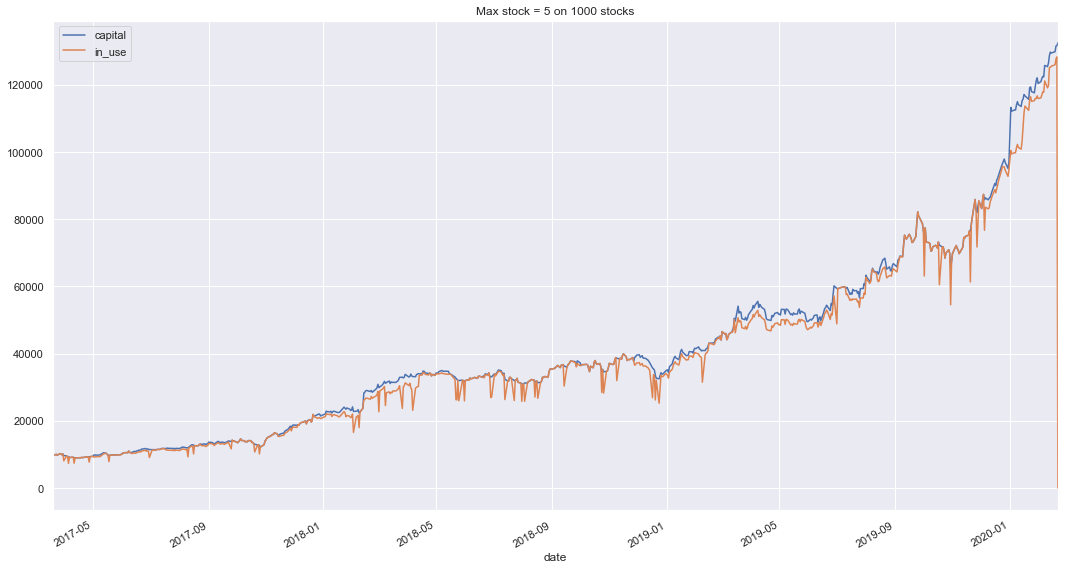

In [28]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 2000 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [6]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df

date ticker action   orig_amount  close_amount    no_shares  \
0  2017-03-20    JAN   SELL   2000.000000   2000.000000   400.000000   
0  2017-03-20   WRLD   SELL   2000.000000   2000.000000    38.395085   
0  2017-03-20    MOH   SELL   2000.000000   2000.000000    44.903458   
0  2017-03-20   CHNR   SELL   2000.000000   2000.000000  1005.025126   
0  2017-03-20   GLUU   SELL   2000.000000   2000.000000   938.967136   
..        ...    ...    ...           ...           ...          ...   
0  2020-02-21    TGT   SELL  23293.095213  24036.732259   205.424598   
0  2020-02-21   GEOS   SELL  24267.855534  25014.826034  1737.140697   
0  2020-02-21   IOVA   SELL  24497.111611  27719.292668  1066.947370   
0  2020-02-21    CLH   SELL  25824.546537  26147.390735   298.929813   
0  2020-02-21   SMMF   SELL  26279.074369  26217.386401  1028.132800   

    stop_loss    daily_gain  daily_return  invested          gain  gain_pct  
0       4.500  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0      46.881  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0      40.086  2.273737e-13  1.136868e-14         0  2.273737e-13      0.00  
0       1.791  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
0       1.917  0.000000e+00  0.000000e+00         0  0.000000e+00      0.00  
..        ...           ...           ...       ...           ...       ...  
0     102.051 -2.567807e+02 -1.056993e+00         0  7.436370e+02      3.19  
0      12.573  2.258283e+02  9.110021e-01         0  7.469705e+02      3.08  
0      20.664  1.173642e+03  4.421222e+00         0  3.222181e+03     13.15  
0      77.751 -2.690368e+02 -1.018445e+00         0  3.228442e+02      1.25  
0      23.004 -6.168797e+01 -2.347418e-01         0 -6.168797e+01     -0.23  

[612 rows x 12 columns]

In [7]:
sell_df.describe()

orig_amount  close_amount     no_shares    stop_loss    daily_gain  \
count    612.000000    612.000000    612.000000   612.000000    612.000000   
mean    7982.913268   8183.077002   1303.984610    42.389571     14.257265   
std     6404.394756   6641.957931   3663.758038    89.796127    746.083401   
min     1553.182637   1553.182637      2.454009     0.153000  -3741.626161   
25%     2633.794442   2696.801491    110.463602     5.064750    -25.079265   
50%     6294.371824   6228.663888    318.307614    14.787000      0.000000   
75%    10682.425024  10796.218861   1239.180527    47.243250     12.388548   
max    26279.074369  33210.244305  65795.683863  1588.500000  16605.122152   

       daily_return  invested          gain    gain_pct  
count    612.000000     612.0    612.000000  612.000000  
mean       0.073482       0.0    200.163734    2.526797  
std        6.260905       0.0   1193.619606   13.330449  
min      -25.526002       0.0  -2036.654987  -23.330000  
25%       -0.466242       0.0      0.000000    0.000000  
50%        0.000000       0.0      0.000000    0.000000  
75%        0.227868       0.0     88.222846    1.590000  
max      100.000000       0.0  15935.090908  122.460000

In [8]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

date ticker action   orig_amount  close_amount    no_shares  \
0 2018-12-20   AVGR   SELL   7122.976228   5460.948441  2374.325409   
0 2017-03-31   ELOX   SELL   1924.528302   1557.951482   458.221024   
0 2017-09-25   CTRC   SELL   2637.795679   2172.302324  1551.644517   
0 2017-10-20   TCCO   SELL   2745.213924   2287.678270   538.277240   
0 2018-07-13   GOGO   SELL   6837.099540   5707.000442  1412.623872   
0 2018-08-17   ELOX   SELL   5510.268285   4633.899086   387.773982   
0 2019-10-30   ENPH   SELL  12953.125715  10916.470729   581.901425   
0 2017-05-18    SES   SELL   2101.251941   1779.883997    38.625955   
0 2018-12-17   CTRC   SELL   7734.770619   6590.163308  1734.253502   
0 2017-04-11   IMGN   SELL   1868.775853   1602.600064   554.532894   

   stop_loss   daily_gain  daily_return  invested         gain  gain_pct  
0      2.700 -1187.162705    -17.857143         0 -1662.027786    -23.33  
0      3.780  -274.932615    -15.000000         0  -366.576819    -19.05  
0      1.530  -232.746678     -9.677419         0  -465.493355    -17.65  
0      4.590  -322.966344    -12.371134         0  -457.535654    -16.67  
0      4.356 -1101.846620    -16.182573         0 -1130.099097    -16.53  
0     12.789  -709.626387    -13.280116         0  -876.369199    -15.90  
0     20.034 -3741.626161    -25.526002         0 -2036.654987    -15.72  
0     48.960  -148.323666     -7.692308         0  -321.367944    -15.29  
0      4.014  -537.618586     -7.542579         0 -1144.607311    -14.80  
0      3.033  -105.361250     -6.168831         0  -266.175789    -14.24

In [9]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

date ticker action   orig_amount  close_amount    no_shares  \
0 2019-12-05   MRSN   SELL  12172.734202  27079.451487  6509.483530   
0 2017-12-26   ELOX   SELL   2597.481817   5468.382773   683.547847   
0 2018-03-09   ENPH   SELL   4485.835326   8948.547789  2312.286250   
0 2018-02-13     ZN   SELL   4401.795414   8762.833464  2037.868247   
0 2020-01-02    SES   SELL  17275.153397  33210.244305  2913.179325   
0 2019-03-15   KALV   SELL   8153.550081  13005.249302   449.231409   
0 2019-09-05   MEDP   SELL   7924.408305  12566.346542   151.895885   
0 2020-01-16   RCUS   SELL  13165.930708  20585.296742  1968.001601   
0 2019-08-13   SYRS   SELL   9934.218390  14766.626319  1683.765829   
0 2017-06-12   NVDA   SELL   1677.810791   2487.615401    16.724589   

   stop_loss    daily_gain  daily_return  invested          gain  gain_pct  
0      1.683   -130.189671     -0.478469         0  14906.717285    122.46  
0      3.420    341.773923      6.666667         0   2870.900956    110.53  
0      1.746    184.982900      2.110818         0   4462.712463     99.48  
0      1.944   4075.736495     86.956522         0   4361.038049     99.07  
0      5.337  16605.122152    100.000000         0  15935.090908     92.24  
0     16.335   -965.847530     -6.913183         0   4851.699222     59.50  
0     46.953    203.540486      1.646394         0   4641.938237     58.58  
0      6.021    196.800160      0.965251         0   7419.366034     56.35  
0      5.310    202.051899      1.387283         0   4832.407929     48.64  
0     90.288      6.188098      0.249377         0    809.804610     48.27

In [10]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(140, 0.22875816993464052)

In [11]:
myPnL_df

date ticker action   orig_amount  close_amount    no_shares  \
0  2017-03-20    SYX    BUY   2000.000000   2000.000000   368.324125   
0  2017-03-20    JAN    BUY   2000.000000   2000.000000   400.000000   
0  2017-03-20    TGI    BUY   2000.000000   2000.000000    80.064051   
0  2017-03-20   OFLX    BUY   2000.000000   2000.000000    46.937339   
0  2017-03-20   WRLD    BUY   2000.000000   2000.000000    38.395085   
..        ...    ...    ...           ...           ...          ...   
0  2020-02-21    TGT   SELL  23293.095213  24036.732259   205.424598   
0  2020-02-21   GEOS   SELL  24267.855534  25014.826034  1737.140697   
0  2020-02-21   IOVA   SELL  24497.111611  27719.292668  1066.947370   
0  2020-02-21    CLH   SELL  25824.546537  26147.390735   298.929813   
0  2020-02-21   SMMF   SELL  26279.074369  26217.386401  1028.132800   

    stop_loss   daily_gain  daily_return  invested  
0       4.887     0.000000      0.000000         0  
0       4.500     0.000000      0.000000         0  
0      22.482     0.000000      0.000000         0  
0      38.349     0.000000      0.000000         0  
0      46.881     0.000000      0.000000         0  
..        ...          ...           ...       ...  
0     102.051  -256.780748     -1.056993         0  
0      12.573   225.828291      0.911002         0  
0      20.664  1173.642107      4.421222         0  
0      77.751  -269.036832     -1.018445         0  
0      23.004   -61.687968     -0.234742         0  

[4861 rows x 10 columns]

In [12]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['JAN', 'WRLD', 'MOH', 'CHNR', 'GLUU', 'MLAB', 'PTSI', 'CASH',
        'OFLX', 'SYX', 'NBIX', 'GEOS', 'DXCM', 'TGI', 'SGMO', 'ELOX',
        'CTRC', 'CBZ', 'CRL', 'EBS', 'TCCO', 'BASI', 'SCL', 'PODD', 'DPZ',
        'BHC', 'STRL', 'ISNS', 'CYH', 'IMGN', 'DAIO', 'SGC', 'CSGS',
        'CCMP', 'TRNS', 'AIRT', 'SES', 'OPNT', 'SRT', 'ZN', 'SJW', 'TGA',
        'CRK', 'SLAB', 'PAAS', 'PZG', 'DOV', 'IOVA', 'NSSC', 'SPPI', 'ODC',
        'VRTX', 'GSIT', 'MU', 'CPHI', 'ATRS', 'ARA', 'AMD', 'EXAS', 'LMNR',
        'TIPT', 'LULU', 'RMD', 'VECO', 'IRDM', 'AVID', 'PGC', 'PWOD',
        'AEL', 'VZ', 'GPS', 'NVDA', 'LZB', 'INS', 'BKH', 'ARL', 'WTT',
        'TSRI', 'MED', 'MELI', 'AEZS', 'PAYS', 'TRST', 'LHCG', 'HCCI',
        'NOA', 'AMWD', 'IMAX', 'CECE', 'UNT', 'RGS', 'HOFT', 'ATSG', 'THR',
        'AGX', 'COST', 'FORM', 'TACT', 'IIN', 'HSII', 'ATLC', 'GWW',
        'EDUC', 'IPHI', 'KIRK', 'CTHR', 'AMPE', 'ZIXI', 'ABIO', 'BHR',
        'SCCO', 'AAPL', 'BFS', 'FMBI', 'MNTX', 'ATRI', 'ETR', 

In [13]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker          gain
289    SES  15277.799136
214   MRSN  14906.717285
269   RCUS   7419.366034
244   OVID   5817.330223
279   RUBI   4941.978972
312   SYRS   4832.407929
203   MEDP   4641.938237
111   ELOX   4542.036300
112   ENPH   4285.329287
115   ESNT   4107.285349

In [14]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
315   TCCO -2874.636906
287   SELB -2184.025508
40    AVGR -2176.547164
91    CTRC -1873.498245
270   REKR -1795.225218
304   STRM -1381.978549
27    ARDX -1356.592298
9     AGRX -1304.137586
267   RACE  -860.851543
148    HCA  -826.873302

In [15]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

ticker          gain
214   MRSN  14906.717285
269   RCUS   7419.366034
244   OVID   5817.330223
312   SYRS   4832.407929
203   MEDP   4641.938237
234   NXRT   3414.384257
133   FRTA   3299.810908
289    SES   3055.559827
279   RUBI   2470.989486
186    KOD   2286.975135

In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

ticker         gain
270   REKR -1795.225218
287   SELB -1092.012754
40    AVGR -1088.273582
267   RACE  -860.851543
148    HCA  -826.873302
331   TRVN  -785.361895
304   STRM  -690.989275
27    ARDX  -678.296149
9     AGRX  -652.068793
323   TLRA  -642.890238

# Suspicious Stocks

Below are the plotted close price plots as returned by yfinance. 

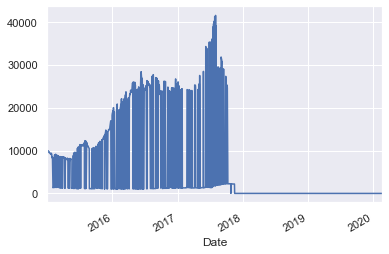

In [17]:
# Google shows close price between $8 - $16, so something seems to be wrong here
asset  = yf.Ticker('SBT')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

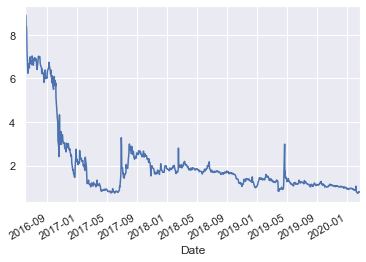

In [18]:
# Data looks okay - there's just a quick change around 2019-04-22 and then a big drop on 2019-04-23.
# Trade is still profitable. Modified the stop_loss logic to match what stockbrokers do...
asset  = yf.Ticker('MBRX')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

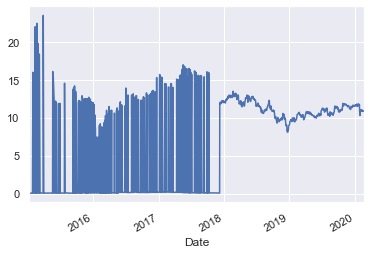

In [19]:
# LBC stock looks suspicious => exclude and rerun...
asset  = yf.Ticker('LBC')
hist   = asset.history(start='2015-01-01', auto_adjust=False, back_adjust=False)
hist.Close.plot()

In [20]:
myCapital_df.tail()

date capital       in_use     free
date                                               
2020-02-14 2020-02-14  129499       125568   3931.4
2020-02-18 2020-02-18  129873       125998  3875.69
2020-02-19 2020-02-19  131580       127705  3875.69
2020-02-20 2020-02-20  131688       128324  3364.58
2020-02-21 2020-02-21  132500  1.12777e-10   132500

In [21]:
len(possible_trades_df)

21671